<a href="https://colab.research.google.com/github/XiaochuanLi2018/HMEQ/blob/main/COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **World daily COVID-19 data**

#### 54 Variables:

* iso_code (categorical): three-letter country codes
* continent (categorical): Continent of the geographical location
* location (categorical): Geographical location
* date: Date of observation
* total_cases: Total confirmed cases of COVID-19
* new_cases: New confirmed cases of COVID-19
* new_cases_smoothed: New confirmed cases of COVID-19 (7-day smoothed) (seems like the average of the total new cases in the past 7 days)
* total_deaths: Total deaths attributed to COVID-19
* new_deaths: New deaths attributed to COVID-19
* new_deaths_smoothed: New deaths attributed to COVID-19 (7-day smoothed)
* total_cases_per_million: Total confirmed cases of COVID-19 per 1,000,000 people
* new_cases_per_million: New confirmed cases of COVID-19 per 1,000,000 people
* new_cases_smoothed_per_million: New confirmed cases of COVID-19 (7-day smoothed) per 1,000,000 people
* total_deaths_per_million: Total deaths attributed to COVID-19 per 1,000,000 people
* new_deaths_per_million: New deaths attributed to COVID-19 per 1,000,000 people
* new_deaths_smoothed_per_million: New deaths attributed to COVID-19 (7-day smoothed) per 1,000,000 people
* reproduction_rate: Real-time estimate of the effective reproduction rate (R) of COVID-19
* icu_patients: Number of COVID-19 patients in intensive care units (ICUs) on a given day
* icu_patients_per_million: Number of COVID-19 patients in intensive care units (ICUs) on a given day per 1,000,000 people
* hosp_patients: Number of COVID-19 patients in hospital on a given day
* hosp_patients_per_million: Number of COVID-19 patients in hospital on a given day per 1,000,000 people
* weekly_icu_admissions: Number of COVID-19 patients newly admitted to intensive care units (ICUs) in a given week
* weekly_icu_admissions_per_million: Number of COVID-19 patients newly admitted to intensive care units (ICUs) in a given week per 1,000,000 people
* weekly_hosp_admissions: Number of COVID-19 patients newly admitted to hospitals in a given week
* weekly_hosp_admissions_per_million: Number of COVID-19 patients newly admitted to hospitals in a given week per 1,000,000 people
* total_tests: Total tests for COVID-19
* new_tests: New tests for COVID-19
* new_tests_smoothed: New tests for COVID-19 (7-day smoothed). For countries that don't report testing data on a daily basis, we assume that testing changed equally on a daily basis over any periods in which no data was reported. This produces a complete series of daily figures, which is then averaged over a rolling 7-day window
* total_tests_per_thousand: Total tests for COVID-19 per 1,000 people
* new_tests_per_thousand: New tests for COVID-19 per 1,000 people
* new_tests_smoothed_per_thousand: New tests for COVID-19 (7-day smoothed) per 1,000 people
* tests_per_case: Tests conducted per new confirmed case of COVID-19, given as a rolling 7-day average (this is the inverse of positive_rate)
* positive_rate: The share of COVID-19 tests that are positive, given as a rolling 7-day average (this is the inverse of tests_per_case)
* tests_units (categorical): 	Units used by the location to report its testing data
* total_vaccinations: Number of COVID-19 vaccination doses administered
* total_vaccinations_per_hundred: Number of COVID-19 vaccination doses administered per 100 people in the total population
* new_vaccinations: New COVID-19 vaccination doses administered (7-day smoothed). For countries that don't report vaccination data on a daily basis, we assume that vaccination changed equally on a daily basis over any periods in which no data was reported. This produces a complete series of daily figures, which is then averaged over a rolling 7-day window
* new_vaccinations_per_million: New COVID-19 vaccination doses administered (7-day smoothed) per 1,000,000 people in the total population
* stringency_index: Government Response Stringency Index: composite measure based on 9 response indicators including school closures, workplace closures, and travel bans, rescaled to a value from 0 to 100 (100 = strictest response)
* population: Population in 2020
* population_density: Number of people divided by land area, measured in square kilometers, most recent year available
* median_age: Median age of the population, UN projection for 2020
* aged_65_older: Share of the population that is 65 years and older, most recent year available
* aged_70_older: Share of the population that is 70 years and older in 2015
* gdp_per_capita: Gross domestic product at purchasing power parity (constant 2011 international dollars), most recent year available
* extreme_poverty: Share of the population living in extreme poverty, most recent year available since 2010
* cardiovasc_death_rate: Death rate from cardiovascular disease in 2017 (annual number of deaths per 100,000 people)
* diabetes_prevalence: Diabetes prevalence (% of population aged 20 to 79) in 2017
* female_smokers: Share of women who smoke, most recent year available
* male_smokers: Share of men who smoke, most recent year available
* handwashing_facilities: Share of the population with basic handwashing facilities on premises, most recent year available
* hospital_beds_per_thousand: 	Hospital beds per 1,000 people, most recent year available since 2010
* life_expectancy: Life expectancy at birth in 2019
* human_development_index: Summary measure of average achievement in key dimensions of human development: a long and healthy life, being knowledgeable and have a decent standard of living


# **U.S. daily COVID-19 data**

#### 6 Variables:

* Date
* County
* State
* Fips
* Cases
* Deaths


# **Load Packages**

In [102]:
import warnings
warnings.filterwarnings('ignore')

In [103]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from sklearn.metrics import mean_absolute_error
#from sklearn.metrics import mean_absolute_percentage_error

%matplotlib inline

import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
from plotly.subplots import make_subplots

RANDOM_STATE = 12345

# **World daily COVID-19 data**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Project/COVID19/world.csv')

In [ ]:
print("World daily COVID-19 data - rows:", df.shape[0]," columns:", df.shape[1])

World daily COVID-19 data - rows: 58547  columns: 54


In [ ]:
df.head()

iso_code continent  ... life_expectancy human_development_index
0      AFG      Asia  ...           64.83                   0.498
1      AFG      Asia  ...           64.83                   0.498
2      AFG      Asia  ...           64.83                   0.498
3      AFG      Asia  ...           64.83                   0.498
4      AFG      Asia  ...           64.83                   0.498

[5 rows x 54 columns]

In [ ]:
df.describe()

total_cases      new_cases  ...  life_expectancy  human_development_index
count  5.800800e+04   58001.000000  ...     57913.000000             55972.000000
mean   2.808668e+05    2977.974863  ...        73.146989                 0.715907
std    2.748660e+06   26446.707577  ...         7.548623                 0.153753
min    1.000000e+00  -46076.000000  ...        53.280000                 0.354000
25%    4.690000e+02       1.000000  ...        67.440000                 0.591000
50%    4.843500e+03      39.000000  ...        74.620000                 0.750000
75%    4.721450e+04     453.000000  ...        78.570000                 0.843000
max    8.718654e+07  777203.000000  ...        86.750000                 0.953000

[8 rows x 49 columns]

In [ ]:
df["iso_code"].value_counts()

MEX         372
THA         369
TWN         357
USA         352
OWID_WRL    352
           ... 
SLB          87
MHL          71
HKG          71
VUT          58
WSM          50
Name: iso_code, Length: 191, dtype: int64

In [ ]:
df["continent"].value_counts()

Africa           16032
Asia             14767
Europe           14724
North America     7056
South America     3718
Oceania           1563
Name: continent, dtype: int64

In [ ]:
df["location"].value_counts()

Mexico              372
Thailand            369
Taiwan              357
United States       352
South Korea         352
                   ... 
Solomon Islands      87
Hong Kong            71
Marshall Islands     71
Vanuatu              58
Samoa                50
Name: location, Length: 192, dtype: int64

In [ ]:
df["tests_units"].value_counts()

tests performed    19045
people tested       6729
samples tested      5179
units unclear        651
Name: tests_units, dtype: int64

In [ ]:
df = df[df['location'] != 'World']
df = df[df['date'] != '2021-01-07']

## **Check missing data**

In [ ]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

total_vaccinations  total_vaccinations_per_hundred  ...  date  location
Total          57946.000000                    57946.000000  ...   0.0       0.0
Percent           99.599512                       99.599512  ...   0.0       0.0

[2 rows x 54 columns]

In [ ]:
df['total_deaths'] = df['total_deaths'].fillna(0) 
df['new_deaths'] = df['new_deaths'].fillna(0)
df['total_deaths_per_million'] = df['total_deaths_per_million'].fillna(0)
df['new_deaths_per_million'] = df['new_deaths_per_million'].fillna(0)

In [ ]:
df.head()

iso_code continent  ... life_expectancy human_development_index
0      AFG      Asia  ...           64.83                   0.498
1      AFG      Asia  ...           64.83                   0.498
2      AFG      Asia  ...           64.83                   0.498
3      AFG      Asia  ...           64.83                   0.498
4      AFG      Asia  ...           64.83                   0.498

[5 rows x 54 columns]

## **EDA**

In [ ]:
df_latest = df[df['date']=='2021-01-06']

In [ ]:
df_latest

iso_code      continent  ... life_expectancy human_development_index
317        AFG           Asia  ...           64.83                   0.498
621        ALB         Europe  ...           78.57                   0.785
938        DZA         Africa  ...           76.88                   0.754
1249       AND         Europe  ...           83.73                   0.858
1542       AGO         Africa  ...           61.15                   0.581
...        ...            ...  ...             ...                     ...
56984      VEN  South America  ...           72.06                   0.761
57334      VNM           Asia  ...           75.40                   0.694
57958      YEM           Asia  ...           66.12                   0.452
58253      ZMB         Africa  ...           63.89                   0.588
58546      ZWE         Africa  ...           61.49                   0.535

[190 rows x 54 columns]

In [ ]:
totalcase = pd.DataFrame(df_latest.groupby('continent')['total_cases'].sum())
totalcase['continent'] = totalcase.index
totalcase.index = np.arange(1,7)
totalcase

total_cases      continent
1    2914291.0         Africa
2   21173939.0           Asia
3   25091486.0         Europe
4   24410139.0  North America
5      31610.0        Oceania
6   13564354.0  South America

In [ ]:
totalcase = pd.DataFrame(df_latest.groupby('continent')['total_cases'].sum())
totalcase['continent'] = totalcase.index
totalcase.index = np.arange(1,7)

deathcase = pd.DataFrame(df_latest.groupby('continent')['total_deaths'].sum())
deathcase['continent'] = deathcase.index
deathcase.index = np.arange(1,7)

global_totalcase = totalcase[['continent','total_cases']]
global_deathcase = deathcase[['continent','total_deaths']]

fig = px.bar(global_totalcase.sort_values('total_cases',ascending=False)[:20][::-1],x='total_cases',y='continent',title='Total Cases Worldwide by 2021-01-06',text='total_cases', height=500, orientation='h')
fig.show()

fig = px.bar(global_deathcase.sort_values('total_deaths',ascending=False)[:20][::-1],x='total_deaths',y='continent',title='Total Death Cases Worldwide by 2021-01-06',text='total_deaths', height=500, orientation='h')
fig.show()

In [ ]:
totalcase = pd.DataFrame(df_latest.groupby('location')['total_cases'].sum())
totalcase['location'] = totalcase.index
totalcase.index = np.arange(1,191)

deathcase = pd.DataFrame(df_latest.groupby('location')['total_deaths'].sum())
deathcase['location'] = deathcase.index
deathcase.index = np.arange(1,191)

global_totalcase = totalcase[['location','total_cases']]
global_deathcase = deathcase[['location','total_deaths']]

fig = px.bar(global_totalcase.sort_values('total_cases',ascending=False)[:20][::-1],x='total_cases',y='location',title='Top 20 Locations with Highest Total Cases by 2021-01-06',text='total_cases', height=900, orientation='h')
fig.show()

fig = px.bar(global_deathcase.sort_values('total_deaths',ascending=False)[:20][::-1],x='total_deaths',y='location',title='Top 20 Locations with Highest Total Death Cases by 2021-01-06',text='total_deaths', height=900, orientation='h')
fig.show()

In [ ]:
date_df = df.groupby('date')['new_cases', 'new_deaths'].sum().reset_index()

fig = make_subplots(rows=1, cols=2, subplot_titles=('New Cases', 'New Death'))

trace1 = go.Scatter(
          x=date_df['date'],
          y=date_df['new_cases'],
          name='new_cases',
          line_color='orange',
          mode='lines+markers',
          opacity=0.8)

trace2 = go.Scatter(
          x=date_df['date'],
          y=date_df['new_deaths'],
          name='new_deaths',
          line_color='blue',
          mode='lines+markers',
          opacity=0.8)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.update_layout(template="plotly_dark",title_text = '<b>Global Spread of the Coronavirus Over Time </b>',
                  font=dict(family="Arial, Balto, Courier New, Droid Sans",color='white'))
fig.show()

In [ ]:
grouped_us = df[df['location'] == "United States"].reset_index()
grouped_us_date = grouped_us.groupby('date')['date', 'new_cases', 'new_deaths'].sum().reset_index()

grouped_india = df[df['location'] == "India"].reset_index()
grouped_india_date = grouped_india.groupby('date')['date', 'new_cases', 'new_deaths'].sum().reset_index()

grouped_brazil = df[df['location'] == "Brazil"].reset_index()
grouped_brazil_date = grouped_brazil.groupby('date')['date', 'new_cases', 'new_deaths'].sum().reset_index()

In [ ]:
fig = make_subplots(rows=1, cols=2, subplot_titles=('New Cases', 'New Death'))

trace1 = go.Scatter(x=grouped_us_date['date'],y=grouped_us_date['new_cases'],name="new_cases",line_color='orange',mode='lines+markers',opacity=0.8)
trace2 = go.Scatter(x=grouped_us_date['date'],y=grouped_us_date['new_deaths'],name="new_deaths",line_color='blue',mode='lines+markers',opacity=0.8)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)

fig.update_layout(template="plotly_dark",title_text = '<b>Spread of the Coronavirus Over Time in United States </b>',
                  font=dict(family="Arial, Balto, Courier New, Droid Sans",color='white'))
fig.show()

In [ ]:
fig = make_subplots(rows=1, cols=2, subplot_titles=('New Cases', 'New Death'))

trace1 = go.Scatter(x=grouped_india_date['date'],y=grouped_india_date['new_cases'],name="new_cases",line_color='orange',mode='lines+markers',opacity=0.8)
trace2 = go.Scatter(x=grouped_india_date['date'],y=grouped_india_date['new_deaths'],name="new_deaths",line_color='blue',mode='lines+markers',opacity=0.8)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)

fig.update_layout(template="plotly_dark",title_text = '<b>Spread of the Coronavirus Over Time in India </b>',
                  font=dict(family="Arial, Balto, Courier New, Droid Sans",color='white'))
fig.show()

In [ ]:
fig = make_subplots(rows=1, cols=2, subplot_titles=('New Cases', 'New Death'))

trace1 = go.Scatter(x=grouped_brazil_date['date'],y=grouped_brazil_date['new_cases'],name="new_cases",line_color='orange',mode='lines+markers',opacity=0.8)
trace2 = go.Scatter(x=grouped_brazil_date['date'],y=grouped_brazil_date['new_deaths'],name="new_deaths",line_color='blue',mode='lines+markers',opacity=0.8)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)

fig.update_layout(template="plotly_dark",title_text = '<b>Spread of the Coronavirus Over Time in Brazil </b>',
                  font=dict(family="Arial, Balto, Courier New, Droid Sans",color='white'))
fig.show()

In [ ]:
flg = df_latest.groupby('location')['total_cases','total_deaths'].sum().reset_index()

flg['mortalityRate'] = round((flg['total_deaths']/flg['total_cases'])*100, 2)
temp = flg[flg['total_cases']>100]
temp = temp.sort_values('mortalityRate', ascending=False)

fig = px.bar(temp.sort_values(by="mortalityRate", ascending=False)[:10][::-1],
             x = 'mortalityRate', y = 'location', 
             title='Deaths per 100 Confirmed Cases', text='mortalityRate', height=800, orientation='h',
             color_discrete_sequence=['darkred'])
fig.show()

In [ ]:
grouped_yemen = df[df['location'] == "Yemen"].reset_index()
grouped_yemen_date = grouped_yemen.groupby('date')['date', 'total_cases', 'total_deaths'].sum().reset_index()

fig = make_subplots(rows=1, cols=2, subplot_titles=('Total Cases', 'Total Death'))

trace1 = go.Scatter(x=grouped_yemen_date['date'],y=grouped_yemen_date['total_cases'],name="total_cases",line_color='orange',mode='lines+markers',opacity=0.8)
trace2 = go.Scatter(x=grouped_yemen_date['date'],y=grouped_yemen_date['total_deaths'],name="total_deaths",line_color='blue',mode='lines+markers',opacity=0.8)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)

fig.update_layout(template="plotly_dark",title_text = '<b>Spread of the Coronavirus Over Time in Yemen </b>',
                  font=dict(family="Arial, Balto, Courier New, Droid Sans",color='white'))
fig.show()

In [ ]:
stringency = pd.DataFrame(df.groupby('location')['stringency_index'].mean())
stringency['location'] = stringency.index
stringency.index = np.arange(1,192)

global_stringency = stringency[['location','stringency_index']]

fig = px.bar(global_stringency.sort_values('stringency_index',ascending=True)[:5][::-1],x='stringency_index',y='location',title='Rank of Stringency Index',text='stringency_index', height=450, orientation='h')
fig.show()

fig = px.bar(global_stringency.sort_values('stringency_index',ascending=False)[:5][::-1],x='stringency_index',y='location',title='Rank of Stringency Index',text='stringency_index', height=450, orientation='h')
fig.show()

In [ ]:
grouped_burundi = df[df['location'] == "Burundi"].reset_index()
grouped_burundi_date = grouped_burundi.groupby('date')['date', 'total_cases', 'total_deaths'].sum().reset_index()

fig = make_subplots(rows=1, cols=2, subplot_titles=('Total Cases', 'Total Death'))

trace1 = go.Scatter(x=grouped_burundi_date['date'],y=grouped_burundi_date['total_cases'],name="total_cases",line_color='orange',mode='lines+markers',opacity=0.8)
trace2 = go.Scatter(x=grouped_burundi_date['date'],y=grouped_burundi_date['total_deaths'],name="total_deaths",line_color='blue',mode='lines+markers',opacity=0.8)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)

fig.update_layout(template="plotly_dark",title_text = '<b>Spread of the Coronavirus Over Time in Burundi </b>',
                  font=dict(family="Arial, Balto, Courier New, Droid Sans",color='white'))
fig.show()

In [ ]:
grouped_honduras = df[df['location'] == "Honduras"].reset_index()
grouped_honduras_date = grouped_honduras.groupby('date')['date', 'total_cases', 'total_deaths'].sum().reset_index()

fig = make_subplots(rows=1, cols=2, subplot_titles=('Total Cases', 'Total Death'))

trace1 = go.Scatter(x=grouped_honduras_date['date'],y=grouped_honduras_date['total_cases'],name="total_cases",line_color='orange',mode='lines+markers',opacity=0.8)
trace2 = go.Scatter(x=grouped_honduras_date['date'],y=grouped_honduras_date['total_deaths'],name="total_deaths",line_color='blue',mode='lines+markers',opacity=0.8)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)

fig.update_layout(template="plotly_dark",title_text = '<b>Spread of the Coronavirus Over Time in Honduras </b>',
                  font=dict(family="Arial, Balto, Courier New, Droid Sans",color='white'))
fig.show()

# **U.S. daily COVID-19 data**

In [197]:
df_US = pd.read_csv('/content/drive/MyDrive/Project/COVID19/US.csv')

In [198]:
print("U.S. daily COVID-19 data - rows:", df_US.shape[0]," columns:", df_US.shape[1])

U.S. daily COVID-19 data - rows: 904291  columns: 7


In [199]:
df_US.head()

Unnamed: 0        date     county       state     fips  cases  deaths
0           1  2020-01-21  Snohomish  Washington  53061.0      1     0.0
1           2  2020-01-22  Snohomish  Washington  53061.0      1     0.0
2           3  2020-01-23  Snohomish  Washington  53061.0      1     0.0
3           4  2020-01-24       Cook    Illinois  17031.0      1     0.0
4           5  2020-01-24  Snohomish  Washington  53061.0      1     0.0

In [200]:
df_US = df_US.drop(columns=['Unnamed: 0'])

## **State Level Analysis**

### **Check Missing Values**

In [201]:
total = df_US.isnull().sum().sort_values(ascending = False)
percent = (df_US.isnull().sum()/df_US.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

deaths         fips  cases  state  county  date
Total    19229.000000  8473.000000    0.0    0.0     0.0   0.0
Percent      2.126417     0.936977    0.0    0.0     0.0   0.0

In [202]:
df_US[df_US['deaths'].isnull()]

date        county        state     fips  cases  deaths
117486  2020-05-05      Adjuntas  Puerto Rico  72001.0      3     NaN
117487  2020-05-05        Aguada  Puerto Rico  72003.0      7     NaN
117488  2020-05-05     Aguadilla  Puerto Rico  72005.0     11     NaN
117489  2020-05-05  Aguas Buenas  Puerto Rico  72007.0     22     NaN
117490  2020-05-05      Aibonito  Puerto Rico  72009.0     13     NaN
...            ...           ...          ...      ...    ...     ...
903448  2021-01-06     Vega Baja  Puerto Rico  72145.0   2282     NaN
903449  2021-01-06       Vieques  Puerto Rico  72147.0    182     NaN
903450  2021-01-06      Villalba  Puerto Rico  72149.0    599     NaN
903451  2021-01-06       Yabucoa  Puerto Rico  72151.0    790     NaN
903452  2021-01-06         Yauco  Puerto Rico  72153.0    897     NaN

[19229 rows x 6 columns]

In [203]:
max(df_US['date'])

'2021-01-06'

### **Re-construct DataFrame**

In [204]:
df_state = pd.DataFrame(df_US.groupby(['date','state'], as_index=False)['cases', 'deaths'].sum())

In [205]:
df_state['state'].value_counts()

Washington                  352
Illinois                    349
California                  348
Arizona                     347
Massachusetts               341
Wisconsin                   337
Texas                       330
Nebraska                    325
Utah                        317
Oregon                      314
Florida                     312
Rhode Island                312
New York                    312
New Hampshire               311
Georgia                     311
North Carolina              310
New Jersey                  309
Colorado                    308
Tennessee                   308
Nevada                      308
Maryland                    308
Hawaii                      307
Minnesota                   307
Oklahoma                    307
Kentucky                    307
Indiana                     307
Pennsylvania                307
South Carolina              307
Vermont                     306
Kansas                      306
District of Columbia        306
Virginia

In [206]:
state_list = list(df_state['state'].value_counts().index)

In [207]:
df_state[df_state['state']=='Washington']

date       state   cases  deaths
0      2020-01-21  Washington       1     0.0
1      2020-01-22  Washington       1     0.0
2      2020-01-23  Washington       1     0.0
4      2020-01-24  Washington       1     0.0
7      2020-01-25  Washington       1     0.0
...           ...         ...     ...     ...
16840  2021-01-02  Washington  253290  3524.0
16895  2021-01-03  Washington  258557  3524.0
16950  2021-01-04  Washington  261328  3558.0
17005  2021-01-05  Washington  263713  3611.0
17060  2021-01-06  Washington  265790  3681.0

[352 rows x 4 columns]

In [208]:
df_state[df_state['state']=='Georgia']

date    state   cases   deaths
256    2020-03-02  Georgia       2      0.0
271    2020-03-03  Georgia       2      0.0
287    2020-03-04  Georgia       2      0.0
305    2020-03-05  Georgia       2      0.0
326    2020-03-06  Georgia       3      0.0
...           ...      ...     ...      ...
16799  2021-01-02  Georgia  662077  10612.0
16854  2021-01-03  Georgia  667705  10616.0
16909  2021-01-04  Georgia  672849  10623.0
16964  2021-01-05  Georgia  682749  10725.0
17019  2021-01-06  Georgia  690137  10814.0

[311 rows x 4 columns]

#### **DataFrame for Cases**

In [209]:
df_Washington = df_state[df_state['state']=='Washington']
df_Washington.index = df_Washington['date']
df_state_cases = df_Washington.drop(columns=['state','deaths'])
df_state_cases = df_state_cases.rename(columns={"cases": 'Washington'})

In [210]:
for i in range(1,len(state_list)):
  df_state_list = df_state[df_state['state']==state_list[i]]
  df_state_list.index = df_state_list['date']
  df_state_cases[state_list[i]] = df_state_list['cases']
df_state_cases = df_state_cases.fillna(0)
df_state_cases = df_state_cases.drop(columns=['date'])

In [211]:
df_state_cases

Washington   Illinois  ...  West Virginia  Northern Mariana Islands
date                               ...                                         
2020-01-21           1        0.0  ...            0.0                       0.0
2020-01-22           1        0.0  ...            0.0                       0.0
2020-01-23           1        0.0  ...            0.0                       0.0
2020-01-24           1        1.0  ...            0.0                       0.0
2020-01-25           1        1.0  ...            0.0                       0.0
...                ...        ...  ...            ...                       ...
2021-01-02      253290   977677.0  ...        89327.0                     122.0
2021-01-03      258557   982105.0  ...        91058.0                     122.0
2021-01-04      261328   987459.0  ...        91886.0                     122.0
2021-01-05      263713   994511.0  ...        93162.0                     122.0
2021-01-06      265790  1001955.0  ...        94678.0                     124.0

[352 rows x 55 columns]

#### **DataFrame for Deaths**

In [18]:
df_state_deaths = df_Washington.drop(columns=['state','cases'])
df_state_deaths = df_state_deaths.rename(columns={"deaths": 'Washington'})

In [19]:
for i in range(1,len(state_list)):
  df_state_list = df_state[df_state['state']==state_list[i]]
  df_state_list.index = df_state_list['date']
  df_state_deaths[state_list[i]] = df_state_list['deaths']
df_state_deaths2 = df_state_deaths.fillna(0)
df_state_deaths2 = df_state_deaths2.drop(columns=['date'])

In [20]:
df_state_deaths2

Washington  Illinois  ...  West Virginia  Northern Mariana Islands
date                              ...                                         
2020-01-21         0.0       0.0  ...            0.0                       0.0
2020-01-22         0.0       0.0  ...            0.0                       0.0
2020-01-23         0.0       0.0  ...            0.0                       0.0
2020-01-24         0.0       0.0  ...            0.0                       0.0
2020-01-25         0.0       0.0  ...            0.0                       0.0
...                ...       ...  ...            ...                       ...
2021-01-02      3524.0   18217.0  ...         1373.0                       2.0
2021-01-03      3524.0   18322.0  ...         1376.0                       2.0
2021-01-04      3558.0   18414.0  ...         1396.0                       2.0
2021-01-05      3611.0   18569.0  ...         1442.0                       2.0
2021-01-06      3681.0   18738.0  ...         1481.0                       2.0

[352 rows x 55 columns]

### **Vector Autoregressive (VAR)**

In [21]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

#### **For Cases**

##### **Visualize the Time Series**

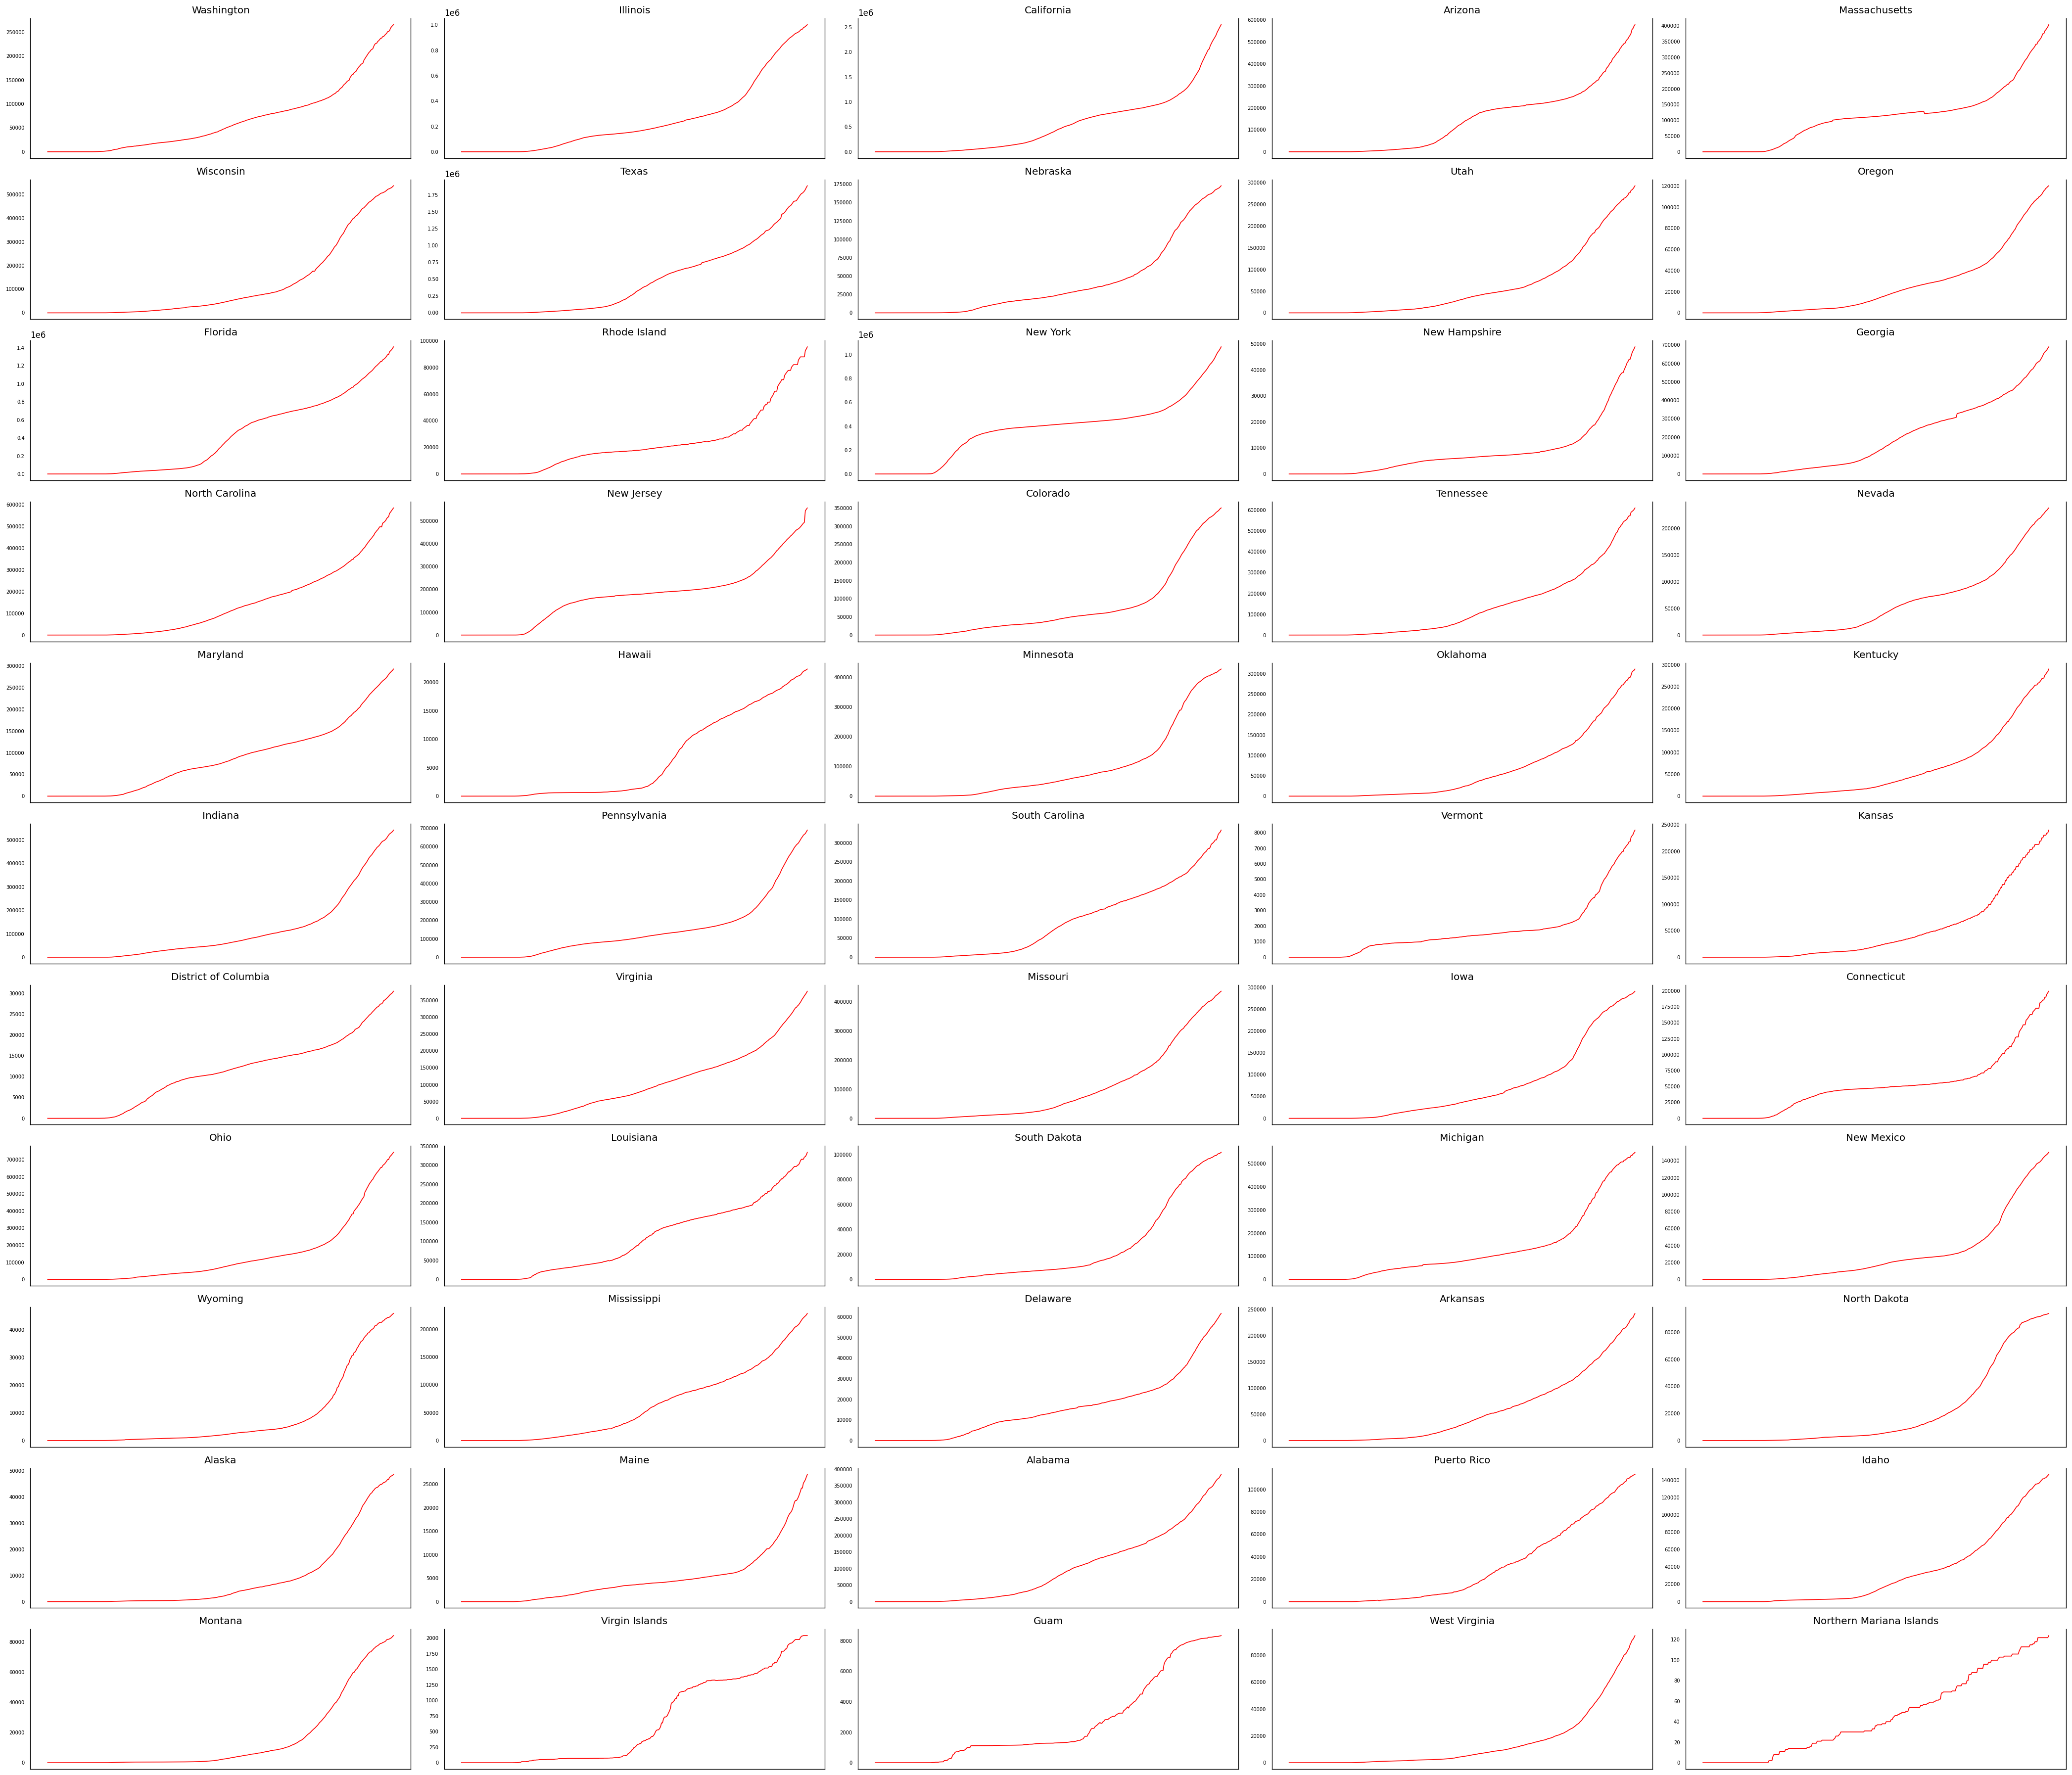

In [22]:
fig, axes = plt.subplots(nrows=11, ncols=5, dpi=120, figsize=(35,30))
for i, ax in enumerate(axes.flatten()):
    data = df_state_cases[df_state_cases.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    ax.set_title(df_state_cases.columns[i])
    date_form = DateFormatter('%Y-%m')
    ax.xaxis.set_major_formatter(date_form)
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

##### **Testing Causation using Granger's Causality Test**

* Null hypothesis: the coefficients of past values in the regression equation is zero.

Meaning that, the past values of time series (X) do not cause the other series (Y).

In [23]:
from statsmodels.tsa.stattools import grangercausalitytests

In [24]:
maxlag = 12
test = 'ssr_chi2test'
def grangers_causation_matrix(data,variables, test='ssr_chi2test', verbose=False):
  """
  Check Granger Causality of all possible combinations of the Time series.

  The rows are the response variable, columns are predictors. The values in the table are the p-values.
  Significant p-values imply the Null Hypothesis that the coefficients of the corresponding past values is zero,
  that is, the X does not cause Y can be rejected.

  data   : pandas DataFrame containing the time series variables 
  variable : list containing names of the time series variables.
  """

  df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
  for c in df.columns:
    for r in df.index:
        test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
        p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
        if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
        min_p_value = np.min(p_values)
        df.loc[r, c] = min_p_value
  df.columns = [var + '_x' for var in variables]
  df.index = [var + '_y' for var in variables]
  return df

In [25]:
grangers_causation_matrix(df_state_cases, variables = df_state_cases.columns) 

Washington_x  ...  Northern Mariana Islands_x
Washington_y                      1.0000  ...                      0.0301
Illinois_y                        0.0000  ...                      0.0000
California_y                      0.0000  ...                      0.0000
Arizona_y                         0.0000  ...                      0.0051
Massachusetts_y                   0.0000  ...                      0.0959
Wisconsin_y                       0.0000  ...                      0.0000
Texas_y                           0.0000  ...                      0.0021
Nebraska_y                        0.0001  ...                      0.0000
Utah_y                            0.0000  ...                      0.0000
Oregon_y                          0.0000  ...                      0.0050
Florida_y                         0.0000  ...                      0.0003
Rhode Island_y                    0.0000  ...                      0.0614
New York_y                        0.0000  ...                      0.0346
New Hampshire_y                   0.0000  ...                      0.0422
Georgia_y                         0.0000  ...                      0.0436
North Carolina_y                  0.0000  ...                      0.0040
New Jersey_y                      0.0000  ...                      0.0020
Colorado_y                        0.0000  ...                      0.0000
Tennessee_y                       0.0000  ...                      0.0092
Nevada_y                          0.0000  ...                      0.0086
Maryland_y                        0.0000  ...                      0.0460
Hawaii_y                          0.0008  ...                      0.0000
Minnesota_y                       0.0000  ...                      0.0000
Oklahoma_y                        0.0000  ...                      0.0049
Kentucky_y                        0.0000  ...                      0.0000
Indiana_y                         0.0000  ...                      0.0000
Pennsylvania_y                    0.0000  ...                      0.0000
South Carolina_y                  0.0000  ...                      0.0020
Vermont_y                         0.0000  ...                      0.0399
Kansas_y                          0.0000  ...                      0.0001
District of Columbia_y            0.0000  ...                      0.0348
Virginia_y                        0.0000  ...                      0.0000
Missouri_y                        0.0000  ...                      0.0000
Iowa_y                            0.0000  ...                      0.0000
Connecticut_y                     0.0000  ...                      0.0128
Ohio_y                            0.0000  ...                      0.0123
Louisiana_y                       0.0000  ...                      0.1337
South Dakota_y                    0.0000  ...                      0.0000
Michigan_y                        0.0000  ...                      0.0001
New Mexico_y                      0.0000  ...                      0.0000
Wyoming_y                         0.0000  ...                      0.0000
Mississippi_y                     0.0000  ...                      0.0321
Delaware_y                        0.0000  ...                      0.0000
Arkansas_y                        0.0000  ...                      0.2046
North Dakota_y                    0.0000  ...                      0.0000
Alaska_y                          0.0000  ...                      0.0000
Maine_y                           0.0000  ...                      0.0000
Alabama_y                         0.0000  ...                      0.2929
Puerto Rico_y                     0.0013  ...                      0.0000
Idaho_y                           0.0000  ...                      0.0000
Montana_y                         0.0000  ...                      0.0000
Virgin Islands_y                  0.0031  ...                      0.0044
Guam_y                            0.0001  ...                      0.0000
West Virginia_y                 

##### **Cointegration Test**

* *Order of integration (d)* is nothing but the number of differencing required to make a non-stationary time series stationary.

* When we have two or more time series, and there exists a linear combination of them that has an order of integration (d) less than that of the individual series, then the collection of series is said to be cointegrated.

* When two or more time series are cointegrated, it means they have a long run statistically significant relationship.

In [26]:
df_cases_5state = df_state_cases[['Washington','California','Florida','New York','Georgia']]

In [27]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

In [28]:
def cointegration_test(df, alpha=0.05): 
  """Perform Johanson's Cointegration Test and Report Summary"""
  out = coint_johansen(df,-1,5)
  d = {'0.90':0, '0.95':1, '0.99':2}
  traces = out.lr1
  cvts = out.cvt[:, d[str(1-alpha)]]
  def adjust(val, length= 6): return str(val).ljust(length)

  # Summary
  print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
  for col, trace, cvt in zip(df.columns, traces, cvts):
      print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df_cases_5state)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Washington ::  205.14    > 60.0627   =>   True
California ::  110.31    > 40.1749   =>   True
Florida ::  59.28     > 24.2761   =>   True
New York ::  28.82     > 12.3212   =>   True
Georgia ::  7.09      > 4.1296    =>   True


##### **Split the Series into Training and Testing Data**

In [29]:
nobs = int(round(len(df_cases_5state)*0.1,0))
df_cases_5state_train, df_cases_5state_test = df_cases_5state[0:-nobs], df_cases_5state[-nobs:]

# check size
print(df_cases_5state_train.shape)
print(df_cases_5state_test.shape)

(317, 5)
(35, 5)


##### **Check for Stationarity and Make the Time Series Stationary**

* Augmented Dickey-Fuller Test

In [30]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
  """Perform ADFuller to test for Stationarity of given series and print report"""
  r = adfuller(series, autolag='AIC')
  output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
  p_value = output['pvalue'] 
  def adjust(val, length= 6): return str(val).ljust(length)

  # Print Summary
  print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
  print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
  print(f' Significance Level    = {signif}')
  print(f' Test Statistic        = {output["test_statistic"]}')
  print(f' No. Lags Chosen       = {output["n_lags"]}')

  for key,val in r[4].items():
      print(f' Critical value {adjust(key)} = {round(val, 3)}')

  if p_value <= signif:
      print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
      print(f" => Series is Stationary.")
  else:
      print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
      print(f" => Series is Non-Stationary.")    

In [31]:
for name, column in df_cases_5state_train.iteritems():
  adfuller_test(column, name=column.name)
  print('\n')

    Augmented Dickey-Fuller Test on "Washington" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 2.88
 No. Lags Chosen       = 17
 Critical value 1%     = -3.452
 Critical value 5%     = -2.871
 Critical value 10%    = -2.572
 => P-Value = 1.0. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "California" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 1.4361
 No. Lags Chosen       = 17
 Critical value 1%     = -3.452
 Critical value 5%     = -2.871
 Critical value 10%    = -2.572
 => P-Value = 0.9973. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Florida" 
    -----------------------------------------------
 Null Hypothesis: Data h

**Difference all of the columns once and check again**

In [32]:
# 1st difference
df_cases_5state_train_1diff = df_cases_5state_train.diff().dropna()

In [33]:
for name, column in df_cases_5state_train_1diff.iteritems():
  adfuller_test(column, name=column.name)
  print('\n')

    Augmented Dickey-Fuller Test on "Washington" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.9544
 No. Lags Chosen       = 15
 Critical value 1%     = -3.452
 Critical value 5%     = -2.871
 Critical value 10%    = -2.572
 => P-Value = 0.7695. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "California" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 0.1483
 No. Lags Chosen       = 16
 Critical value 1%     = -3.452
 Critical value 5%     = -2.871
 Critical value 10%    = -2.572
 => P-Value = 0.9692. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Florida" 
    -----------------------------------------------
 Null Hypothesis: 

In [34]:
# 2nd difference
df_cases_5state_train_2diff = df_cases_5state_train_1diff.diff().dropna()

In [35]:
for name, column in df_cases_5state_train_2diff.iteritems():
  adfuller_test(column, name=column.name)
  print('\n')

    Augmented Dickey-Fuller Test on "Washington" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.1319
 No. Lags Chosen       = 16
 Critical value 1%     = -3.452
 Critical value 5%     = -2.871
 Critical value 10%    = -2.572
 => P-Value = 0.2319. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "California" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.5638
 No. Lags Chosen       = 16
 Critical value 1%     = -3.452
 Critical value 5%     = -2.871
 Critical value 10%    = -2.572
 => P-Value = 0.1007. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Florida" 
    -----------------------------------------------
 Null Hypothesis:

In [36]:
# 3rd difference
df_cases_5state_train_3diff = df_cases_5state_train_2diff.diff().dropna()

In [37]:
for name, column in df_cases_5state_train_3diff.iteritems():
  adfuller_test(column, name=column.name)
  print('\n')

    Augmented Dickey-Fuller Test on "Washington" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.0564
 No. Lags Chosen       = 16
 Critical value 1%     = -3.453
 Critical value 5%     = -2.871
 Critical value 10%    = -2.572
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "California" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.2472
 No. Lags Chosen       = 16
 Critical value 1%     = -3.453
 Critical value 5%     = -2.871
 Critical value 10%    = -2.572
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Florida" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance

In [38]:
def takediff(df, first_diff=True, sec_diff=False, thr_diff=False):
  if first_diff:
    df_out = df.diff().dropna()
  if sec_diff:
    df_out = (df.diff().dropna()).diff().dropna()
  if thr_diff:
    df_out = ((df.diff().dropna()).diff().dropna()).diff().dropna()
  return df_out

In [39]:
df_cases_5state_3diff = takediff(df_cases_5state, False, False, True)
df_cases_5state_test_3diff = df_cases_5state_3diff[-nobs:]
df_cases_5state_test_3diff

Washington  California  Florida  New York  Georgia
date                                                          
2020-12-03      -930.0      2173.0   -271.0    -804.0   -669.0
2020-12-04      1201.0     -1266.0  -1569.0     543.0    582.0
2020-12-05     -1749.0     -1652.0    947.0   -1936.0  -1969.0
2020-12-06      1417.0      3035.0  -2249.0    -534.0  -1684.0
2020-12-07      4432.0     -5357.0   1270.0    -282.0   6104.0
2020-12-08     -7180.0       606.0    999.0    1971.0  -2925.0
2020-12-09      2508.0      6479.0   1333.0    1278.0    194.0
2020-12-10       156.0     -3460.0    136.0   -2598.0   1354.0
2020-12-11        78.0      1228.0  -1379.0     984.0  -3352.0
2020-12-12      -489.0    -13723.0  -1486.0     174.0   1935.0
2020-12-13      -539.0     19559.0   -497.0   -1490.0  -1996.0
2020-12-14      1900.0    -14728.0   1113.0     -31.0    621.0
2020-12-15     -2185.0      9623.0   1465.0    1795.0   4784.0
2020-12-16       696.0     22709.0   1171.0   -1110.0  -4487.0
2020-12-17      4611.0    -42352.0   -523.0    1478.0   1695.0
2020-12-18     -5445.0     18557.0  -1755.0     988.0   -553.0
2020-12-19      -657.0    -13816.0  -1170.0   -4801.0  -2514.0
2020-12-20       550.0     16413.0  -1963.0    2234.0   1416.0
2020-12-21      4554.0     -5157.0   5895.0     461.0   -839.0
2020-12-22     -5126.0     -8278.0  -3195.0     841.0   6537.0
2020-12-23      3097.0     17319.0   1531.0     598.0  -6150.0
2020-12-24     -1257.0    -19438.0    813.0     166.0   3907.0
2020-12-25     -1826.0     -7932.0 -14910.0   -2073.0  -7554.0
2020-12-26      4671.0     66174.0  30189.0   -1367.0   3182.0
2020-12-27     -5455.0    -75647.0 -26693.0   -1010.0   1160.0
2020-12-28      5039.0     31597.0  10458.0    4972.0   1147.0
2020-12-29     -2604.0    -11719.0   3070.0    -443.0   4342.0
2020-12-30       -16.0      5774.0  -2081.0    -789.0  -5268.0
2020-12-31      2228.0      1658.0   1525.0    1579.0   2469.0
2021-01-01     -4934.0      5815.0 -20513.0    -836.0  -2563.0
2021-01-02      4272.0      8547.0  48710.0   -2824.0  -3439.0
2021-01-03      2378.0    -30522.0 -52433.0   -2433.0   2259.0
2021-01-04     -6058.0     21090.0  21568.0    2627.0   1015.0
2021-01-05      2110.0     -8270.0   3522.0    2890.0   5240.0
2021-01-06        78.0      2873.0  -1823.0     974.0  -7268.0

##### **Select the Order (P) of VAR model**

In [40]:
model = VAR(df_cases_5state_train_3diff)
rows = []
for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]:
  result = model.fit(i)
  rows.append([i, result.bic])
  print('Lag Order =', i)
  print('AIC : ', result.aic)
  print('BIC : ', result.bic, '\n')

df_bic = pd.DataFrame(rows, columns=['lag','BIC'])
df_lag = df_bic[df_bic.BIC == df_bic.BIC.min()]
lag = int(df_lag['lag'])
lag

Lag Order = 1
AIC :  72.01804706459544
BIC :  72.3771080732734 

Lag Order = 2
AIC :  70.7519171491205
BIC :  71.41174142902281 

Lag Order = 3
AIC :  69.80681786554794
BIC :  70.76882247318247 

Lag Order = 4
AIC :  69.40583000163093
BIC :  70.67144319916422 

Lag Order = 5
AIC :  69.17761018620027
BIC :  70.74827156483039 

Lag Order = 6
AIC :  68.29612048231894
BIC :  70.1732810873868 

Lag Order = 7
AIC :  67.90122111082755
BIC :  70.08634356869626 

Lag Order = 8
AIC :  67.69544601316592
BIC :  70.19000465989872 

Lag Order = 9
AIC :  67.70466370009994
BIC :  70.51014471196783 

Lag Order = 10
AIC :  67.64843452428451
BIC :  70.76633605013512 

Lag Order = 11
AIC :  67.6193393709521
BIC :  71.05117166647231 

Lag Order = 12
AIC :  67.61442430861365
BIC :  71.36170987251873 

Lag Order = 13
AIC :  67.54219573888427
BIC :  71.60646945106743 

Lag Order = 14
AIC :  67.53187461981196
BIC :  71.91468388148847 

Lag Order = 15
AIC :  67.51552213320691
BIC :  72.21842700908806 

Lag Orde

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



7

In [41]:
def selectp(model):
  rows = []
  for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]:
    result = model.fit(i)
    rows.append([i, result.bic])
  df_bic = pd.DataFrame(rows, columns=['lag','BIC'])
  df_lag = df_bic[df_bic.BIC == df_bic.BIC.min()]
  lag = int(df_lag['lag'])
  return lag

##### **Train the VAR Model of Selected Order(p)**

In [42]:
cases_model_fitted = model.fit(7)
cases_model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 24, Feb, 2021
Time:                     21:44:29
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    70.0863
Nobs:                     307.000    HQIC:                   68.7750
Log likelihood:          -12420.9    FPE:                3.10084e+29
AIC:                      67.9012    Det(Omega_mle):     1.78115e+29
--------------------------------------------------------------------
Results for equation Washington
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                -0.305688        16.811786           -0.018           0.985
L1.Washington        -1.582834         0.059307          -26.689           0.000
L1.California        -0.057476         0.017849        

##### **Check for Serial Correlation of Residuals using Durbin Watson Statistic**

* The value of Durbin Watson statistic can vary between 0 and 4. The closer it is to the value 2 then there is no significant serial correlation. The closer to 0, there is a positive serial correlation, and the closer it is to 4 implies negative serial correlation.

In [43]:
from statsmodels.stats.stattools import durbin_watson

In [44]:
out = durbin_watson(cases_model_fitted.resid)

for col, val in zip(df_cases_5state.columns, out):
    print(col, ':', round(val, 2))

Washington : 2.14
California : 2.12
Florida : 2.18
New York : 2.08
Georgia : 2.08


##### **Forecast VAR model**

In [45]:
# Get the lag order
lag_order = cases_model_fitted.k_ar
print(lag_order)

7


In [46]:
# Input data for forecasting
forecast_input = df_cases_5state_train_3diff.values[-lag_order:]
forecast_input

array([[ -2344.,  -2641.,  -8197.,   -718.,    400.],
       [  4884.,  13102.,  25720.,    570.,   -900.],
       [ -4428., -11673., -28411.,  -3360.,    676.],
       [  1904.,   3738.,  12153.,   2791.,   -937.],
       [  2154.,   4467.,  -1790.,   -588.,   1301.],
       [ -3293.,  -5499.,   2892.,    393.,   2340.],
       [  1214.,   2520.,  -1041.,   1205.,  -1876.]])

In [47]:
# Forecast
fc = cases_model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df_cases_5state.index[-nobs:], columns=df_cases_5state.columns + '_3d')
df_forecast

Washington_3d  California_3d   Florida_3d  New York_3d   Georgia_3d
date                                                                           
2020-12-03   -2960.391033   -6636.783440 -2760.396739 -2153.494670  -630.958225
2020-12-04    5100.300997   10017.344190  7981.089443  1175.040722 -1832.025077
2020-12-05   -2106.518247   -6271.343941 -8853.343729 -2141.149169  1944.474975
2020-12-06   -1363.311989    2153.590844 -1796.442906  1732.523720   -20.454462
2020-12-07    2771.679867    1329.367839  4956.507600   671.005760  1760.225064
2020-12-08   -2291.769424   -1972.644648  1967.951394  -684.934704 -2749.283332
2020-12-09    1075.813541    1531.347155   444.593554  1445.715468  3352.200032
2020-12-10   -3182.739799   -6528.669821 -5200.124120 -2826.502715 -3885.019010
2020-12-11    4802.174061    8142.054766  5703.003534  1692.542294   647.178490
2020-12-12   -1278.215482   -2629.280466 -5981.599625 -1638.525213   575.034941
2020-12-13   -1407.650722     192.355262  1138.367116  1586.077761  1005.075465
2020-12-14     674.746257     -13.253618 -1245.492414   394.851564   714.227528
2020-12-15      10.061703    -488.017588  8169.483739  -359.257847 -2104.752277
2020-12-16     379.261730    1150.619711 -3602.247555   395.014660  1790.739924
2020-12-17   -2556.254836   -5327.626132 -3118.608569 -1757.161112 -1618.994019
2020-12-18    3397.722089    5874.007491   922.603289   897.800085  -917.182888
2020-12-19     -82.011923    -367.550487  -603.065009  -461.938787  1811.599289
2020-12-20   -1502.805410    -169.892573   458.582724   911.360624    60.735337
2020-12-21    -384.369749   -2042.110737 -1464.390546   361.957776  1356.129813
2020-12-22     515.088116     760.388839  5919.553740  -396.628272 -2778.337091
2020-12-23    1179.606904    1284.551425  -618.110267   100.923815  1704.119536
2020-12-24   -2698.254006   -4185.528016 -5771.695103 -1381.718947 -1460.289536
2020-12-25    2503.490176    4044.796575  1206.146146   922.414879   156.022789
2020-12-26     150.079033     384.713179   -98.545549  -328.395421   585.417578
2020-12-27    -685.764816     371.231870  3128.272981  1030.873330   926.091524
2020-12-28   -1460.087023   -3347.172971 -3622.373610  -231.730623   424.193079
2020-12-29     803.109088     860.726277  4959.901007  -102.127834 -1991.843822
2020-12-30    1564.477767    1998.238240  -569.186756  -244.910977   492.593809
2020-12-31   -2058.031068   -3013.611001 -4046.778541  -852.662325  -264.945828
2021-01-01    1073.462608    2282.372831 -1325.983531   714.376310   201.302955
2021-01-02     481.729294     498.497907  2190.788466   -28.635433   485.828773
2021-01-03    -144.263074     950.590686  3134.213246   782.396165   388.878201
2021-01-04   -1625.660305   -3597.407990 -2858.582474  -338.598435   650.573298
2021-01-05     347.088884     286.666346  1621.777390  -253.319835 -2073.294868
2021-01-06    1993.541085    2531.700472   709.656151  -122.110607   411.273096

##### **Invert the transformation to get the real forecast**

In [48]:
def invert_transformation(df_train, df_forecast):
  """Revert back the differencing to get the forecast to original scale."""
  df_fc = df_forecast.copy()
  columns = df_train.columns
  for col in columns:
    # Roll back 3rd Diff
    df_fc[str(col)+'_2d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]-df_train[col].iloc[-2]+df_train[col].iloc[-3]) + df_fc[str(col)+'_3d'].cumsum()
    # Roll back 2nd Diff
    df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
    # Roll back 1st Diff
    df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
  return df_fc

In [49]:
df_cases_5state_train

Washington  California    Florida  New York   Georgia
date                                                             
2020-01-21           1         0.0        0.0       0.0       0.0
2020-01-22           1         0.0        0.0       0.0       0.0
2020-01-23           1         0.0        0.0       0.0       0.0
2020-01-24           1         0.0        0.0       0.0       0.0
2020-01-25           1         1.0        0.0       0.0       0.0
...                ...         ...        ...       ...       ...
2020-11-28      166736   1206278.0   985289.0  639200.0  450627.0
2020-11-29      168333   1219496.0   992652.0  645932.0  452322.0
2020-11-30      172175   1237192.0   999311.0  652748.0  454328.0
2020-12-01      174969   1253867.0  1008158.0  660041.0  458985.0
2020-12-02      177929   1272041.0  1018152.0  669016.0  464417.0

[317 rows x 5 columns]

In [50]:
df_forecast

Washington_3d  California_3d   Florida_3d  New York_3d   Georgia_3d
date                                                                           
2020-12-03   -2960.391033   -6636.783440 -2760.396739 -2153.494670  -630.958225
2020-12-04    5100.300997   10017.344190  7981.089443  1175.040722 -1832.025077
2020-12-05   -2106.518247   -6271.343941 -8853.343729 -2141.149169  1944.474975
2020-12-06   -1363.311989    2153.590844 -1796.442906  1732.523720   -20.454462
2020-12-07    2771.679867    1329.367839  4956.507600   671.005760  1760.225064
2020-12-08   -2291.769424   -1972.644648  1967.951394  -684.934704 -2749.283332
2020-12-09    1075.813541    1531.347155   444.593554  1445.715468  3352.200032
2020-12-10   -3182.739799   -6528.669821 -5200.124120 -2826.502715 -3885.019010
2020-12-11    4802.174061    8142.054766  5703.003534  1692.542294   647.178490
2020-12-12   -1278.215482   -2629.280466 -5981.599625 -1638.525213   575.034941
2020-12-13   -1407.650722     192.355262  1138.367116  1586.077761  1005.075465
2020-12-14     674.746257     -13.253618 -1245.492414   394.851564   714.227528
2020-12-15      10.061703    -488.017588  8169.483739  -359.257847 -2104.752277
2020-12-16     379.261730    1150.619711 -3602.247555   395.014660  1790.739924
2020-12-17   -2556.254836   -5327.626132 -3118.608569 -1757.161112 -1618.994019
2020-12-18    3397.722089    5874.007491   922.603289   897.800085  -917.182888
2020-12-19     -82.011923    -367.550487  -603.065009  -461.938787  1811.599289
2020-12-20   -1502.805410    -169.892573   458.582724   911.360624    60.735337
2020-12-21    -384.369749   -2042.110737 -1464.390546   361.957776  1356.129813
2020-12-22     515.088116     760.388839  5919.553740  -396.628272 -2778.337091
2020-12-23    1179.606904    1284.551425  -618.110267   100.923815  1704.119536
2020-12-24   -2698.254006   -4185.528016 -5771.695103 -1381.718947 -1460.289536
2020-12-25    2503.490176    4044.796575  1206.146146   922.414879   156.022789
2020-12-26     150.079033     384.713179   -98.545549  -328.395421   585.417578
2020-12-27    -685.764816     371.231870  3128.272981  1030.873330   926.091524
2020-12-28   -1460.087023   -3347.172971 -3622.373610  -231.730623   424.193079
2020-12-29     803.109088     860.726277  4959.901007  -102.127834 -1991.843822
2020-12-30    1564.477767    1998.238240  -569.186756  -244.910977   492.593809
2020-12-31   -2058.031068   -3013.611001 -4046.778541  -852.662325  -264.945828
2021-01-01    1073.462608    2282.372831 -1325.983531   714.376310   201.302955
2021-01-02     481.729294     498.497907  2190.788466   -28.635433   485.828773
2021-01-03    -144.263074     950.590686  3134.213246   782.396165   388.878201
2021-01-04   -1625.660305   -3597.407990 -2858.582474  -338.598435   650.573298
2021-01-05     347.088884     286.666346  1621.777390  -253.319835 -2073.294868
2021-01-06    1993.541085    2531.700472   709.656151  -122.110607   411.273096

In [51]:
df_results = invert_transformation(df_cases_5state_train, df_forecast)
df_results.loc[:, ['Washington_forecast', 'California_forecast', 'Florida_forecast', 'New York_forecast','Georgia_forecast']]

Washington_forecast  ...  Georgia_forecast
date                             ...                  
2020-12-03        178094.608967  ...     469993.041775
2020-12-04        180566.127899  ...     473881.100246
2020-12-05        183237.038547  ...     478025.650391
2020-12-06        184744.028925  ...     482406.237745
2020-12-07        187858.778898  ...     488783.087375
2020-12-08        190289.519044  ...     494406.915948
2020-12-09        193112.062903  ...     502629.923496
2020-12-10        193143.670675  ...     509567.091009
2020-12-11        195186.516424  ...     515865.596976
2020-12-12        197962.384665  ...     522100.476340
2020-12-13        200063.624677  ...     529276.804564
2020-12-14        202164.982716  ...     538108.809178
2020-12-15        204276.520486  ...     546491.737904
2020-12-16        206777.499716  ...     556216.330667
2020-12-17        207111.665572  ...     565663.593446
2020-12-18        208676.740141  ...     573916.343353
2020-12-19        211390.711500  ...     582786.179679
2020-12-20        213750.774240  ...     592333.837758
2020-12-21        215372.558610  ...     603915.447406
2020-12-22        216771.152727  ...     614752.671530
2020-12-23        219126.163495  ...     626549.629666
2020-12-24        219739.336909  ...     637846.032279
2020-12-25        221114.163145  ...     648797.902158
2020-12-26        223400.721235  ...     659990.656880
2020-12-27        225913.246365  ...     672350.387970
2020-12-28        227191.651511  ...     686301.288507
2020-12-29        228039.045761  ...     699851.514668
2020-12-30        230019.906881  ...     713493.660263
2020-12-31        231076.203803  ...     726962.779464
2021-01-01        232281.399136  ...     740460.175224
2021-01-02        234117.222175  ...     754471.676318
2021-01-03        236439.409844  ...     769386.160947
2021-01-04        237622.301839  ...     785854.202409
2021-01-05        238012.987044  ...     801802.505837
2021-01-06        239605.006543  ...     817642.344325

[35 rows x 5 columns]

##### **Plot of Forecast vs Actuals**

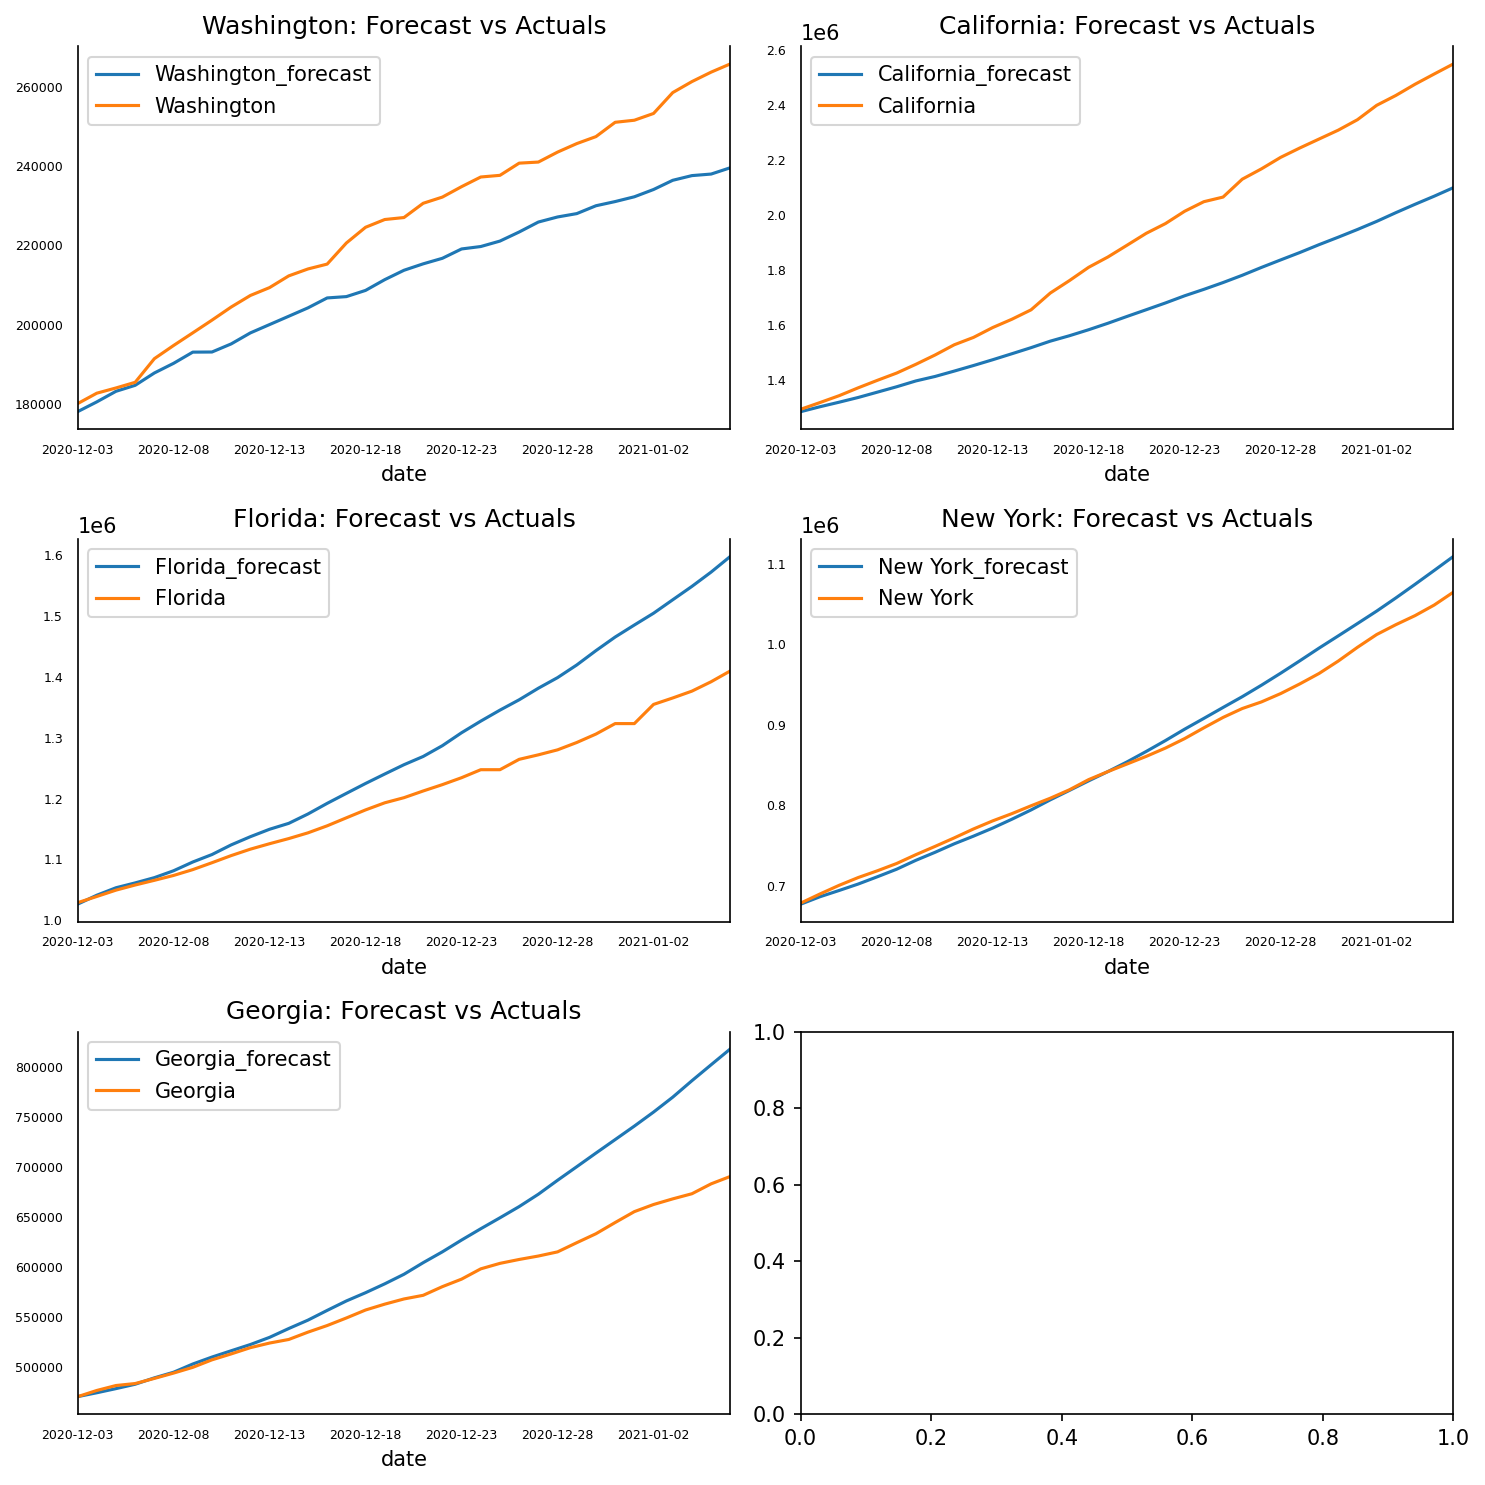

In [52]:
fig, axes = plt.subplots(nrows=3, ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df_cases_5state.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_cases_5state_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

##### **Evaluate the Forecast**

Out-of-sample $R^2$, where $\hat{z}$ is the prediction value and $\bar{z}$ is the sample mean of the training set.

$R^2=1-\frac{\sum (z_{t+1}-\hat{z}_{t+1|t})^2}{\sum (z_{t+1}-\bar{z}_t)^2} $

In [53]:
def rsquared(train, test, prediction):
  num = np.sum((test - prediction)**2)
  den = np.sum((test - np.mean(train))**2)
  return 1-(num/den)

In [54]:
print('Out-of-sample R^2 of: Washington')
print(rsquared(df_cases_5state_train_3diff['Washington'], df_cases_5state_test_3diff['Washington'], df_forecast['Washington_3d']))
print('Out-of-sample R^2 of: California')
print(rsquared(df_cases_5state_train_3diff['California'], df_cases_5state_test_3diff['California'], df_forecast['California_3d']))
print('Out-of-sample R^2 of: Florida')
print(rsquared(df_cases_5state_train_3diff['Florida'], df_cases_5state_test_3diff['Florida'], df_forecast['Florida_3d']))
print('Out-of-sample R^2 of: New York')
print(rsquared(df_cases_5state_train_3diff['New York'], df_cases_5state_test_3diff['New York'], df_forecast['New York_3d']))
print('Out-of-sample R^2 of: Georgia')
print(rsquared(df_cases_5state_train_3diff['Georgia'], df_cases_5state_test_3diff['Georgia'], df_forecast['Georgia_3d']))

Out-of-sample R^2 of: Washington
-0.3307646866855969
Out-of-sample R^2 of: California
0.007842520246343687
Out-of-sample R^2 of: Florida
-0.12923726525844836
Out-of-sample R^2 of: New York
-0.28796010835878105
Out-of-sample R^2 of: Georgia
-0.5329858145008826


**Mean absolute percentage error (MAPE)**

$M = \frac{1}{n}\sum_{i=1}^{n}|\frac{y_i-\hat{y}_i}{y_i}|,$

where $y$ is the actual value and $\hat{y}$ is the forecast value.

In [55]:
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

**Mean absolute error (MAE)**

$MAE = \frac{1}{n}\sum_{i=1}^{n}|\hat{y}_i-y_i|,$

where $y$ is the actual value and $\hat{y}$ is the forecast value.

#### **For Deaths**

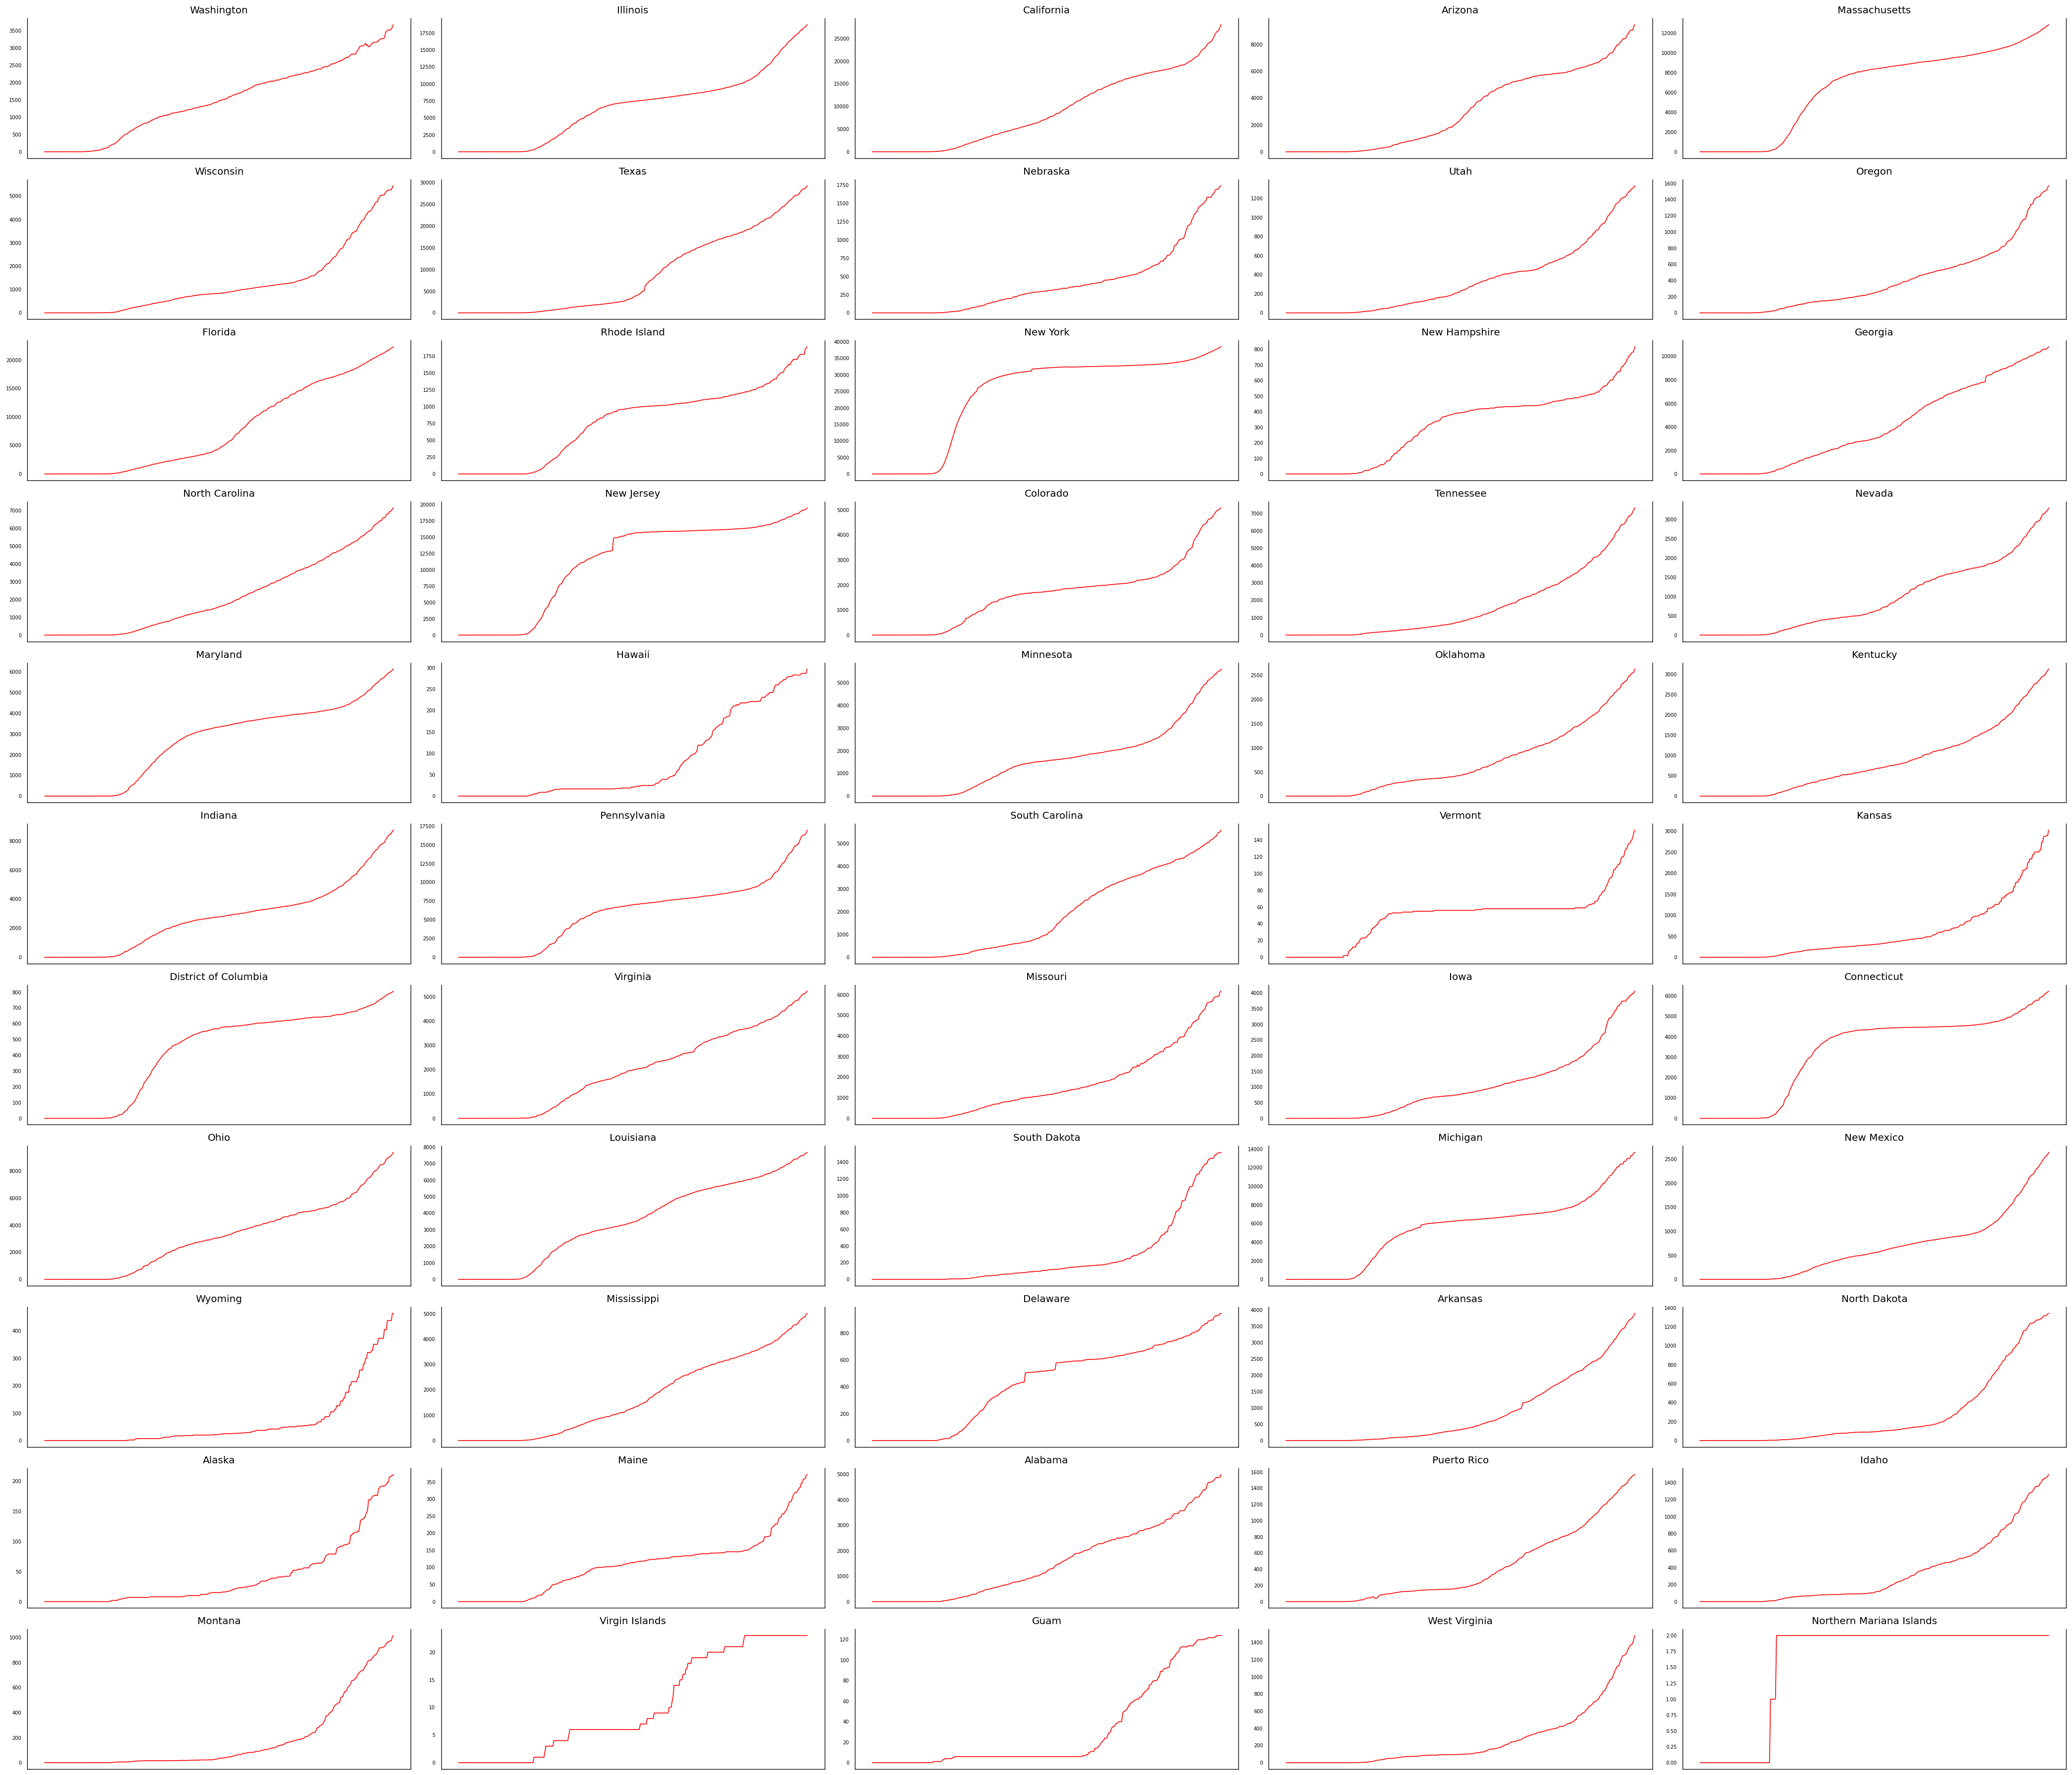

In [56]:
fig, axes = plt.subplots(nrows=11, ncols=5, dpi=120, figsize=(35,30))
for i, ax in enumerate(axes.flatten()):
    data = df_state_deaths2[df_state_deaths2.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    ax.set_title(df_state_deaths2.columns[i])
    date_form = DateFormatter('%Y-%m')
    ax.xaxis.set_major_formatter(date_form)
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

### **Vector Autoregressive (VAR) -- Moving Window**

#### **For Cases**

**Check for Stationarity and Make the Time Series Stationary**

* Augmented Dickey-Fuller Test

In [57]:
df_cases_5state[0:42]

Washington  California  Florida  New York  Georgia
date                                                          
2020-01-21           1         0.0      0.0       0.0      0.0
2020-01-22           1         0.0      0.0       0.0      0.0
2020-01-23           1         0.0      0.0       0.0      0.0
2020-01-24           1         0.0      0.0       0.0      0.0
2020-01-25           1         1.0      0.0       0.0      0.0
2020-01-26           1         2.0      0.0       0.0      0.0
2020-01-27           1         2.0      0.0       0.0      0.0
2020-01-28           1         2.0      0.0       0.0      0.0
2020-01-29           1         2.0      0.0       0.0      0.0
2020-01-30           1         2.0      0.0       0.0      0.0
2020-01-31           1         3.0      0.0       0.0      0.0
2020-02-01           1         3.0      0.0       0.0      0.0
2020-02-02           1         6.0      0.0       0.0      0.0
2020-02-03           1         6.0      0.0       0.0      0.0
2020-02-04           1         6.0      0.0       0.0      0.0
2020-02-05           1         6.0      0.0       0.0      0.0
2020-02-06           1         6.0      0.0       0.0      0.0
2020-02-07           1         6.0      0.0       0.0      0.0
2020-02-08           1         6.0      0.0       0.0      0.0
2020-02-09           1         6.0      0.0       0.0      0.0
2020-02-10           1         7.0      0.0       0.0      0.0
2020-02-11           1         7.0      0.0       0.0      0.0
2020-02-12           1         7.0      0.0       0.0      0.0
2020-02-13           1         7.0      0.0       0.0      0.0
2020-02-14           1         7.0      0.0       0.0      0.0
2020-02-15           1         7.0      0.0       0.0      0.0
2020-02-16           1         7.0      0.0       0.0      0.0
2020-02-17           1         7.0      0.0       0.0      0.0
2020-02-18           1         7.0      0.0       0.0      0.0
2020-02-19           1         7.0      0.0       0.0      0.0
2020-02-20           1         8.0      0.0       0.0      0.0
2020-02-21           1         9.0      0.0       0.0      0.0
2020-02-22           1         9.0      0.0       0.0      0.0
2020-02-23           1         9.0      0.0       0.0      0.0
2020-02-24           5        11.0      0.0       0.0      0.0
2020-02-25           5        11.0      0.0       0.0      0.0
2020-02-26           5        26.0      0.0       0.0      0.0
2020-02-27           5        26.0      0.0       0.0      0.0
2020-02-28           7        27.0      0.0       0.0      0.0
2020-02-29          10        28.0      0.0       0.0      0.0
2020-03-01          17        33.0      2.0       1.0      0.0
2020-03-02          23        38.0      2.0       1.0      2.0

In [58]:
df_cases_5state_mw = df_cases_5state[41:]

In [59]:
for name, column in df_cases_5state_mw.iteritems():
  adfuller_test(column, name=column.name)
  print('\n')

    Augmented Dickey-Fuller Test on "Washington" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 2.6097
 No. Lags Chosen       = 15
 Critical value 1%     = -3.453
 Critical value 5%     = -2.871
 Critical value 10%    = -2.572
 => P-Value = 0.9991. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "California" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 1.5395
 No. Lags Chosen       = 15
 Critical value 1%     = -3.453
 Critical value 5%     = -2.871
 Critical value 10%    = -2.572
 => P-Value = 0.9977. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Florida" 
    -----------------------------------------------
 Null Hypothesis: D

In [60]:
def takediff(df, first_diff=True, sec_diff=False, thr_diff=False):
  if first_diff:
    df_out = df.diff().dropna()
  if sec_diff:
    df_out = (df.diff().dropna()).diff().dropna()
  if thr_diff:
    df_out = ((df.diff().dropna()).diff().dropna()).diff().dropna()
  return df_out

In [61]:
# 1st difference
df_cases_5state_mw_1diff = takediff(df_cases_5state_mw, True, False, False)

In [62]:
for name, column in df_cases_5state_mw_1diff.iteritems():
  adfuller_test(column, name=column.name)
  print('\n')

    Augmented Dickey-Fuller Test on "Washington" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 0.1106
 No. Lags Chosen       = 16
 Critical value 1%     = -3.453
 Critical value 5%     = -2.871
 Critical value 10%    = -2.572
 => P-Value = 0.9668. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "California" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 0.0348
 No. Lags Chosen       = 14
 Critical value 1%     = -3.453
 Critical value 5%     = -2.871
 Critical value 10%    = -2.572
 => P-Value = 0.9613. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Florida" 
    -----------------------------------------------
 Null Hypothesis: D

In [63]:
# 2nd difference
df_cases_5state_mw_2diff = takediff(df_cases_5state_mw, False, True, False)

In [64]:
for name, column in df_cases_5state_mw_2diff.iteritems():
  adfuller_test(column, name=column.name)
  print('\n')

    Augmented Dickey-Fuller Test on "Washington" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.752
 No. Lags Chosen       = 16
 Critical value 1%     = -3.453
 Critical value 5%     = -2.871
 Critical value 10%    = -2.572
 => P-Value = 0.0034. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "California" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.0534
 No. Lags Chosen       = 16
 Critical value 1%     = -3.453
 Critical value 5%     = -2.871
 Critical value 10%    = -2.572
 => P-Value = 0.0302. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Florida" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Signifi

In [65]:
# 3rd difference
df_cases_5state_mw_3diff = takediff(df_cases_5state_mw, False, False, True)

In [66]:
for name, column in df_cases_5state_mw_3diff.iteritems():
  adfuller_test(column, name=column.name)
  print('\n')

    Augmented Dickey-Fuller Test on "Washington" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.7514
 No. Lags Chosen       = 15
 Critical value 1%     = -3.453
 Critical value 5%     = -2.871
 Critical value 10%    = -2.572
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "California" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.0939
 No. Lags Chosen       = 15
 Critical value 1%     = -3.453
 Critical value 5%     = -2.871
 Critical value 10%    = -2.572
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Florida" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance

##### **Moving Window -- 4 weeks**

In [67]:
dur4 = 4*7
iter4 = math.floor(df_cases_5state_mw.shape[0]-dur4)

In [68]:
def selectp(model):
  rows = []
  for i in [1,2,3]:
    result = model.fit(i)
    rows.append([i, result.bic])
  df_bic = pd.DataFrame(rows, columns=['lag','BIC'])
  df_lag = df_bic[df_bic.BIC == df_bic.BIC.min()]
  lag = int(df_lag['lag'])
  return lag

In [69]:
rows = []
rows2 = []
pred_rows = []
pred_lw_rows = []
pred_up_rows = []
for i in range(iter4):
  df4 = df_cases_5state_mw[i*1:(i*1+dur4+1)]
  df4_train, df4_test = df4[0:-1], df4[-1:]
  #df4_train, df4_test = df_cases_5state_mw[i*7:(i*7+dur4)], df_cases_5state_mw[(i*7+dur4):(i*7+dur4+7)]
  df4_diff = takediff(df4, False, False, True)
  df4_train_diff, df4_test_diff = df4_diff[0:-1], df4_diff[-1:]
  model = VAR(df4_train_diff)
  lag = selectp(model)
  cases_model_fitted = model.fit(lag)
  # Input data for forecasting
  forecast_input = df4_train_diff.values[-lag:]
  # Forecast
  #fc = cases_model_fitted.forecast(y=forecast_input, steps=1)
  #df_forecast = pd.DataFrame(fc, index=df4_test.index, columns=df_cases_5state.columns + '_3d')
  fc, lwl, upl = cases_model_fitted.forecast_interval(y=forecast_input, steps=1, alpha=0.05)
  df_forecast = pd.DataFrame(fc, index=df4_test.index, columns=df_cases_5state.columns + '_3d')
  df_forecast_lwl = pd.DataFrame(lwl, index=df4_test.index, columns=df_cases_5state.columns + '_3d')
  df_forecast_upl = pd.DataFrame(upl, index=df4_test.index, columns=df_cases_5state.columns + '_3d')
  # invert the transformation to get the real forecast
  #df_results = invert_transformation(df4_train, df_forecast)
  df_results = invert_transformation(df4_train, df_forecast)
  df_results_lwl = invert_transformation(df4_train, df_forecast_lwl)
  df_results_upl = invert_transformation(df4_train, df_forecast_upl)
  pred_rows.append(df_results)
  pred_lw_rows.append(df_results_lwl)
  pred_up_rows.append(df_results_upl)
  # evaluate the forecast
  #rsquared_Washington = rsquared(df4_train_diff['Washington'], df4_test_diff['Washington'], df_forecast['Washington_3d'])
  #rsquared_California = rsquared(df4_train_diff['California'], df4_test_diff['California'], df_forecast['California_3d'])
  #rsquared_Florida = rsquared(df4_train_diff['Florida'], df4_test_diff['Florida'], df_forecast['Florida_3d'])
  #rsquared_NewYork = rsquared(df4_train_diff['New York'], df4_test_diff['New York'], df_forecast['New York_3d'])
  #rsquared_Georgia = rsquared(df4_train_diff['Georgia'], df4_test_diff['Georgia'], df_forecast['Georgia_3d'])
  mape_Washington = mean_absolute_percentage_error(df4_test_diff['Washington'], df_forecast['Washington_3d'])
  mape_California = mean_absolute_percentage_error(df4_test_diff['California'], df_forecast['California_3d'])
  mape_Florida = mean_absolute_percentage_error(df4_test_diff['Florida'], df_forecast['Florida_3d'])
  mape_NewYork = mean_absolute_percentage_error(df4_test_diff['New York'], df_forecast['New York_3d'])
  mape_Georgia = mean_absolute_percentage_error(df4_test_diff['Georgia'], df_forecast['Georgia_3d'])
  rows.append([mape_Washington, mape_California, mape_Florida, mape_NewYork, mape_Georgia])
  mae_Washington = mean_absolute_error(df4_test_diff['Washington'], df_forecast['Washington_3d'])
  mae_California = mean_absolute_error(df4_test_diff['California'], df_forecast['California_3d'])
  mae_Florida = mean_absolute_error(df4_test_diff['Florida'], df_forecast['Florida_3d'])
  mae_NewYork = mean_absolute_error(df4_test_diff['New York'], df_forecast['New York_3d'])
  mae_Georgia = mean_absolute_error(df4_test_diff['Georgia'], df_forecast['Georgia_3d'])
  rows2.append([mae_Washington, mae_California, mae_Florida, mae_NewYork, mae_Georgia])
df_dur4_var_out_mape = pd.DataFrame(rows, columns=['Washington','California', 'Florida', 'New York', 'Georgia'])
df_dur4_var_out_mae = pd.DataFrame(rows2, columns=['Washington','California', 'Florida', 'New York', 'Georgia'])
df_forecast_var4 = pd.concat(pred_rows)[['Washington_forecast','California_forecast','Florida_forecast','New York_forecast','Georgia_forecast']]
df_forecast_lw_var4 = pd.concat(pred_lw_rows)[['Washington_forecast','California_forecast','Florida_forecast','New York_forecast','Georgia_forecast']]
df_forecast_up_var4 = pd.concat(pred_up_rows)[['Washington_forecast','California_forecast','Florida_forecast','New York_forecast','Georgia_forecast']]
df_dur4_var_out_mape

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred f

Washington   California      Florida     New York     Georgia
0      99.558061   108.282496   138.601426   119.099573  415.695872
1     566.290029    48.856198    29.464215   947.927624  169.881214
2     190.744113  1385.243732    43.113738   891.676868    5.273887
3     286.705331   631.127389   125.461430   467.253224   71.569384
4      79.459233  6777.320351   412.663019  1634.319735  585.203823
..           ...          ...          ...          ...         ...
278    15.706454   313.175770    54.044808    99.748136  146.965522
279  1112.345281   582.096826    80.682526   251.629945  113.683214
280   154.648204   576.454914   127.384587   265.062282  377.518833
281    59.367152  1201.564131   460.901618   459.286866  535.675713
282  3789.209707   514.447125  1216.415817   549.705823  144.749694

[283 rows x 5 columns]

In [70]:
df_dur4_var_out_mae

Washington     California       Florida      New York       Georgia
0      346.462051     260.960816    302.151109   4716.343100    523.776798
1      753.165739     138.263040    131.999683   4445.780557   1056.661153
2      673.326718     692.621866    135.808274  13731.823771     62.653774
3     1485.133616     334.497516    281.033603   6527.527540    371.445102
4     1046.478099     881.051646    722.160284   8008.166701   1404.489176
..            ...            ...           ...           ...           ...
278    670.979722   26767.133055  26325.225950   2816.887373   5054.144314
279  26451.570788  177667.593095  42304.268862   6122.156551   2568.103809
280   9368.588195  121574.341421  27474.307731   6963.186144   3831.816158
281   1252.646908   99369.353635  16232.954975  13273.390413  28069.407359
282   2955.583571   14780.065898  22175.260347   5354.134713  10520.407780

[283 rows x 5 columns]

In [71]:
df_forecast_var4

Washington_forecast  ...  Georgia_forecast
date                             ...                  
2020-03-30          4833.537949  ...       3555.776798
2020-03-31          6046.165739  ...       3059.338847
2020-04-01          6262.326718  ...       4809.653774
2020-04-02          5100.866384  ...       5815.445102
2020-04-03          5920.521901  ...       7371.489176
...                         ...  ...               ...
2021-01-02        252619.020278  ...     657022.855686
2021-01-03        232105.429212  ...     670273.103809
2021-01-04        270696.588195  ...     676680.816158
2021-01-05        264965.646908  ...     710818.407359
2021-01-06        268745.583571  ...     700657.407780

[283 rows x 5 columns]

In [72]:
index4 = df_forecast_var4.index
valuemean = df_forecast_var4['Washington_forecast']
valuelw = df_forecast_lw_var4['Washington_forecast']
valueup = df_forecast_up_var4['Washington_forecast']
valuet = df_cases_5state.loc[index4,'Washington']
df_vis_washingtonmean = pd.DataFrame(list(zip(index4,valuemean)), columns=['date','value'])
df_vis_washingtonlw = pd.DataFrame(list(zip(index4,valuelw)), columns=['date','value'])
df_vis_washingtonup = pd.DataFrame(list(zip(index4,valueup)), columns=['date','value'])
df_vis_washingtont = pd.DataFrame(list(zip(index4,valuet)), columns=['date','value'])
df_vis_washingtonmean['variable'] = 'Forecast Value'
df_vis_washingtonlw['variable'] = 'Lower Limit'
df_vis_washingtonup['variable'] = 'Upper Limit'
df_vis_washingtont['variable'] = 'true'

In [73]:
df_vis_washington_var4 = pd.concat([df_vis_washingtonmean, df_vis_washingtonlw, df_vis_washingtonup])
fig = px.line(df_vis_washington_var4, x="date", y="value", color='variable', 
              title="Washington (VAR) 4 weeks with 95% prediction interval")
fig.show()

##### **Moving Window -- 8 weeks**

In [74]:
dur8 = 8*7
iter8 = math.floor(df_cases_5state_mw.shape[0]-dur8)

In [75]:
def selectp(model):
  rows = []
  for i in [1,2,3,4,5,6,7]:
    result = model.fit(i)
    rows.append([i, result.bic])
  df_bic = pd.DataFrame(rows, columns=['lag','BIC'])
  df_lag = df_bic[df_bic.BIC == df_bic.BIC.min()]
  lag = int(df_lag['lag'])
  return lag

In [ ]:
rows = []
rows2 = []
pred_rows = []
for i in range(iter8):
  df8 = df_cases_5state_mw[i*1:(i*1+dur8+1)]
  df8_train, df8_test = df8[0:-1], df8[-1:]
  #df8_train, df8_test = df_cases_5state_mw[i*7:(i*7+dur8)], df_cases_5state_mw[(i*7+dur8):(i*7+dur8+7)]
  df8_diff = takediff(df8, False, False, True)
  df8_train_diff, df8_test_diff = df8_diff[0:-1], df8_diff[-1:]
  model = VAR(df8_train_diff)
  lag = selectp(model)
  cases_model_fitted = model.fit(lag)
  # Input data for forecasting
  forecast_input = df8_train_diff.values[-lag:]
  # Forecast
  fc = cases_model_fitted.forecast(y=forecast_input, steps=1)
  df_forecast = pd.DataFrame(fc, index=df8_test.index, columns=df_cases_5state.columns + '_3d')
  # invert the transformation to get the real forecast
  df_results = invert_transformation(df8_train, df_forecast)
  pred_rows.append(df_results)
  # evaluate the forecast
  #rsquared_Washington = rsquared(df8_train_diff['Washington'], df8_test_diff['Washington'], df_forecast['Washington_3d'])
  #rsquared_California = rsquared(df8_train_diff['California'], df8_test_diff['California'], df_forecast['California_3d'])
  #rsquared_Florida = rsquared(df8_train_diff['Florida'], df8_test_diff['Florida'], df_forecast['Florida_3d'])
  #rsquared_NewYork = rsquared(df8_train_diff['New York'], df8_test_diff['New York'], df_forecast['New York_3d'])
  #rsquared_Georgia = rsquared(df8_train_diff['Georgia'], df8_test_diff['Georgia'], df_forecast['Georgia_3d'])
  mape_Washington = mean_absolute_percentage_error(df8_test_diff['Washington'], df_forecast['Washington_3d'])
  mape_California = mean_absolute_percentage_error(df8_test_diff['California'], df_forecast['California_3d'])
  mape_Florida = mean_absolute_percentage_error(df8_test_diff['Florida'], df_forecast['Florida_3d'])
  mape_NewYork = mean_absolute_percentage_error(df8_test_diff['New York'], df_forecast['New York_3d'])
  mape_Georgia = mean_absolute_percentage_error(df8_test_diff['Georgia'], df_forecast['Georgia_3d'])
  rows.append([mape_Washington, mape_California, mape_Florida, mape_NewYork, mape_Georgia])
  mae_Washington = mean_absolute_error(df8_test_diff['Washington'], df_forecast['Washington_3d'])
  mae_California = mean_absolute_error(df8_test_diff['California'], df_forecast['California_3d'])
  mae_Florida = mean_absolute_error(df8_test_diff['Florida'], df_forecast['Florida_3d'])
  mae_NewYork = mean_absolute_error(df8_test_diff['New York'], df_forecast['New York_3d'])
  mae_Georgia = mean_absolute_error(df8_test_diff['Georgia'], df_forecast['Georgia_3d'])
  rows2.append([mae_Washington, mae_California, mae_Florida, mae_NewYork, mae_Georgia])
df_dur8_var_out_mape = pd.DataFrame(rows, columns=['Washington','California', 'Florida', 'New York', 'Georgia'])
df_dur8_var_out_mae = pd.DataFrame(rows2, columns=['Washington','California', 'Florida', 'New York', 'Georgia'])
df_forecast_var8 = pd.concat(pred_rows)[['Washington_forecast','California_forecast','Florida_forecast','New York_forecast','Georgia_forecast']]
df_dur8_var_out_mape

In [77]:
df_dur8_var_out_mae

Washington    California       Florida      New York      Georgia
0     632.329095   3305.555468   2821.638278  17732.867405  2551.437768
1     738.827559   1465.098761   1035.536440  13181.543736  1167.103736
2    1624.960742   1526.800665     82.724555  10535.064666   653.563661
3    1008.278135    219.367441   1655.984154   5689.252649  1359.545914
4     454.661932    244.871452    742.388661  10955.471426   775.886683
..           ...           ...           ...           ...          ...
250  1694.218366   1346.778168  20402.560047   1668.483523   122.884877
251  3121.810272    545.892888  15326.633547   7609.297945  3495.772595
252   464.357476  24641.571816   1318.466415    908.246833  3411.709601
253   982.180686  11068.410598  20326.885233   1210.439946  1722.520745
254  1625.231220  65087.208684   4557.766490   5364.956490  1468.503466

[255 rows x 5 columns]

In [78]:
df_forecast_var8

Washington_forecast  ...  Georgia_forecast
date                             ...                  
2020-04-27         13325.670905  ...      20677.562232
2020-04-28         14903.827559  ...      24774.103736
2020-04-29         16114.960742  ...      23646.436339
2020-04-30         13805.721865  ...      24071.454086
2020-05-01         14679.338068  ...      25660.113317
...                         ...  ...               ...
2021-01-02        254984.218366  ...     662199.884877
2021-01-03        255435.189728  ...     671200.772595
2021-01-04        260863.642524  ...     676260.709601
2021-01-05        264695.180686  ...     681026.479255
2021-01-06        264164.768780  ...     691605.503466

[255 rows x 5 columns]

##### **Moving Window -- 12 weeks**

In [79]:
dur12 = 12*7
iter12 = math.floor(df_cases_5state_mw.shape[0]-dur12)

In [80]:
def selectp(model):
  rows = []
  for i in [1,2,3,4,5,6,7,8,9,10]:
    result = model.fit(i)
    rows.append([i, result.bic])
  df_bic = pd.DataFrame(rows, columns=['lag','BIC'])
  df_lag = df_bic[df_bic.BIC == df_bic.BIC.min()]
  lag = int(df_lag['lag'])
  return lag

In [ ]:
rows = []
rows2 = []
pred_rows = []
pred_lw_rows = []
pred_up_rows = []
pred_rows = []
for i in range(iter12):
  df12 = df_cases_5state_mw[i*1:(i*1+dur12+1)]
  df12_train, df12_test = df12[0:-1], df12[-1:]
  #df12_train, df12_test = df_cases_5state_mw[i*7:(i*7+dur12)], df_cases_5state_mw[(i*7+dur12):(i*7+dur12+7)]
  df12_diff = takediff(df12, False, False, True)
  df12_train_diff, df12_test_diff = df12_diff[0:-1], df12_diff[-1:]
  model = VAR(df12_train_diff)
  lag = selectp(model)
  cases_model_fitted = model.fit(lag)
  # Input data for forecasting
  forecast_input = df12_train_diff.values[-lag:]
  # Forecast
  #fc = cases_model_fitted.forecast(y=forecast_input, steps=1)
  #df_forecast = pd.DataFrame(fc, index=df12_test.index, columns=df_cases_5state.columns + '_3d')
  fc, lwl, upl = cases_model_fitted.forecast_interval(y=forecast_input, steps=1, alpha=0.05)
  df_forecast = pd.DataFrame(fc, index=df12_test.index, columns=df_cases_5state.columns + '_3d')
  df_forecast_lwl = pd.DataFrame(lwl, index=df12_test.index, columns=df_cases_5state.columns + '_3d')
  df_forecast_upl = pd.DataFrame(upl, index=df12_test.index, columns=df_cases_5state.columns + '_3d')
  # invert the transformation to get the real forecast
  #df_results = invert_transformation(df12_train, df_forecast)
  #pred_rows.append(df_results)
  df_results = invert_transformation(df12_train, df_forecast)
  df_results_lwl = invert_transformation(df12_train, df_forecast_lwl)
  df_results_upl = invert_transformation(df12_train, df_forecast_upl)
  pred_rows.append(df_results)
  pred_lw_rows.append(df_results_lwl)
  pred_up_rows.append(df_results_upl)
  # evaluate the forecast
  #rsquared_Washington = rsquared(df12_train_diff['Washington'], df12_test_diff['Washington'], df_forecast['Washington_3d'])
  #rsquared_California = rsquared(df12_train_diff['California'], df12_test_diff['California'], df_forecast['California_3d'])
  #rsquared_Florida = rsquared(df12_train_diff['Florida'], df12_test_diff['Florida'], df_forecast['Florida_3d'])
  #rsquared_NewYork = rsquared(df12_train_diff['New York'], df12_test_diff['New York'], df_forecast['New York_3d'])
  #rsquared_Georgia = rsquared(df12_train_diff['Georgia'], df12_test_diff['Georgia'], df_forecast['Georgia_3d'])
  mape_Washington = mean_absolute_percentage_error(df12_test_diff['Washington'], df_forecast['Washington_3d'])
  mape_California = mean_absolute_percentage_error(df12_test_diff['California'], df_forecast['California_3d'])
  mape_Florida = mean_absolute_percentage_error(df12_test_diff['Florida'], df_forecast['Florida_3d'])
  mape_NewYork = mean_absolute_percentage_error(df12_test_diff['New York'], df_forecast['New York_3d'])
  mape_Georgia = mean_absolute_percentage_error(df12_test_diff['Georgia'], df_forecast['Georgia_3d'])
  rows.append([mape_Washington, mape_California, mape_Florida, mape_NewYork, mape_Georgia])
  mae_Washington = mean_absolute_error(df12_test_diff['Washington'], df_forecast['Washington_3d'])
  mae_California = mean_absolute_error(df12_test_diff['California'], df_forecast['California_3d'])
  mae_Florida = mean_absolute_error(df12_test_diff['Florida'], df_forecast['Florida_3d'])
  mae_NewYork = mean_absolute_error(df12_test_diff['New York'], df_forecast['New York_3d'])
  mae_Georgia = mean_absolute_error(df12_test_diff['Georgia'], df_forecast['Georgia_3d'])
  rows2.append([mae_Washington, mae_California, mae_Florida, mae_NewYork, mae_Georgia])
df_dur12_var_out_mape = pd.DataFrame(rows, columns=['Washington','California', 'Florida', 'New York', 'Georgia'])
df_dur12_var_out_mae = pd.DataFrame(rows2, columns=['Washington','California', 'Florida', 'New York', 'Georgia'])
df_forecast_var12 = pd.concat(pred_rows)[['Washington_forecast','California_forecast','Florida_forecast','New York_forecast','Georgia_forecast']]
df_forecast_lw_var12 = pd.concat(pred_lw_rows)[['Washington_forecast','California_forecast','Florida_forecast','New York_forecast','Georgia_forecast']]
df_forecast_up_var12 = pd.concat(pred_up_rows)[['Washington_forecast','California_forecast','Florida_forecast','New York_forecast','Georgia_forecast']]
df_dur12_var_out_mape

In [82]:
df_dur12_var_out_mae

Washington    California       Florida     New York       Georgia
0     172.896326    997.601187    186.818473  1294.124457    922.138127
1     179.166058    794.628180     56.642377   352.884488    145.036824
2      86.020653    637.646796    252.439101  1233.943100    135.610445
3     133.329332    251.089548    130.973372  1676.798567    108.024580
4      81.451521    422.997208    835.522722   487.568865    152.720053
..           ...           ...           ...          ...           ...
222  1590.886177  23248.878456  13499.198790   352.276776   6307.486929
223  3295.956376   1875.565040  13948.890879   132.008301   3078.514070
224  2719.283763   9603.356846   4250.423349  7512.938143   3675.142705
225  5449.518945   3032.022235  14199.873666  7012.499356  15932.914206
226   467.275247   5292.325356   1406.709126  5358.567343    592.497256

[227 rows x 5 columns]

In [83]:
df_forecast_var12

Washington_forecast  ...  Georgia_forecast
date                             ...                  
2020-05-25         21092.103674  ...      42336.138127
2020-05-26         21717.166058  ...      41920.963176
2020-05-27         21738.979347  ...      42577.389555
2020-05-28         22224.329332  ...      43254.975420
2020-05-29         22458.451521  ...      44040.720053
...                         ...  ...               ...
2021-01-02        251699.113823  ...     668384.486929
2021-01-03        255261.043624  ...     670783.514070
2021-01-04        258608.716237  ...     676524.142705
2021-01-05        269162.518945  ...     666816.085794
2021-01-06        265322.724753  ...     689544.502744

[227 rows x 5 columns]

###### **Visualization with CI**

In [84]:
index4 = df_forecast_var12.index
valuemean = df_forecast_var12['Washington_forecast']
valuelw = df_forecast_lw_var12['Washington_forecast']
valueup = df_forecast_up_var12['Washington_forecast']
valuet = df_cases_5state.loc[index4,'Washington']
df_vis_washingtonmean = pd.DataFrame(list(zip(index4,valuemean)), columns=['date','value'])
df_vis_washingtonlw = pd.DataFrame(list(zip(index4,valuelw)), columns=['date','value'])
df_vis_washingtonup = pd.DataFrame(list(zip(index4,valueup)), columns=['date','value'])
df_vis_washingtont = pd.DataFrame(list(zip(index4,valuet)), columns=['date','value'])
df_vis_washingtonmean['variable'] = 'Forecast Value'
df_vis_washingtonlw['variable'] = 'Lower Limit'
df_vis_washingtonup['variable'] = 'Upper Limit'
df_vis_washingtont['variable'] = 'true'

In [85]:
df_vis_washington_var4 = pd.concat([df_vis_washingtonmean, df_vis_washingtonlw, df_vis_washingtonup])
fig = px.line(df_vis_washington_var4, x="date", y="value", color='variable', 
              title="Washington (VAR) 12 weeks with 95% prediction interval")
fig.show()

##### **Visualization**

###### **Washington**

In [ ]:
index12 = df_forecast_var12.index
value12 = df_forecast_var12['Washington_forecast']
value8 = df_forecast_var8.loc[index12,'Washington_forecast']
value4 = df_forecast_var4.loc[index12,'Washington_forecast']
valuet = df_cases_5state.loc[index12,'Washington']
df_vis_washington12 = pd.DataFrame(list(zip(index12,value12)), columns=['date','value'])
df_vis_washington8 = pd.DataFrame(list(zip(index12,value8)), columns=['date','value'])
df_vis_washington4 = pd.DataFrame(list(zip(index12,value4)), columns=['date','value'])
df_vis_washingtont = pd.DataFrame(list(zip(index12,valuet)), columns=['date','value'])
df_vis_washington12['variable'] = '12 weeks'
df_vis_washington8['variable'] = '8 weeks'
df_vis_washington4['variable'] = '4 weeks'
df_vis_washingtont['variable'] = 'true'

In [ ]:
df_vis_washington = pd.concat([df_vis_washingtont, df_vis_washington4, df_vis_washington8, df_vis_washington12])
df_vis_washington

date          value  variable
0    2020-05-25   21265.000000      true
1    2020-05-26   21538.000000      true
2    2020-05-27   21825.000000      true
3    2020-05-28   22091.000000      true
4    2020-05-29   22377.000000      true
..          ...            ...       ...
222  2021-01-02  251699.113823  12 weeks
223  2021-01-03  255261.043624  12 weeks
224  2021-01-04  258608.716237  12 weeks
225  2021-01-05  269162.518945  12 weeks
226  2021-01-06  265322.724753  12 weeks

[908 rows x 3 columns]

In [ ]:
fig = px.line(df_vis_washington, x="date", y="value", color='variable', 
              title="Washington (VAR)")
fig.show()

###### **California**

In [ ]:
index12 = df_forecast_var12.index
value12 = df_forecast_var12['California_forecast']
value8 = df_forecast_var8.loc[index12,'California_forecast']
value4 = df_forecast_var4.loc[index12,'California_forecast']
valuet = df_cases_5state.loc[index12,'California']
df_vis_California12 = pd.DataFrame(list(zip(index12,value12)), columns=['date','value'])
df_vis_California8 = pd.DataFrame(list(zip(index12,value8)), columns=['date','value'])
df_vis_California4 = pd.DataFrame(list(zip(index12,value4)), columns=['date','value'])
df_vis_Californiat = pd.DataFrame(list(zip(index12,valuet)), columns=['date','value'])
df_vis_California12['variable'] = '12 weeks'
df_vis_California8['variable'] = '8 weeks'
df_vis_California4['variable'] = '4 weeks'
df_vis_Californiat['variable'] = 'true'

In [ ]:
df_vis_California = pd.concat([df_vis_Californiat, df_vis_California4, df_vis_California8, df_vis_California12])
df_vis_California

date         value  variable
0    2020-05-25  9.701700e+04      true
1    2020-05-26  9.992400e+04      true
2    2020-05-27  1.018730e+05      true
3    2020-05-28  1.040710e+05      true
4    2020-05-29  1.070430e+05      true
..          ...           ...       ...
222  2021-01-02  2.374674e+06  12 weeks
223  2021-01-03  2.431962e+06  12 weeks
224  2021-01-04  2.464958e+06  12 weeks
225  2021-01-05  2.508790e+06  12 weeks
226  2021-01-06  2.553786e+06  12 weeks

[908 rows x 3 columns]

In [ ]:
fig = px.line(df_vis_California, x="date", y="value", color='variable', 
              title="California (VAR)")
fig.show()

###### **Florida**

In [ ]:
index12 = df_forecast_var12.index
value12 = df_forecast_var12['Florida_forecast']
value8 = df_forecast_var8.loc[index12,'Florida_forecast']
value4 = df_forecast_var4.loc[index12,'Florida_forecast']
valuet = df_cases_5state.loc[index12,'Florida']
df_vis_Florida12 = pd.DataFrame(list(zip(index12,value12)), columns=['date','value'])
df_vis_Florida8 = pd.DataFrame(list(zip(index12,value8)), columns=['date','value'])
df_vis_Florida4 = pd.DataFrame(list(zip(index12,value4)), columns=['date','value'])
df_vis_Floridat = pd.DataFrame(list(zip(index12,valuet)), columns=['date','value'])
df_vis_Florida12['variable'] = '12 weeks'
df_vis_Florida8['variable'] = '8 weeks'
df_vis_Florida4['variable'] = '4 weeks'
df_vis_Floridat['variable'] = 'true'

In [ ]:
df_vis_Florida = pd.concat([df_vis_Floridat, df_vis_Florida4, df_vis_Florida8, df_vis_Florida12])
df_vis_Florida

date         value  variable
0    2020-05-25  5.173800e+04      true
1    2020-05-26  5.224700e+04      true
2    2020-05-27  5.262600e+04      true
3    2020-05-28  5.327700e+04      true
4    2020-05-29  5.448900e+04      true
..          ...           ...       ...
222  2021-01-02  1.341326e+06  12 weeks
223  2021-01-03  1.351479e+06  12 weeks
224  2021-01-04  1.372434e+06  12 weeks
225  2021-01-05  1.406315e+06  12 weeks
226  2021-01-06  1.408491e+06  12 weeks

[908 rows x 3 columns]

In [ ]:
fig = px.line(df_vis_Florida, x="date", y="value", color='variable', 
              title="Florida (VAR)")
fig.show()

###### **New York**

In [ ]:
index12 = df_forecast_var12.index
value12 = df_forecast_var12['New York_forecast']
value8 = df_forecast_var8.loc[index12,'New York_forecast']
value4 = df_forecast_var4.loc[index12,'New York_forecast']
valuet = df_cases_5state.loc[index12,'New York']
df_vis_New_York12 = pd.DataFrame(list(zip(index12,value12)), columns=['date','value'])
df_vis_New_York8 = pd.DataFrame(list(zip(index12,value8)), columns=['date','value'])
df_vis_New_York4 = pd.DataFrame(list(zip(index12,value4)), columns=['date','value'])
df_vis_New_Yorkt = pd.DataFrame(list(zip(index12,valuet)), columns=['date','value'])
df_vis_New_York12['variable'] = '12 weeks'
df_vis_New_York8['variable'] = '8 weeks'
df_vis_New_York4['variable'] = '4 weeks'
df_vis_New_Yorkt['variable'] = 'true'

In [ ]:
df_vis_New_York = pd.concat([df_vis_New_Yorkt, df_vis_New_York4, df_vis_New_York8, df_vis_New_York12])
df_vis_New_York

date         value  variable
0    2020-05-25  3.676250e+05      true
1    2020-05-26  3.686690e+05      true
2    2020-05-27  3.698010e+05      true
3    2020-05-28  3.715590e+05      true
4    2020-05-29  3.731080e+05      true
..          ...           ...       ...
222  2021-01-02  1.011570e+06  12 weeks
223  2021-01-03  1.024022e+06  12 weeks
224  2021-01-04  1.042909e+06  12 weeks
225  2021-01-05  1.041526e+06  12 weeks
226  2021-01-06  1.059195e+06  12 weeks

[908 rows x 3 columns]

In [ ]:
fig = px.line(df_vis_New_York, x="date", y="value", color='variable', 
              title="New York (VAR)")
fig.show()

###### **Georgia**

In [ ]:
index12 = df_forecast_var12.index
value12 = df_forecast_var12['Georgia_forecast']
value8 = df_forecast_var8.loc[index12,'Georgia_forecast']
value4 = df_forecast_var4.loc[index12,'Georgia_forecast']
valuet = df_cases_5state.loc[index12,'Georgia']
df_vis_Georgia12 = pd.DataFrame(list(zip(index12,value12)), columns=['date','value'])
df_vis_Georgia8 = pd.DataFrame(list(zip(index12,value8)), columns=['date','value'])
df_vis_Georgia4 = pd.DataFrame(list(zip(index12,value4)), columns=['date','value'])
df_vis_Georgiat = pd.DataFrame(list(zip(index12,valuet)), columns=['date','value'])
df_vis_Georgia12['variable'] = '12 weeks'
df_vis_Georgia8['variable'] = '8 weeks'
df_vis_Georgia4['variable'] = '4 weeks'
df_vis_Georgiat['variable'] = 'true'

In [ ]:
df_vis_Georgia = pd.concat([df_vis_Georgiat, df_vis_Georgia4, df_vis_Georgia8, df_vis_Georgia12])
df_vis_Georgia

date          value  variable
0    2020-05-25   41414.000000      true
1    2020-05-26   42066.000000      true
2    2020-05-27   42713.000000      true
3    2020-05-28   43363.000000      true
4    2020-05-29   43888.000000      true
..          ...            ...       ...
222  2021-01-02  668384.486929  12 weeks
223  2021-01-03  670783.514070  12 weeks
224  2021-01-04  676524.142705  12 weeks
225  2021-01-05  666816.085794  12 weeks
226  2021-01-06  689544.502744  12 weeks

[908 rows x 3 columns]

In [ ]:
fig = px.line(df_vis_Georgia, x="date", y="value", color='variable', 
              title="Georgia (VAR)")
fig.show()

##### **New 6 States**

In [214]:
df_cases_6state = df_state_cases[['Washington','Oregon','North Carolina','Tennessee','Nevada','Arkansas']]
df_cases_6state

Washington    Oregon  North Carolina  Tennessee    Nevada  Arkansas
date                                                                           
2020-01-21           1       0.0             0.0        0.0       0.0       0.0
2020-01-22           1       0.0             0.0        0.0       0.0       0.0
2020-01-23           1       0.0             0.0        0.0       0.0       0.0
2020-01-24           1       0.0             0.0        0.0       0.0       0.0
2020-01-25           1       0.0             0.0        0.0       0.0       0.0
...                ...       ...             ...        ...       ...       ...
2021-01-02      253290  116348.0        559942.0   589406.0  229601.0  231442.0
2021-01-03      258557  117745.0        565260.0   593363.0  231869.0  233475.0
2021-01-04      261328  118473.0        572018.0   597201.0  233337.0  234781.0
2021-01-05      263713  119508.0        578309.0   602397.0  235723.0  238888.0
2021-01-06      265790  120243.0        584694.0   610347.0  237788.0  242593.0

[352 rows x 6 columns]

In [215]:
dur12 = 12*7
iter12 = math.floor(df_cases_6state.shape[0]-dur12)

In [220]:
def selectp(model):
  rows = []
  for i in [1,2,3,4,5,6,7]:
    result = model.fit(i)
    rows.append([i, result.bic])
  df_bic = pd.DataFrame(rows, columns=['lag','BIC'])
  df_lag = df_bic[df_bic.BIC == df_bic.BIC.min()]
  lag = int(df_lag['lag'])
  return lag

In [221]:
rows = []
rows2 = []
pred_rows = []
pred_lw_rows = []
pred_up_rows = []
pred_rows = []
for i in range(iter12):
  df12 = df_cases_6state[i*1:(i*1+dur12+1)]
  df12_train, df12_test = df12[0:-1], df12[-1:]
  #df12_train, df12_test = df_cases_6state[i*7:(i*7+dur12)], df_cases_6state[(i*7+dur12):(i*7+dur12+7)]
  df12_diff = takediff(df12, False, False, True)
  df12_train_diff, df12_test_diff = df12_diff[0:-1], df12_diff[-1:]
  model = VAR(df12_train_diff)
  lag = selectp(model)
  cases_model_fitted = model.fit(lag)
  # Input data for forecasting
  forecast_input = df12_train_diff.values[-lag:]
  # Forecast
  #fc = cases_model_fitted.forecast(y=forecast_input, steps=1)
  #df_forecast = pd.DataFrame(fc, index=df12_test.index, columns=df_cases_6state.columns + '_3d')
  fc, lwl, upl = cases_model_fitted.forecast_interval(y=forecast_input, steps=1, alpha=0.05)
  df_forecast = pd.DataFrame(fc, index=df12_test.index, columns=df_cases_6state.columns + '_3d')
  df_forecast_lwl = pd.DataFrame(lwl, index=df12_test.index, columns=df_cases_6state.columns + '_3d')
  df_forecast_upl = pd.DataFrame(upl, index=df12_test.index, columns=df_cases_6state.columns + '_3d')
  # invert the transformation to get the real forecast
  #df_results = invert_transformation(df12_train, df_forecast)
  #pred_rows.append(df_results)
  df_results = invert_transformation(df12_train, df_forecast)
  df_results_lwl = invert_transformation(df12_train, df_forecast_lwl)
  df_results_upl = invert_transformation(df12_train, df_forecast_upl)
  pred_rows.append(df_results)
  pred_lw_rows.append(df_results_lwl)
  pred_up_rows.append(df_results_upl)
  # evaluate the forecast
  #rsquared_Washington = rsquared(df12_train_diff['Washington'], df12_test_diff['Washington'], df_forecast['Washington_3d'])
  #rsquared_California = rsquared(df12_train_diff['California'], df12_test_diff['California'], df_forecast['California_3d'])
  #rsquared_Florida = rsquared(df12_train_diff['Florida'], df12_test_diff['Florida'], df_forecast['Florida_3d'])
  #rsquared_NewYork = rsquared(df12_train_diff['New York'], df12_test_diff['New York'], df_forecast['New York_3d'])
  #rsquared_Georgia = rsquared(df12_train_diff['Georgia'], df12_test_diff['Georgia'], df_forecast['Georgia_3d'])
  #mape_Washington = mean_absolute_percentage_error(df12_test_diff['Washington'], df_forecast['Washington_3d'])
  #mape_California = mean_absolute_percentage_error(df12_test_diff['California'], df_forecast['California_3d'])
  #mape_Florida = mean_absolute_percentage_error(df12_test_diff['Florida'], df_forecast['Florida_3d'])
  #mape_NewYork = mean_absolute_percentage_error(df12_test_diff['New York'], df_forecast['New York_3d'])
  #mape_Georgia = mean_absolute_percentage_error(df12_test_diff['Georgia'], df_forecast['Georgia_3d'])
  #rows.append([mape_Washington, mape_California, mape_Florida, mape_NewYork, mape_Georgia])
  #mae_Washington = mean_absolute_error(df12_test_diff['Washington'], df_forecast['Washington_3d'])
  #mae_California = mean_absolute_error(df12_test_diff['California'], df_forecast['California_3d'])
  #mae_Florida = mean_absolute_error(df12_test_diff['Florida'], df_forecast['Florida_3d'])
  #mae_NewYork = mean_absolute_error(df12_test_diff['New York'], df_forecast['New York_3d'])
  #mae_Georgia = mean_absolute_error(df12_test_diff['Georgia'], df_forecast['Georgia_3d'])
  #rows2.append([mae_Washington, mae_California, mae_Florida, mae_NewYork, mae_Georgia])
#df_dur12_var_out_mape = pd.DataFrame(rows, columns=['Washington','California', 'Florida', 'New York', 'Georgia'])
#df_dur12_var_out_mae = pd.DataFrame(rows2, columns=['Washington','California', 'Florida', 'New York', 'Georgia'])
df_forecast_var12_new = pd.concat(pred_rows)[['Washington_forecast','Oregon_forecast','North Carolina_forecast','Tennessee_forecast','Nevada_forecast','Arkansas_forecast']]
df_forecast_lw_var12_new = pd.concat(pred_lw_rows)[['Washington_forecast','Oregon_forecast','North Carolina_forecast','Tennessee_forecast','Nevada_forecast','Arkansas_forecast']]
df_forecast_up_var12_new = pd.concat(pred_up_rows)[['Washington_forecast','Oregon_forecast','North Carolina_forecast','Tennessee_forecast','Nevada_forecast','Arkansas_forecast']]

###### **Comparison**

In [224]:
index12 = df_forecast_var12.index
value12 = df_forecast_var12.loc[index12, 'Washington_forecast']
value12_new = df_forecast_var12_new.loc[index12, 'Washington_forecast']
valuet = df_cases_6state.loc[index12,'Washington']
df_vis_washington12 = pd.DataFrame(list(zip(index12,value12)), columns=['date','value'])
df_vis_washington12_new = pd.DataFrame(list(zip(index12,value12_new)), columns=['date','value'])
df_vis_washingtont = pd.DataFrame(list(zip(index12,valuet)), columns=['date','value'])
df_vis_washington12['variable'] = 'old'
df_vis_washington12_new['variable'] = 'new'
df_vis_washingtont['variable'] = 'true'

df_vis_washington_new = pd.concat([df_vis_washingtont, df_vis_washington12, df_vis_washington12_new])
fig = px.line(df_vis_washington_new, x="date", y="value", color='variable', 
              title="Washington (VAR)")
fig.show()

In [225]:
print("Mean absolute percentage error (MAPE)")
print("VAR            : old ", mean_absolute_percentage_error(valuet, value12), "; new ", mean_absolute_percentage_error(valuet, value12_new))

Mean absolute percentage error (MAPE)
VAR            : old  0.5770277545569124 ; new  0.6080207513515024


### **Exponential Smoothing**

In [228]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt

In [229]:
df_Washington = df_cases_5state[['Washington']]

**Washington**

In [230]:
for name, column in df_Washington.iteritems():
  adfuller_test(column, name=column.name)
  print('\n')

    Augmented Dickey-Fuller Test on "Washington" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 1.9811
 No. Lags Chosen       = 17
 Critical value 1%     = -3.45
 Critical value 5%     = -2.87
 Critical value 10%    = -2.571
 => P-Value = 0.9986. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.




In [231]:
# 1st difference
df_Washington_1diff = takediff(df_Washington, True, False, False)

for name, column in df_Washington_1diff.iteritems():
  adfuller_test(column, name=column.name)
  print('\n')

    Augmented Dickey-Fuller Test on "Washington" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.0726
 No. Lags Chosen       = 17
 Critical value 1%     = -3.45
 Critical value 5%     = -2.87
 Critical value 10%    = -2.571
 => P-Value = 0.9521. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.




In [232]:
# 2nd difference
df_Washington_2diff = takediff(df_Washington, False, True, False)

for name, column in df_Washington_2diff.iteritems():
  adfuller_test(column, name=column.name)
  print('\n')

    Augmented Dickey-Fuller Test on "Washington" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.4505
 No. Lags Chosen       = 17
 Critical value 1%     = -3.45
 Critical value 5%     = -2.87
 Critical value 10%    = -2.571
 => P-Value = 0.0002. Rejecting Null Hypothesis.
 => Series is Stationary.




In [233]:
def invert_transformation2(df_train, df_forecast):
  """Revert back the differencing to get the forecast to original scale."""
  df_fc = df_forecast.copy()
  columns = df_train.columns
  for col in columns:
    # Roll back 2nd Diff
    df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
    # Roll back 1st Diff
    df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
  return df_fc

#### **Simple Exponential Smoothing**

In [ ]:
model_es_washington = SimpleExpSmoothing(np.asarray(df_Washington_2diff['Washington']))
#model_es_washington._index = pd.to_datetime(df_Washington_train_3diff.index)

In [ ]:
fit1_washington = model_es_washington.fit()
pred1_washington = fit1_washington.forecast(nobs)
df_forecast_washington1 = pd.DataFrame(pred1_washington, index=df_cases_5state.index[-nobs:], columns=df_Washington_train.columns + '_2d')

df_results_washington1 = invert_transformation2(df_Washington_train, df_forecast_washington1)
df_results_washington1.loc[:, ['Washington_forecast']]

In [ ]:
fit2_washington = model_es_washington.fit(smoothing_level=.2)
pred2_washington = fit2_washington.forecast(nobs)
df_forecast_washington2 = pd.DataFrame(pred2_washington, index=df_cases_5state.index[-nobs:], columns=df_Washington_train.columns + '_3d')

df_results_washington2 = invert_transformation(df_Washington_train, df_forecast_washington2)
df_results_washington2.loc[:, ['Washington_forecast']]

In [ ]:
fit3_washington = model_es_washington.fit(smoothing_level=.5)
pred3_washington = fit3_washington.forecast(nobs)
df_forecast_washington3 = pd.DataFrame(pred3_washington, index=df_cases_5state.index[-nobs:], columns=df_Washington_train.columns + '_3d')

df_results_washington3 = invert_transformation(df_Washington_train, df_forecast_washington3)
df_results_washington3.loc[:, ['Washington_forecast']]

In [ ]:
df_Washington_test = df_cases_5state_test[['Washington']]
df_Washington_test['alpha=0.2'] = df_Washington_test['Washington']
df_Washington_test['alpha=0.5'] = df_Washington_test['Washington']
df_Washington_test = df_Washington_test.rename(columns={"Washington": 'alpha=0.3'})

df_Washington_forecast = df_results_washington1.loc[:, ['Washington_forecast']]
df_Washington_forecast['alpha=0.2_forecast'] = df_results_washington2.loc[:, ['Washington_forecast']]
df_Washington_forecast['alpha=0.5_forecast'] = df_results_washington3.loc[:, ['Washington_forecast']]
df_Washington_forecast = df_Washington_forecast.rename(columns={"Washington_forecast": 'alpha=0.3_forecast'})

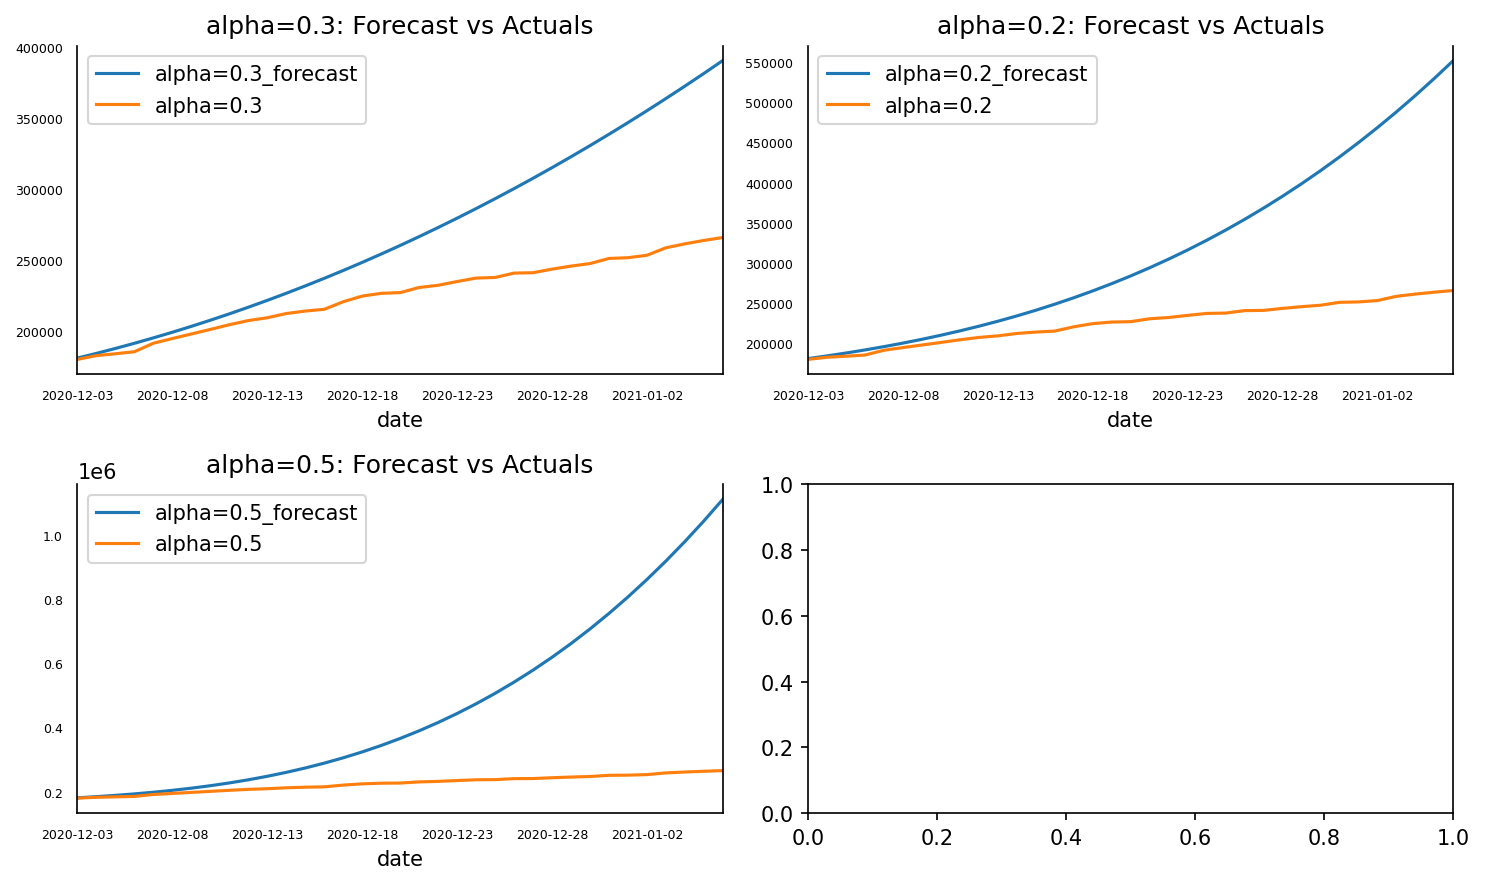

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, dpi=150, figsize=(10,6))
for i, (col,ax) in enumerate(zip(df_Washington_test, axes.flatten())):
    df_Washington_forecast[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_Washington_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

#### **Simple Exponential Smoothing - Moving Window**

##### **Moving Window - 4 weeks**

In [234]:
dur4 = 4*7
iter4 = math.floor(df_Washington.shape[0]-dur4)

In [235]:
rows = []
rows2 = []
pred_rows1 = []
pred_rows2 = []
pred_rows3 = []
for i in range(iter4):
  df4 = df_Washington[i*1:(i*1+dur4+1)]
  df4_train, df4_test = df4[0:-1], df4[-1:]
  #df4_train, df4_test = df_Washington[i*7:(i*7+dur4)], df_Washington[(i*7+dur4):(i*7+dur4+7)]
  df4_diff = takediff(df4, False, True, False)
  df4_train_diff, df4_test_diff = df4_diff[0:-1], df4_diff[-1:]
  model_es_washington = SimpleExpSmoothing(np.asarray(df4_train_diff['Washington']))
  # alpha = 0.3
  fit1_washington = model_es_washington.fit()
  pred1_washington = fit1_washington.forecast(1)
  df_forecast_washington1 = pd.DataFrame(pred1_washington, index=df4_test.index, columns=df_Washington.columns + '_2d')
  df_results_washington1 = invert_transformation2(df4_train, df_forecast_washington1)
  pred_rows1.append(df_results_washington1)
  # alpha = 0.2
  fit2_washington = model_es_washington.fit(smoothing_level=.2)
  pred2_washington = fit2_washington.forecast(1)
  df_forecast_washington2 = pd.DataFrame(pred2_washington, index=df4_test.index, columns=df_Washington.columns + '_2d')
  df_results_washington2 = invert_transformation2(df4_train, df_forecast_washington2)
  pred_rows2.append(df_results_washington2)
  # alpha = 0.5
  fit3_washington = model_es_washington.fit(smoothing_level=.5)
  pred3_washington = fit3_washington.forecast(1)
  df_forecast_washington3 = pd.DataFrame(pred3_washington, index=df4_test.index, columns=df_Washington.columns + '_2d')
  df_results_washington3 = invert_transformation2(df4_train, df_forecast_washington3)
  pred_rows3.append(df_results_washington3)
  # evaluate the forecast
  #rsquared_alpha3 = rsquared(df4_train_diff['Washington'], df4_test_diff['Washington'], df_forecast_washington1['Washington_2d'])
  #rsquared_alpha2 = rsquared(df4_train_diff['Washington'], df4_test_diff['Washington'], df_forecast_washington2['Washington_2d'])
  #rsquared_alpha5 = rsquared(df4_train_diff['Washington'], df4_test_diff['Washington'], df_forecast_washington3['Washington_2d'])
  mape_alpha3 = mean_absolute_percentage_error(df4_test_diff['Washington'], df_forecast_washington1['Washington_2d'])
  mape_alpha2 = mean_absolute_percentage_error(df4_test_diff['Washington'], df_forecast_washington2['Washington_2d'])
  mape_alpha5 = mean_absolute_percentage_error(df4_test_diff['Washington'], df_forecast_washington3['Washington_2d'])
  rows.append([mape_alpha3, mape_alpha2, mape_alpha5])
  mae_alpha3 = mean_absolute_error(df4_test_diff['Washington'], df_forecast_washington1['Washington_2d'])
  mae_alpha2 = mean_absolute_error(df4_test_diff['Washington'], df_forecast_washington2['Washington_2d'])
  mae_alpha5 = mean_absolute_error(df4_test_diff['Washington'], df_forecast_washington3['Washington_2d'])
  rows2.append([mae_alpha3, mae_alpha2, mae_alpha5])
df_dur4_ex_out_mape = pd.DataFrame(rows, columns=['alpha=0.3','alpha=0.2','alpha=0.5'])
df_dur4_ex_out_mae = pd.DataFrame(rows2, columns=['alpha=0.3','alpha=0.2','alpha=0.5'])
df_forecast_ex41 = pd.concat(pred_rows1)[['Washington_forecast']]
df_forecast_ex42 = pd.concat(pred_rows2)[['Washington_forecast']]
df_forecast_ex43 = pd.concat(pred_rows3)[['Washington_forecast']]
df_dur4_ex_out_mape

alpha=0.3   alpha=0.2   alpha=0.5
0           NaN         NaN         NaN
1           NaN         NaN         NaN
2           NaN         NaN         NaN
3           NaN         NaN         NaN
4           NaN         NaN         NaN
..          ...         ...         ...
319  100.000000  129.895375  194.083874
320  100.000000  101.407527   99.016748
321  102.999887  126.998746  172.055758
322  100.000000  110.360767    9.651779
323  100.000000   85.318622   19.276645

[324 rows x 3 columns]

In [236]:
df_dur4_ex_out_mae

alpha=0.3    alpha=0.2    alpha=0.5
0       0.000000     0.000000     0.000000
1       0.000000     0.000000     0.000000
2       0.000000     0.000000     0.000000
3       0.000000     0.000000     0.000000
4       0.000000     0.000000     0.000000
..           ...          ...          ...
319  1184.000000  1537.961242  2297.953070
320  3562.000000  3612.136122  3526.976580
321  2570.877186  3169.888698  4294.511729
322   386.000000   425.992561    37.255866
323   308.000000   262.781355    59.372067

[324 rows x 3 columns]

In [237]:
df_forecast_ex41

Washington_forecast
date                           
2020-02-18             1.000000
2020-02-19             1.000000
2020-02-20             1.000000
2020-02-21             1.000000
2020-02-22             1.000000
...                         ...
2021-01-02        252106.000000
2021-01-03        254995.000000
2021-01-04        263898.877186
2021-01-05        264099.000000
2021-01-06        266098.000000

[324 rows x 1 columns]

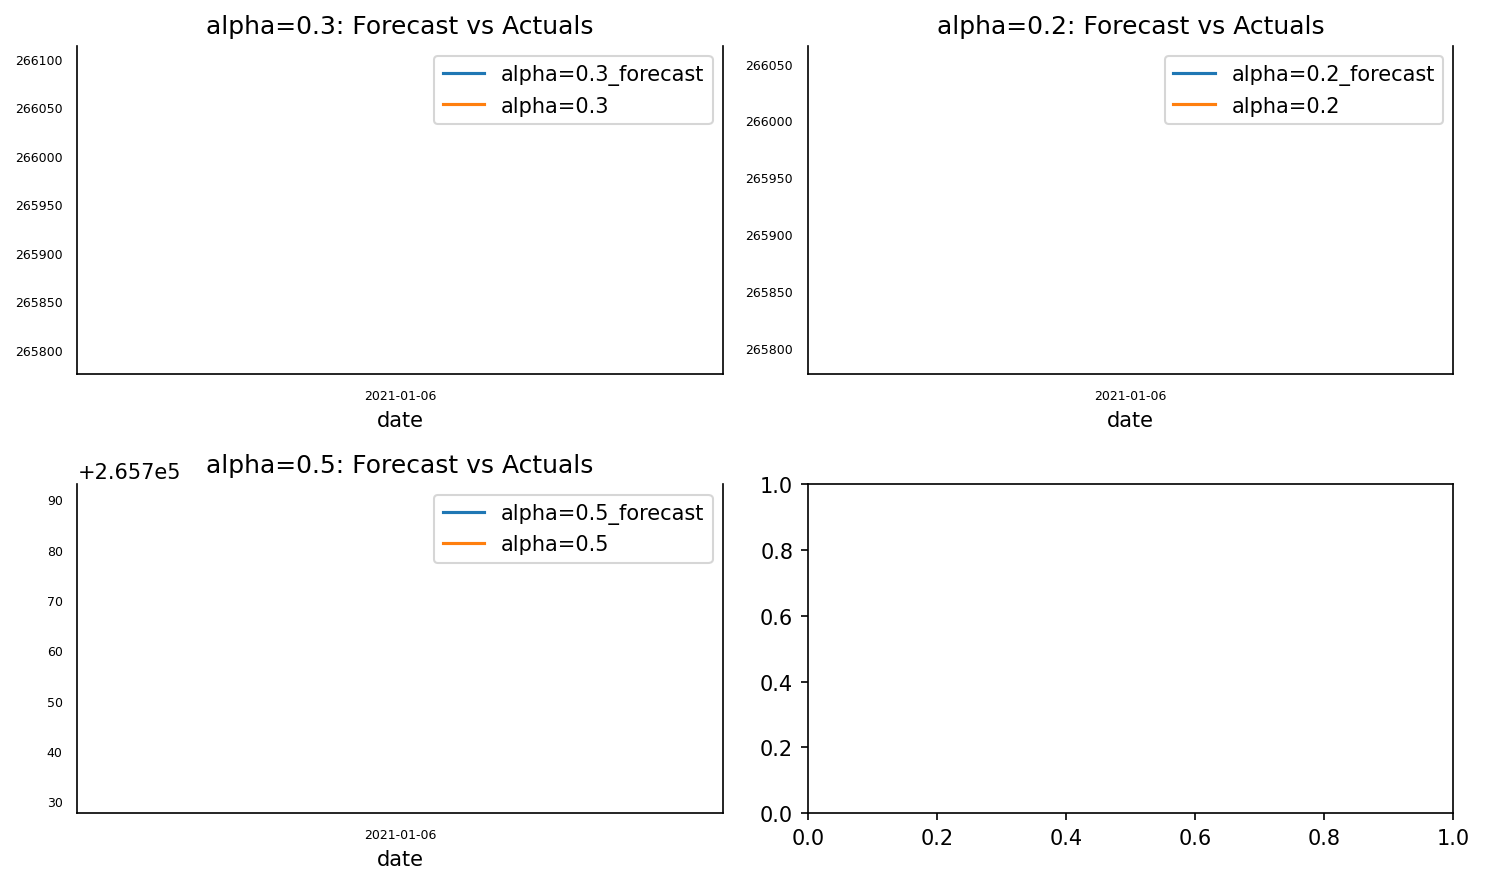

In [238]:
df_Washington_test = df4_test
df_Washington_test['alpha=0.2'] = df_Washington_test['Washington']
df_Washington_test['alpha=0.5'] = df_Washington_test['Washington']
df_Washington_test = df_Washington_test.rename(columns={"Washington": 'alpha=0.3'})

df_Washington_forecast = df_results_washington1.loc[:, ['Washington_forecast']]
df_Washington_forecast['alpha=0.2_forecast'] = df_results_washington2.loc[:, ['Washington_forecast']]
df_Washington_forecast['alpha=0.5_forecast'] = df_results_washington3.loc[:, ['Washington_forecast']]
df_Washington_forecast = df_Washington_forecast.rename(columns={"Washington_forecast": 'alpha=0.3_forecast'})

fig, axes = plt.subplots(nrows=2, ncols=2, dpi=150, figsize=(10,6))
for i, (col,ax) in enumerate(zip(df_Washington_test, axes.flatten())):
    df_Washington_forecast[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_Washington_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

##### **Moving Window - 8 weeks**

In [239]:
dur4 = 8*7
iter4 = math.floor(df_Washington.shape[0]-dur4)

In [240]:
rows = []
rows2 = []
pred_rows1 = []
pred_rows2 = []
pred_rows3 = []
for i in range(iter4):
  df4 = df_Washington[i*1:(i*1+dur4+1)]
  df4_train, df4_test = df4[0:-1], df4[-1:]
  #df4_train, df4_test = df_Washington[i*7:(i*7+dur4)], df_Washington[(i*7+dur4):(i*7+dur4+7)]
  df4_diff = takediff(df4, False, True, False)
  df4_train_diff, df4_test_diff = df4_diff[0:-1], df4_diff[-1:]
  model_es_washington = SimpleExpSmoothing(np.asarray(df4_train_diff['Washington']))
  # alpha = 0.3
  fit1_washington = model_es_washington.fit()
  pred1_washington = fit1_washington.forecast(1)
  df_forecast_washington1 = pd.DataFrame(pred1_washington, index=df4_test.index, columns=df_Washington.columns + '_2d')
  df_results_washington1 = invert_transformation2(df4_train, df_forecast_washington1)
  pred_rows1.append(df_results_washington1)
  # alpha = 0.2
  fit2_washington = model_es_washington.fit(smoothing_level=.2)
  pred2_washington = fit2_washington.forecast(1)
  df_forecast_washington2 = pd.DataFrame(pred2_washington, index=df4_test.index, columns=df_Washington.columns + '_2d')
  df_results_washington2 = invert_transformation2(df4_train, df_forecast_washington2)
  pred_rows2.append(df_results_washington2)
  # alpha = 0.5
  fit3_washington = model_es_washington.fit(smoothing_level=.5)
  pred3_washington = fit3_washington.forecast(1)
  df_forecast_washington3 = pd.DataFrame(pred3_washington, index=df4_test.index, columns=df_Washington.columns + '_2d')
  df_results_washington3 = invert_transformation2(df4_train, df_forecast_washington3)
  pred_rows3.append(df_results_washington3)
  # evaluate the forecast
  mape_alpha3 = mean_absolute_percentage_error(df4_test_diff['Washington'], df_forecast_washington1['Washington_2d'])
  mape_alpha2 = mean_absolute_percentage_error(df4_test_diff['Washington'], df_forecast_washington2['Washington_2d'])
  mape_alpha5 = mean_absolute_percentage_error(df4_test_diff['Washington'], df_forecast_washington3['Washington_2d'])
  rows.append([mape_alpha3, mape_alpha2, mape_alpha5])
  mae_alpha3 = mean_absolute_error(df4_test_diff['Washington'], df_forecast_washington1['Washington_2d'])
  mae_alpha2 = mean_absolute_error(df4_test_diff['Washington'], df_forecast_washington2['Washington_2d'])
  mae_alpha5 = mean_absolute_error(df4_test_diff['Washington'], df_forecast_washington3['Washington_2d'])
  rows2.append([mae_alpha3, mae_alpha2, mae_alpha5])
df_dur8_ex_out_mape = pd.DataFrame(rows, columns=['alpha=0.3','alpha=0.2','alpha=0.5'])
df_dur8_ex_out_mae = pd.DataFrame(rows2, columns=['alpha=0.3','alpha=0.2','alpha=0.5'])
df_forecast_ex81 = pd.concat(pred_rows1)[['Washington_forecast']]
df_forecast_ex82 = pd.concat(pred_rows2)[['Washington_forecast']]
df_forecast_ex83 = pd.concat(pred_rows3)[['Washington_forecast']]
df_dur8_ex_out_mape

alpha=0.3   alpha=0.2   alpha=0.5
0    144.074076  312.471125  510.365887
1     47.222216   87.471125   93.978679
2     97.398590   91.905862   93.000508
3    135.878032  185.535618  272.845334
4     95.654320   83.211455   87.373475
..          ...         ...         ...
291  100.000000  130.048937  194.083876
292  100.000000  101.342665   99.016748
293  102.772059  127.008847  172.055758
294  109.477908  110.392451    9.651778
295  100.000000   85.353287   19.276646

[296 rows x 3 columns]

In [241]:
df_dur8_ex_out_mae

alpha=0.3    alpha=0.2    alpha=0.5
0       7.203704    15.623556    25.518294
1       1.888889     3.498845     3.759147
2      81.814816    77.200924    78.120426
3      35.328288    48.239261    70.939787
4      71.740740    62.408591    65.530107
..           ...          ...          ...
291  1184.000000  1539.779415  2297.953097
292  3562.000000  3609.825731  3526.976549
293  2565.190583  3170.140830  4294.511726
294   422.584723   426.114859    37.255863
295   308.000000   262.888124    59.372069

[296 rows x 3 columns]

In [242]:
df_forecast_ex81

Washington_forecast
date                           
2020-03-17           915.203704
2020-03-18          1024.111111
2020-03-19          1146.185184
2020-03-20          1439.328288
2020-03-21          1583.259260
...                         ...
2021-01-02        252106.000000
2021-01-03        254995.000000
2021-01-04        263893.190583
2021-01-05        264135.584723
2021-01-06        266098.000000

[296 rows x 1 columns]

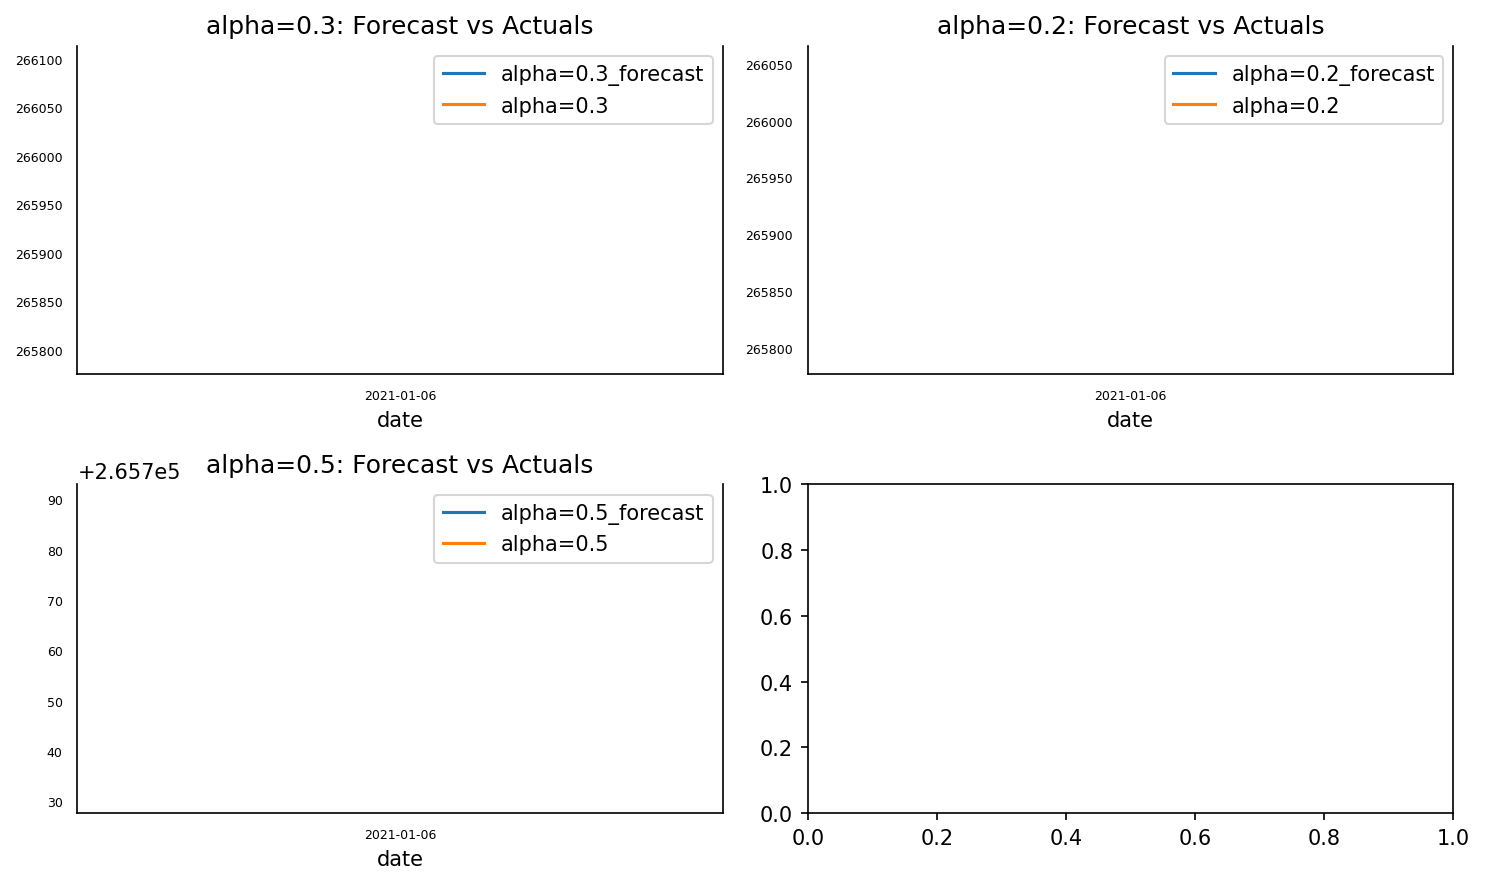

In [243]:
df_Washington_test = df4_test
df_Washington_test['alpha=0.2'] = df_Washington_test['Washington']
df_Washington_test['alpha=0.5'] = df_Washington_test['Washington']
df_Washington_test = df_Washington_test.rename(columns={"Washington": 'alpha=0.3'})

df_Washington_forecast = df_results_washington1.loc[:, ['Washington_forecast']]
df_Washington_forecast['alpha=0.2_forecast'] = df_results_washington2.loc[:, ['Washington_forecast']]
df_Washington_forecast['alpha=0.5_forecast'] = df_results_washington3.loc[:, ['Washington_forecast']]
df_Washington_forecast = df_Washington_forecast.rename(columns={"Washington_forecast": 'alpha=0.3_forecast'})

fig, axes = plt.subplots(nrows=2, ncols=2, dpi=150, figsize=(10,6))
for i, (col,ax) in enumerate(zip(df_Washington_test, axes.flatten())):
    df_Washington_forecast[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_Washington_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

##### **Moving Window - 12 weeks**

In [244]:
dur4 = 12*7
iter4 = math.floor(df_Washington.shape[0]-dur4)

In [245]:
rows = []
rows2 = []
pred_rows1 = []
pred_lw_rows1 = []
pred_up_rows1 = []
pred_rows2 = []
pred_rows3 = []
for i in range(iter4):
  df4 = df_Washington[i*1:(i*1+dur4+1)]
  df4_train, df4_test = df4[0:-1], df4[-1:]
  #df4_train, df4_test = df_Washington[i*7:(i*7+dur4)], df_Washington[(i*7+dur4):(i*7+dur4+7)]
  df4_diff = takediff(df4, False, True, False)
  df4_train_diff, df4_test_diff = df4_diff[0:-1], df4_diff[-1:]
  model_es_washington = SimpleExpSmoothing(np.asarray(df4_train_diff['Washington']))
  # alpha = 0.3
  fit1_washington = model_es_washington.fit()
  pred1_washington = fit1_washington.forecast(1)
  pred1_lw_washington = pred1_washington - 1.96 * np.sqrt(fit1_washington.sse/len(df4_train_diff))
  pred1_up_washington = pred1_washington + 1.96 * np.sqrt(fit1_washington.sse/len(df4_train_diff))
  df_forecast_washington1 = pd.DataFrame(pred1_washington, index=df4_test.index, columns=df_Washington.columns + '_2d')
  df_forecast_lw_washington1 = pd.DataFrame(pred1_lw_washington, index=df4_test.index, columns=df_Washington.columns + '_2d')
  df_forecast_up_washington1 = pd.DataFrame(pred1_up_washington, index=df4_test.index, columns=df_Washington.columns + '_2d')
  df_results_washington1 = invert_transformation2(df4_train, df_forecast_washington1)
  df_results_lw_washington1 = invert_transformation2(df4_train, df_forecast_lw_washington1)
  df_results_up_washington1 = invert_transformation2(df4_train, df_forecast_up_washington1)
  pred_rows1.append(df_results_washington1)
  pred_lw_rows1.append(df_results_lw_washington1)
  pred_up_rows1.append(df_results_up_washington1)
  # alpha = 0.2
  fit2_washington = model_es_washington.fit(smoothing_level=.2)
  pred2_washington = fit2_washington.forecast(1)
  pred2_lw_washington = pred2_washington - 1.96 * np.sqrt(fit2_washington.sse/len(df4_train_diff))
  pred2_up_washington = pred2_washington + 1.96 * np.sqrt(fit2_washington.sse/len(df4_train_diff))
  df_forecast_washington2 = pd.DataFrame(pred2_washington, index=df4_test.index, columns=df_Washington.columns + '_2d')
  df_results_washington2 = invert_transformation2(df4_train, df_forecast_washington2)
  pred_rows2.append(df_results_washington2)
  # alpha = 0.5
  fit3_washington = model_es_washington.fit(smoothing_level=.5)
  pred3_washington = fit3_washington.forecast(1)
  pred3_lw_washington = pred3_washington - 1.96 * np.sqrt(fit3_washington.sse/len(df4_train_diff))
  pred3_up_washington = pred3_washington + 1.96 * np.sqrt(fit3_washington.sse/len(df4_train_diff))
  df_forecast_washington3 = pd.DataFrame(pred3_washington, index=df4_test.index, columns=df_Washington.columns + '_2d')
  df_results_washington3 = invert_transformation2(df4_train, df_forecast_washington3)
  pred_rows3.append(df_results_washington3)
  # evaluate the forecast
  mape_alpha3 = mean_absolute_percentage_error(df4_test_diff['Washington'], df_forecast_washington1['Washington_2d'])
  mape_alpha2 = mean_absolute_percentage_error(df4_test_diff['Washington'], df_forecast_washington2['Washington_2d'])
  mape_alpha5 = mean_absolute_percentage_error(df4_test_diff['Washington'], df_forecast_washington3['Washington_2d'])
  rows.append([mape_alpha3, mape_alpha2, mape_alpha5])
  mae_alpha3 = mean_absolute_error(df4_test_diff['Washington'], df_forecast_washington1['Washington_2d'])
  mae_alpha2 = mean_absolute_error(df4_test_diff['Washington'], df_forecast_washington2['Washington_2d'])
  mae_alpha5 = mean_absolute_error(df4_test_diff['Washington'], df_forecast_washington3['Washington_2d'])
  rows2.append([mae_alpha3, mae_alpha2, mae_alpha5])
df_dur12_ex_out_mape = pd.DataFrame(rows, columns=['alpha=0.3','alpha=0.2','alpha=0.5'])
df_dur12_ex_out_mae = pd.DataFrame(rows2, columns=['alpha=0.3','alpha=0.2','alpha=0.5'])
df_forecast_ex121 = pd.concat(pred_rows1)[['Washington_forecast']]
df_forecast_lw_ex121 = pd.concat(pred_lw_rows1)[['Washington_forecast']]
df_forecast_up_ex121 = pd.concat(pred_up_rows1)[['Washington_forecast']]
df_forecast_ex122 = pd.concat(pred_rows2)[['Washington_forecast']]
df_forecast_ex123 = pd.concat(pred_rows3)[['Washington_forecast']]
df_dur12_ex_out_mape

alpha=0.3   alpha=0.2   alpha=0.5
0     94.767736  241.459560  320.557760
1    102.898551   58.142071   72.918184
2     99.584799  113.227805  115.714418
3    106.081287  135.034051  256.771182
4     94.935533   91.638290   70.431676
..          ...         ...         ...
263   99.775490  130.049036  194.083876
264   99.669078  101.342630   99.016748
265  102.062609  127.008831  172.055758
266  106.363649  110.391798    9.651778
267  106.396763   85.353855   19.276646

[268 rows x 3 columns]

In [246]:
df_dur12_ex_out_mae

alpha=0.3    alpha=0.2    alpha=0.5
0      29.377998    74.852464    99.372906
1      71.000000    40.118029    50.313547
2     277.841590   315.905577   322.843226
3      79.560965   101.275539   192.578387
4      68.353584    65.979569    50.710807
..           ...          ...          ...
263  1181.341803  1539.780582  2297.953097
264  3550.212574  3609.824467  3526.976549
265  2547.482710  3170.140426  4294.511726
266   410.563687   426.112341    37.255863
267   327.702030   262.889873    59.372069

[268 rows x 3 columns]

In [247]:
df_forecast_ex121

Washington_forecast
date                           
2020-04-14         10681.622002
2020-04-15         10877.000000
2020-04-16         10902.158410
2020-04-17         11558.560965
2020-04-18         11781.646416
...                         ...
2021-01-02        252108.658197
2021-01-03        255006.787426
2021-01-04        263875.482710
2021-01-05        264123.563687
2021-01-06        266117.702030

[268 rows x 1 columns]

###### **Visualization with CI**

In [ ]:
index4 = df_forecast_ex121.index
valuemean = df_forecast_ex121['Washington_forecast']
valuelw = df_forecast_lw_ex121['Washington_forecast']
valueup = df_forecast_up_ex121['Washington_forecast']
valuet = df_cases_5state.loc[index4,'Washington']
df_vis_washingtonmean = pd.DataFrame(list(zip(index4,valuemean)), columns=['date','value'])
df_vis_washingtonlw = pd.DataFrame(list(zip(index4,valuelw)), columns=['date','value'])
df_vis_washingtonup = pd.DataFrame(list(zip(index4,valueup)), columns=['date','value'])
df_vis_washingtont = pd.DataFrame(list(zip(index4,valuet)), columns=['date','value'])
df_vis_washingtonmean['variable'] = 'Forecast Value'
df_vis_washingtonlw['variable'] = 'Lower Limit'
df_vis_washingtonup['variable'] = 'Upper Limit'
df_vis_washingtont['variable'] = 'true'

In [ ]:
df_vis_washington_var4 = pd.concat([df_vis_washingtonmean, df_vis_washingtonlw, df_vis_washingtonup])
fig = px.line(df_vis_washington_var4, x="date", y="value", color='variable', 
              title="Washington (Exponential Smoothing) 12 weeks with 95% prediction interval")
fig.show()

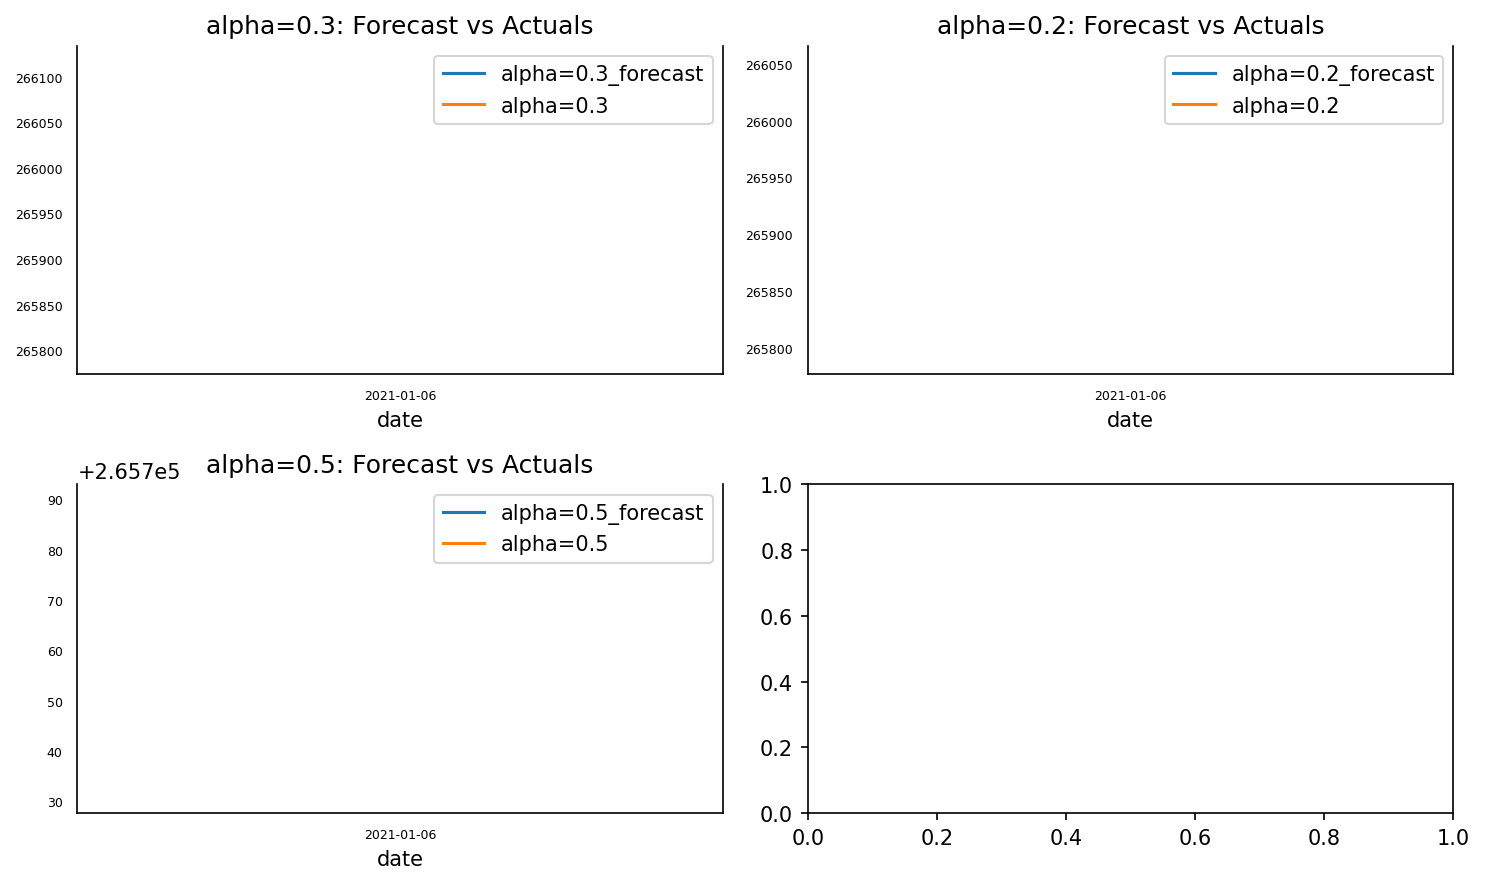

In [ ]:
df_Washington_test = df4_test
df_Washington_test['alpha=0.2'] = df_Washington_test['Washington']
df_Washington_test['alpha=0.5'] = df_Washington_test['Washington']
df_Washington_test = df_Washington_test.rename(columns={"Washington": 'alpha=0.3'})

df_Washington_forecast = df_results_washington1.loc[:, ['Washington_forecast']]
df_Washington_forecast['alpha=0.2_forecast'] = df_results_washington2.loc[:, ['Washington_forecast']]
df_Washington_forecast['alpha=0.5_forecast'] = df_results_washington3.loc[:, ['Washington_forecast']]
df_Washington_forecast = df_Washington_forecast.rename(columns={"Washington_forecast": 'alpha=0.3_forecast'})

fig, axes = plt.subplots(nrows=2, ncols=2, dpi=150, figsize=(10,6))
for i, (col,ax) in enumerate(zip(df_Washington_test, axes.flatten())):
    df_Washington_forecast[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_Washington_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

##### **Visualization**

###### **4 weeks**

In [ ]:
index4 = df_forecast_ex41.index
valuea3 = df_forecast_ex41['Washington_forecast']
valuea2 = df_forecast_ex42['Washington_forecast']
valuea5 = df_forecast_ex43['Washington_forecast']
valuet = df_Washington.loc[index4,'Washington']
df_vis_washingtona3 = pd.DataFrame(list(zip(index4,valuea3)), columns=['date','value'])
df_vis_washingtona2 = pd.DataFrame(list(zip(index4,valuea2)), columns=['date','value'])
df_vis_washingtona5 = pd.DataFrame(list(zip(index4,valuea5)), columns=['date','value'])
df_vis_washingtont = pd.DataFrame(list(zip(index4,valuet)), columns=['date','value'])
df_vis_washingtona3['variable'] = 'alpha = 0.3'
df_vis_washingtona2['variable'] = 'alpha = 0.2'
df_vis_washingtona5['variable'] = 'alpha = 0.5'
df_vis_washingtont['variable'] = 'true'

In [ ]:
df_vis_washington_ex4 = pd.concat([df_vis_washingtona3, df_vis_washingtona2, df_vis_washingtona5, df_vis_washingtont])
df_vis_washington_ex4

date     value     variable
0    2020-02-18       1.0  alpha = 0.3
1    2020-02-19       1.0  alpha = 0.3
2    2020-02-20       1.0  alpha = 0.3
3    2020-02-21       1.0  alpha = 0.3
4    2020-02-22       1.0  alpha = 0.3
..          ...       ...          ...
319  2021-01-02  253290.0         true
320  2021-01-03  258557.0         true
321  2021-01-04  261328.0         true
322  2021-01-05  263713.0         true
323  2021-01-06  265790.0         true

[1296 rows x 3 columns]

In [ ]:
fig = px.line(df_vis_washington_ex4, x="date", y="value", color='variable', 
              title="Washington (Simple Exponential Smoothing) 4 weeks")
fig.show()

###### **8 weeks**

In [ ]:
index8 = df_forecast_ex81.index
valuea3 = df_forecast_ex81['Washington_forecast']
valuea2 = df_forecast_ex82['Washington_forecast']
valuea5 = df_forecast_ex83['Washington_forecast']
valuet = df_Washington.loc[index8,'Washington']
df_vis_washingtona3 = pd.DataFrame(list(zip(index8,valuea3)), columns=['date','value'])
df_vis_washingtona2 = pd.DataFrame(list(zip(index8,valuea2)), columns=['date','value'])
df_vis_washingtona5 = pd.DataFrame(list(zip(index8,valuea5)), columns=['date','value'])
df_vis_washingtont = pd.DataFrame(list(zip(index8,valuet)), columns=['date','value'])
df_vis_washingtona3['variable'] = 'alpha = 0.3'
df_vis_washingtona2['variable'] = 'alpha = 0.2'
df_vis_washingtona5['variable'] = 'alpha = 0.5'
df_vis_washingtont['variable'] = 'true'

In [ ]:
df_vis_washington_ex8 = pd.concat([df_vis_washingtona3, df_vis_washingtona2, df_vis_washingtona5, df_vis_washingtont])
df_vis_washington_ex8

date          value     variable
0    2020-03-17     915.203704  alpha = 0.3
1    2020-03-18    1024.111111  alpha = 0.3
2    2020-03-19    1146.185184  alpha = 0.3
3    2020-03-20    1439.328288  alpha = 0.3
4    2020-03-21    1583.259260  alpha = 0.3
..          ...            ...          ...
291  2021-01-02  253290.000000         true
292  2021-01-03  258557.000000         true
293  2021-01-04  261328.000000         true
294  2021-01-05  263713.000000         true
295  2021-01-06  265790.000000         true

[1184 rows x 3 columns]

In [ ]:
fig = px.line(df_vis_washington_ex8, x="date", y="value", color='variable', 
              title="Washington (Simple Exponential Smoothing) 8 weeks")
fig.show()

###### **12 weeks**

In [ ]:
index12 = df_forecast_ex121.index
valuea3 = df_forecast_ex121['Washington_forecast']
valuea2 = df_forecast_ex122['Washington_forecast']
valuea5 = df_forecast_ex123['Washington_forecast']
valuet = df_Washington.loc[index12,'Washington']
df_vis_washingtona3 = pd.DataFrame(list(zip(index12,valuea3)), columns=['date','value'])
df_vis_washingtona2 = pd.DataFrame(list(zip(index12,valuea2)), columns=['date','value'])
df_vis_washingtona5 = pd.DataFrame(list(zip(index12,valuea5)), columns=['date','value'])
df_vis_washingtont = pd.DataFrame(list(zip(index12,valuet)), columns=['date','value'])
df_vis_washingtona3['variable'] = 'alpha = 0.3'
df_vis_washingtona2['variable'] = 'alpha = 0.2'
df_vis_washingtona5['variable'] = 'alpha = 0.5'
df_vis_washingtont['variable'] = 'true'

In [ ]:
df_vis_washington_ex12 = pd.concat([df_vis_washingtona3, df_vis_washingtona2, df_vis_washingtona5, df_vis_washingtont])
df_vis_washington_ex12

date          value     variable
0    2020-04-14   10681.622002  alpha = 0.3
1    2020-04-15   10877.000000  alpha = 0.3
2    2020-04-16   10902.158410  alpha = 0.3
3    2020-04-17   11558.560965  alpha = 0.3
4    2020-04-18   11781.646416  alpha = 0.3
..          ...            ...          ...
263  2021-01-02  253290.000000         true
264  2021-01-03  258557.000000         true
265  2021-01-04  261328.000000         true
266  2021-01-05  263713.000000         true
267  2021-01-06  265790.000000         true

[1072 rows x 3 columns]

In [ ]:
fig = px.line(df_vis_washington_ex12, x="date", y="value", color='variable', 
              title="Washington (Simple Exponential Smoothing) 12 weeks")
fig.show()

#### **Holt's Exponential Smoothing**

In [ ]:
model_es_washington_holt = Holt(np.asarray(df_Washington_train_3diff['Washington']))

In [ ]:
fit1_washington = model_es_washington_holt.fit(smoothing_level=0.3, smoothing_slope=0.05)
pred1_washington = fit1_washington.forecast(nobs)
df_forecast_washington1 = pd.DataFrame(pred1_washington, index=df_cases_5state.index[-nobs:], columns=df_Washington_train.columns + '_3d')

df_results_washington1 = invert_transformation(df_Washington_train, df_forecast_washington1)
df_results_washington1.loc[:, ['Washington_forecast']]

In [ ]:
fit2_washington = model_es_washington_holt.fit(optimized=True)
pred2_washington = fit2_washington.forecast(nobs)
df_forecast_washington2 = pd.DataFrame(pred2_washington, index=df_cases_5state.index[-nobs:], columns=df_Washington_train.columns + '_3d')

df_results_washington2 = invert_transformation(df_Washington_train, df_forecast_washington2)
df_results_washington2.loc[:, ['Washington_forecast']]

{'damping_slope': nan,
 'initial_level': 7.984082830450749e-09,
 'initial_seasons': array([], dtype=float64),
 'initial_slope': 0.0047576501690927515,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 1.1182262119313774e-08,
 'smoothing_seasonal': nan,
 'smoothing_slope': 0.0,
 'use_boxcox': False}

In [ ]:
fit3_washington = model_es_washington_holt.fit(smoothing_level=.3, smoothing_slope=0.2)
pred3_washington = fit3_washington.forecast(nobs)
df_forecast_washington3 = pd.DataFrame(pred3_washington, index=df_cases_5state.index[-nobs:], columns=df_Washington_train.columns + '_3d')

df_results_washington3 = invert_transformation(df_Washington_train, df_forecast_washington3)
df_results_washington3.loc[:, ['Washington_forecast']]

Washington_forecast
date                           
2020-12-03        181092.488704
2020-12-04        184501.323594
2020-12-05        188201.730934
2020-12-06        192244.305763
2020-12-07        196684.011903
2020-12-08        201580.181953
2020-12-09        206996.517290
2020-12-10        213001.088074
2020-12-11        219666.333240
2020-12-12        227069.060504
2020-12-13        235290.446362
2020-12-14        244416.036087
2020-12-15        254535.743733
2020-12-16        265743.852132
2020-12-17        278139.012895
2020-12-18        291824.246414
2020-12-19        306906.941856
2020-12-20        323498.857172
2020-12-21        341716.119089
2020-12-22        361679.223115
2020-12-23        383513.033534
2020-12-24        407346.783413
2020-12-25        433314.074596
2020-12-26        461552.877706
2020-12-27        492205.532146
2020-12-28        525418.746097
2020-12-29        561343.596520
2020-12-30        600135.529155
2020-12-31        641954.358522
2021-01-01        686964.267917
2021-01-02        735333.809419
2021-01-03        787235.903884
2021-01-04        842847.840946
2021-01-05        902351.279022
2021-01-06        965932.245304

In [ ]:
df_Washington_test = df_cases_5state_test[['Washington']]
df_Washington_test['fit2'] = df_Washington_test['Washington']
df_Washington_test['fit3'] = df_Washington_test['Washington']
df_Washington_test = df_Washington_test.rename(columns={"Washington": 'fit1'})

df_Washington_forecast = df_results_washington1.loc[:, ['Washington_forecast']]
df_Washington_forecast['fit2_forecast'] = df_results_washington2.loc[:, ['Washington_forecast']]
df_Washington_forecast['fit3_forecast'] = df_results_washington3.loc[:, ['Washington_forecast']]
df_Washington_forecast = df_Washington_forecast.rename(columns={"Washington_forecast": 'fit1_forecast'})

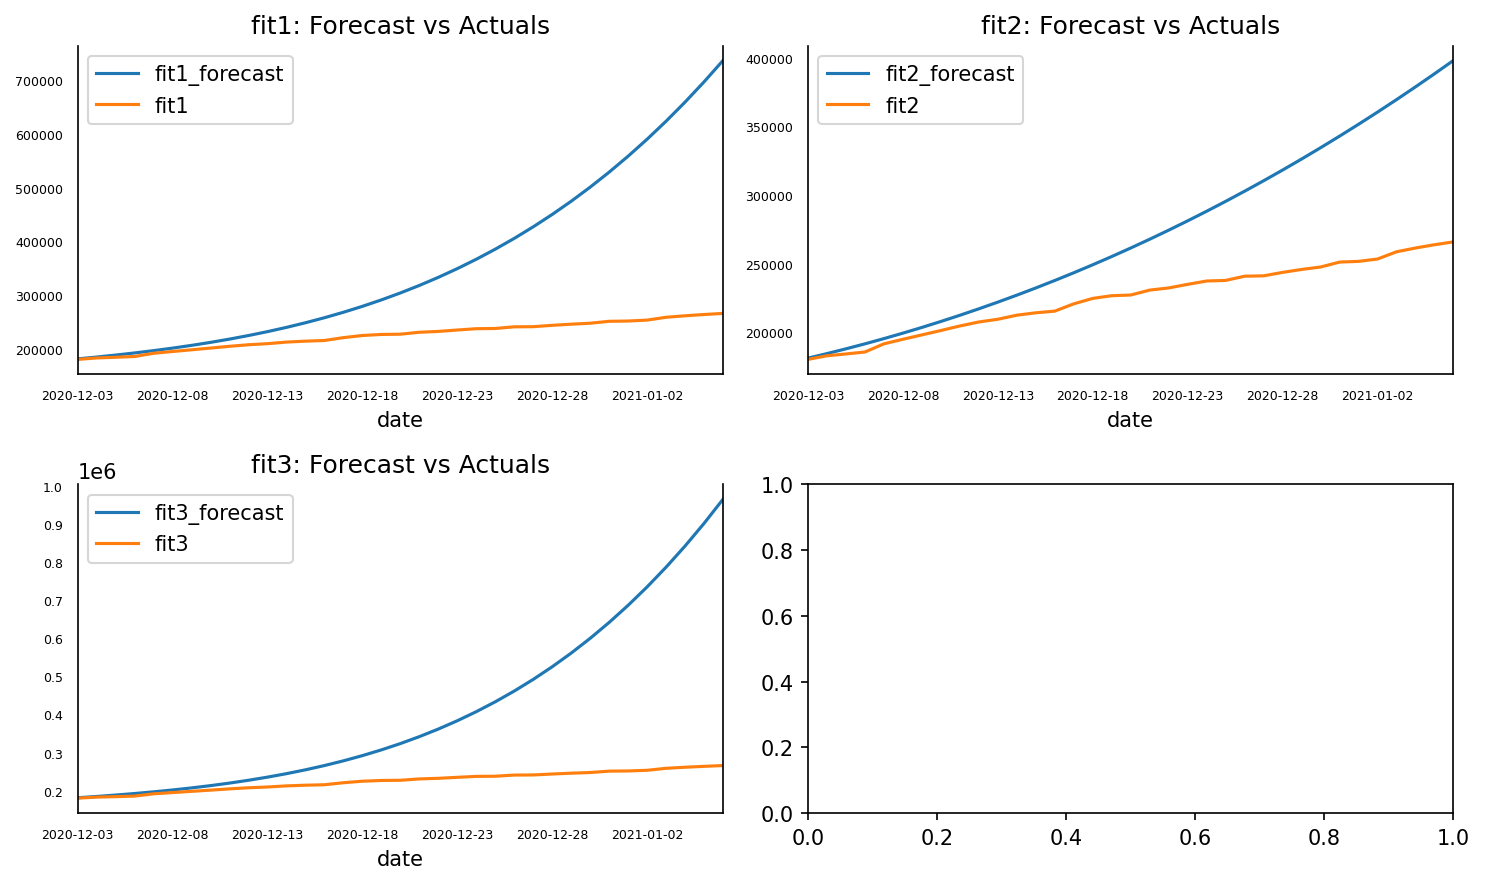

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, dpi=150, figsize=(10,6))
for i, (col,ax) in enumerate(zip(df_Washington_test, axes.flatten())):
    df_Washington_forecast[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_Washington_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

#### **Holt's Exponential Smoothing - Moving Window**

##### **Moving Window - 12 weeks**

In [248]:
dur4 = 12*7
iter4 = math.floor(df_Washington.shape[0]-dur4)

In [249]:
rows = []
rows2 = []
pred_rows1 = []
pred_rows2 = []
pred_rows3 = []
for i in range(iter4):
  df4 = df_Washington[i*1:(i*1+dur4+1)]
  df4_train, df4_test = df4[0:-1], df4[-1:]
  #df4_train, df4_test = df_Washington[i*7:(i*7+dur4)], df_Washington[(i*7+dur4):(i*7+dur4+7)]
  df4_diff = takediff(df4, False, True, False)
  df4_train_diff, df4_test_diff = df4_diff[0:-1], df4_diff[-1:]
  model_es_washington_holt = Holt(np.asarray(df4_train_diff['Washington']))
  # fit1
  fit1_washington = model_es_washington_holt.fit(smoothing_level=0.3, smoothing_slope=0.05)
  pred1_washington = fit1_washington.forecast(1)
  df_forecast_washington1 = pd.DataFrame(pred1_washington, index=df4_test.index, columns=df_Washington.columns + '_2d')
  df_results_washington1 = invert_transformation2(df4_train, df_forecast_washington1)
  pred_rows1.append(df_results_washington1)
  # fit2
  fit2_washington = model_es_washington_holt.fit(optimized=True)
  pred2_washington = fit2_washington.forecast(1)
  df_forecast_washington2 = pd.DataFrame(pred2_washington, index=df4_test.index, columns=df_Washington.columns + '_2d')
  df_results_washington2 = invert_transformation2(df4_train, df_forecast_washington2)
  pred_rows2.append(df_results_washington2)
  # fit3
  fit3_washington = model_es_washington_holt.fit(smoothing_level=.3, smoothing_slope=0.2)
  pred3_washington = fit3_washington.forecast(1)
  df_forecast_washington3 = pd.DataFrame(pred3_washington, index=df4_test.index, columns=df_Washington.columns + '_2d')
  df_results_washington3 = invert_transformation2(df4_train, df_forecast_washington3)
  pred_rows3.append(df_results_washington3)
  # evaluate the forecast
  mape_alpha3 = mean_absolute_percentage_error(df4_test_diff['Washington'], df_forecast_washington1['Washington_2d'])
  mape_alpha2 = mean_absolute_percentage_error(df4_test_diff['Washington'], df_forecast_washington2['Washington_2d'])
  mape_alpha5 = mean_absolute_percentage_error(df4_test_diff['Washington'], df_forecast_washington3['Washington_2d'])
  rows.append([mape_alpha3, mape_alpha2, mape_alpha5])
  mae_alpha3 = mean_absolute_error(df4_test_diff['Washington'], df_forecast_washington1['Washington_2d'])
  mae_alpha2 = mean_absolute_error(df4_test_diff['Washington'], df_forecast_washington2['Washington_2d'])
  mae_alpha5 = mean_absolute_error(df4_test_diff['Washington'], df_forecast_washington3['Washington_2d'])
  rows2.append([mae_alpha3, mae_alpha2, mae_alpha5])
df_dur12_holt_out_mape = pd.DataFrame(rows, columns=['fit1','fit2','fit3'])
df_dur12_holt_out_mae = pd.DataFrame(rows2, columns=['fit1','fit2','fit3'])
df_forecast_holt121 = pd.concat(pred_rows1)[['Washington_forecast']]
df_forecast_holt122 = pd.concat(pred_rows2)[['Washington_forecast']]
df_forecast_holt123 = pd.concat(pred_rows3)[['Washington_forecast']]
df_dur12_holt_out_mape

fit1        fit2        fit3
0    305.874770   79.712798  351.540713
1     46.257997  110.667589   31.456545
2    117.506911   97.887680  120.472917
3    169.658184  111.940154  180.760811
4     79.315408   91.796445   60.250826
..          ...         ...         ...
263  148.845857  119.289278  148.325135
264  101.418933  100.802761  101.310411
265  143.530854  124.462269  150.123744
266  102.842365  113.170484  130.388382
267   62.752185  102.414448   76.119665

[268 rows x 3 columns]

In [250]:
df_dur12_holt_out_mae

fit1         fit2         fit3
0      94.821179    24.710967   108.977621
1      31.918018    76.360636    21.705016
2     327.844281   273.106628   336.119439
3     127.243638    83.955116   135.570609
4      57.107093    66.093441    43.380595
..           ...          ...          ...
263  1762.334944  1412.385051  1756.169595
264  3612.542409  3590.594353  3608.676834
265  3582.530127  3106.578241  3747.088660
266   396.971528   436.838066   503.299156
267   193.276730   315.436501   234.448568

[268 rows x 3 columns]

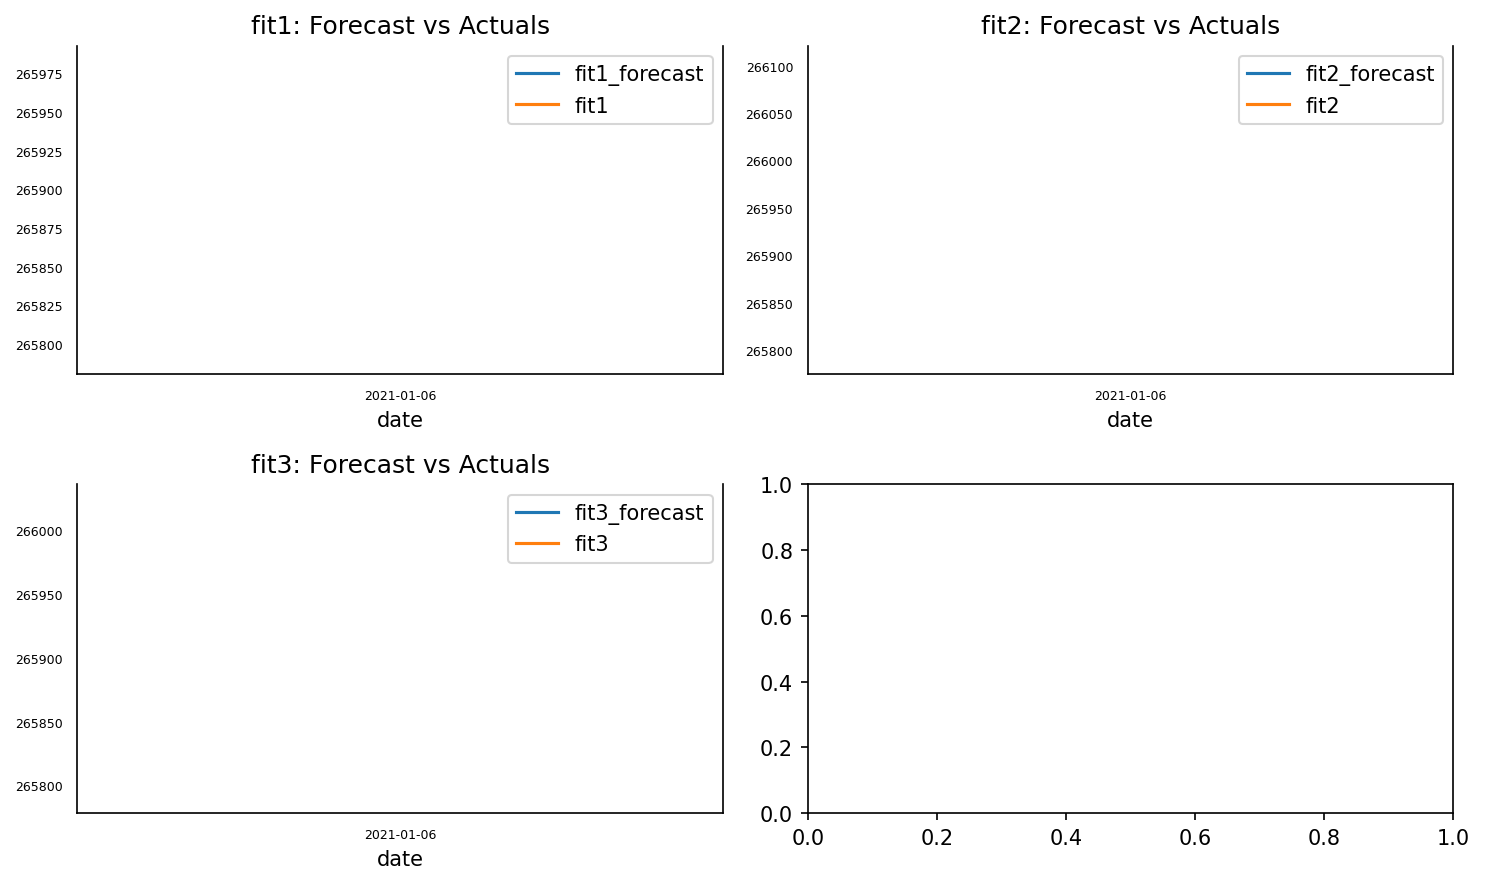

In [251]:
df_Washington_test = df4_test
df_Washington_test['fit2'] = df_Washington_test['Washington']
df_Washington_test['fit3'] = df_Washington_test['Washington']
df_Washington_test = df_Washington_test.rename(columns={"Washington": 'fit1'})

df_Washington_forecast = df_results_washington1.loc[:, ['Washington_forecast']]
df_Washington_forecast['fit2_forecast'] = df_results_washington2.loc[:, ['Washington_forecast']]
df_Washington_forecast['fit3_forecast'] = df_results_washington3.loc[:, ['Washington_forecast']]
df_Washington_forecast = df_Washington_forecast.rename(columns={"Washington_forecast": 'fit1_forecast'})

fig, axes = plt.subplots(nrows=2, ncols=2, dpi=150, figsize=(10,6))
for i, (col,ax) in enumerate(zip(df_Washington_test, axes.flatten())):
    df_Washington_forecast[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_Washington_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

##### **Visualization**

###### **12 weeks**

In [ ]:
index12 = df_forecast_holt121.index
valuefit1 = df_forecast_holt121['Washington_forecast']
valuefit2 = df_forecast_holt122['Washington_forecast']
valuefit3 = df_forecast_holt123['Washington_forecast']
valuet = df_Washington.loc[index12,'Washington']
df_vis_washingtonfit1 = pd.DataFrame(list(zip(index12,valuefit1)), columns=['date','value'])
df_vis_washingtonfit2 = pd.DataFrame(list(zip(index12,valuefit2)), columns=['date','value'])
df_vis_washingtonfit3 = pd.DataFrame(list(zip(index12,valuefit3)), columns=['date','value'])
df_vis_washingtont = pd.DataFrame(list(zip(index12,valuet)), columns=['date','value'])
df_vis_washingtonfit1['variable'] = 'fit1'
df_vis_washingtonfit2['variable'] = 'fit2'
df_vis_washingtonfit3['variable'] = 'fit3'
df_vis_washingtont['variable'] = 'true'

In [ ]:
df_vis_washington_holt12 = pd.concat([df_vis_washingtonfit1, df_vis_washingtonfit2, df_vis_washingtonfit3, df_vis_washingtont])
df_vis_washington_holt12

date          value variable
0    2020-04-14   10616.178821     fit1
1    2020-04-15   10837.918018     fit1
2    2020-04-16   10852.155719     fit1
3    2020-04-17   11606.243638     fit1
4    2020-04-18   11792.892907     fit1
..          ...            ...      ...
263  2021-01-02  253290.000000     true
264  2021-01-03  258557.000000     true
265  2021-01-04  261328.000000     true
266  2021-01-05  263713.000000     true
267  2021-01-06  265790.000000     true

[1072 rows x 3 columns]

In [ ]:
fig = px.line(df_vis_washington_holt12, x="date", y="value", color='variable', 
              title="Washington (Holt Exponential Smoothing) 12 weeks")
fig.show()

###### **Other Plots**

In [ ]:
index12 = df_forecast_var12.index
valuet = df_Washington.loc[index12,'Washington']
value12 = df_forecast_var12.loc[index12, 'Washington_forecast']
valuea3 = df_forecast_ex121.loc[index12, 'Washington_forecast']
valuefit2 = df_forecast_holt122.loc[index12, 'Washington_forecast']
df_vis_washingtonvar = pd.DataFrame(list(zip(index12,value12)), columns=['date','value'])
df_vis_washingtonsex = pd.DataFrame(list(zip(index12,valuea3)), columns=['date','value'])
df_vis_washingtonholt = pd.DataFrame(list(zip(index12,valuefit2)), columns=['date','value'])
df_vis_washingtont = pd.DataFrame(list(zip(index12,valuet)), columns=['date','value'])
df_vis_washingtonvar['variable'] = 'VAR'
df_vis_washingtonsex['variable'] = 'Simple Exponential Smoothing'
df_vis_washingtonholt['variable'] = "Holt's Exponential Smoothing"
df_vis_washingtont['variable'] = 'true'

In [ ]:
df_vis_washington_comp = pd.concat([df_vis_washingtonvar, df_vis_washingtonsex, df_vis_washingtonholt, df_vis_washingtont])
df_vis_washington_comp

date          value variable
0    2020-05-25   21092.103674      VAR
1    2020-05-26   21717.166058      VAR
2    2020-05-27   21738.979347      VAR
3    2020-05-28   22224.329332      VAR
4    2020-05-29   22458.451521      VAR
..          ...            ...      ...
222  2021-01-02  253290.000000     true
223  2021-01-03  258557.000000     true
224  2021-01-04  261328.000000     true
225  2021-01-05  263713.000000     true
226  2021-01-06  265790.000000     true

[908 rows x 3 columns]

In [ ]:
fig = px.line(df_vis_washington_comp, x="date", y="value", color='variable', 
              title="Washington (Comparison of Different Method)")
fig.show()

#### **Natural Cubic Spline**

In [253]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline


def get_natural_cubic_spline_model(x, y, minval=None, maxval=None, n_knots=None, knots=None):
    """
    Get a natural cubic spline model for the data.

    For the knots, give (a) `knots` (as an array) or (b) minval, maxval and n_knots.

    If the knots are not directly specified, the resulting knots are equally
    space within the *interior* of (max, min).  That is, the endpoints are
    *not* included as knots.

    Parameters
    ----------
    x: np.array of float
        The input data
    y: np.array of float
        The outpur data
    minval: float 
        Minimum of interval containing the knots.
    maxval: float 
        Maximum of the interval containing the knots.
    n_knots: positive integer 
        The number of knots to create.
    knots: array or list of floats 
        The knots.

    Returns
    --------
    model: a model object
        The returned model will have following method:
        - predict(x):
            x is a numpy array. This will return the predicted y-values.
    """

    if knots:
        spline = NaturalCubicSpline(knots=knots)
    else:
        spline = NaturalCubicSpline(max=maxval, min=minval, n_knots=n_knots)

    p = Pipeline([
        ('nat_cubic', spline),
        ('regression', LinearRegression(fit_intercept=True))
    ])

    p.fit(x, y)

    return p


class AbstractSpline(BaseEstimator, TransformerMixin):
    """Base class for all spline basis expansions."""

    def __init__(self, max=None, min=None, n_knots=None, n_params=None, knots=None):
        if knots is None:
            if not n_knots:
                n_knots = self._compute_n_knots(n_params)
            knots = np.linspace(min, max, num=(n_knots + 2))[1:-1]
            max, min = np.max(knots), np.min(knots)
        self.knots = np.asarray(knots)

    @property
    def n_knots(self):
        return len(self.knots)

    def fit(self, *args, **kwargs):
        return self


class NaturalCubicSpline(AbstractSpline):
    """Apply a natural cubic basis expansion to an array.
    The features created with this basis expansion can be used to fit a
    piecewise cubic function under the constraint that the fitted curve is
    linear *outside* the range of the knots..  The fitted curve is continuously
    differentiable to the second order at all of the knots.
    This transformer can be created in two ways:
      - By specifying the maximum, minimum, and number of knots.
      - By specifying the cutpoints directly.  

    If the knots are not directly specified, the resulting knots are equally
    space within the *interior* of (max, min).  That is, the endpoints are
    *not* included as knots.
    Parameters
    ----------
    min: float 
        Minimum of interval containing the knots.
    max: float 
        Maximum of the interval containing the knots.
    n_knots: positive integer 
        The number of knots to create.
    knots: array or list of floats 
        The knots.
    """

    def _compute_n_knots(self, n_params):
        return n_params

    @property
    def n_params(self):
        return self.n_knots - 1

    def transform(self, X, **transform_params):
        X_spl = self._transform_array(X)
        if isinstance(X, pd.Series):
            col_names = self._make_names(X)
            X_spl = pd.DataFrame(X_spl, columns=col_names, index=X.index)
        return X_spl

    def _make_names(self, X):
        first_name = "{}_spline_linear".format(X.name)
        rest_names = ["{}_spline_{}".format(X.name, idx)
                      for idx in range(self.n_knots - 2)]
        return [first_name] + rest_names

    def _transform_array(self, X, **transform_params):
        X = X.squeeze()
        try:
            X_spl = np.zeros((X.shape[0], self.n_knots - 1))
        except IndexError: # For arrays with only one element
            X_spl = np.zeros((1, self.n_knots - 1))
        X_spl[:, 0] = X.squeeze()

        def d(knot_idx, x):
            def ppart(t): return np.maximum(0, t)

            def cube(t): return t*t*t
            numerator = (cube(ppart(x - self.knots[knot_idx]))
                         - cube(ppart(x - self.knots[self.n_knots - 1])))
            denominator = self.knots[self.n_knots - 1] - self.knots[knot_idx]
            return numerator / denominator

        for i in range(0, self.n_knots - 2):
            X_spl[:, i+1] = (d(i, X) - d(self.n_knots - 2, X)).squeeze()
        return X_spl

##### **Moving Window - 4 weeks**

In [254]:
dur4 = 4*7
iter4 = math.floor(df_Washington.shape[0]-dur4)

In [255]:
rows = []
rows2 = []
pred_rows1 = []
for i in range(iter4):
  df4 = df_Washington[i*1:(i*1+dur4+1)]
  df4_train, df4_test = df4[0:-1], df4[-1:]
  df4_diff = takediff(df4, False, False, True)
  df4_train_diff, df4_test_diff = df4_diff[0:-1], df4_diff[-1:]
  y_train = np.asarray(df4_train_diff['Washington'])
  y_test = np.asarray(df4_test_diff['Washington'])
  X_train = np.arange(1,len(y_train)+1)
  X_test = np.asarray(int(len(y_train)+2))
  model_ncs = get_natural_cubic_spline_model(X_train, y_train, minval=min(X_train), maxval=max(X_train), n_knots=4)
  y_pred = model_ncs.predict(X_test)
  df_forecast = pd.DataFrame(y_pred, index=df4_test.index, columns=['Washington_3d'])
  df_results = invert_transformation(df4_train, df_forecast)
  pred_rows1.append(df_results)
  # evaluate the forecast
  mape_ncs = mean_absolute_percentage_error(df4_test_diff['Washington'], df_forecast['Washington_3d'])
  rows.append([mape_ncs])
  mae_ncs = mean_absolute_error(df4_test_diff['Washington'], df_forecast['Washington_3d'])
  rows2.append([mae_ncs])
df_dur4_ncs_out_mape = pd.DataFrame(rows, columns=['Natural Cubic Spline'])
df_dur4_ncs_out_mae = pd.DataFrame(rows2, columns=['Natural Cubic Spline'])
df_forecast_ncs4 = pd.concat(pred_rows1)[['Washington_forecast']]
df_dur4_ncs_out_mape

Natural Cubic Spline
0                     NaN
1                     NaN
2                     NaN
3                     NaN
4                     NaN
..                    ...
319            130.287834
320             79.328869
321            125.719516
322            165.974076
323            438.477560

[324 rows x 1 columns]

In [256]:
df_dur4_ncs_out_mae

Natural Cubic Spline
0                0.000000
1                0.000000
2                0.000000
3                0.000000
4                0.000000
..                    ...
319           5565.896267
320           1886.440512
321           7616.088285
322           3502.053003
323            342.012497

[324 rows x 1 columns]

In [257]:
df_forecast_ncs4

Washington_forecast
date                           
2020-02-18             1.000000
2020-02-19             1.000000
2020-02-20             1.000000
2020-02-21             1.000000
2020-02-22             1.000000
...                         ...
2021-01-02        247724.103733
2021-01-03        256670.559488
2021-01-04        268944.088285
2021-01-05        260210.946997
2021-01-06        265447.987503

[324 rows x 1 columns]

##### **Moving Window - 8 weeks**

In [258]:
dur4 = 8*7
iter4 = math.floor(df_Washington.shape[0]-dur4)

In [259]:
rows = []
rows2 = []
pred_rows1 = []
for i in range(iter4):
  df4 = df_Washington[i*1:(i*1+dur4+1)]
  df4_train, df4_test = df4[0:-1], df4[-1:]
  df4_diff = takediff(df4, False, False, True)
  df4_train_diff, df4_test_diff = df4_diff[0:-1], df4_diff[-1:]
  y_train = np.asarray(df4_train_diff['Washington'])
  y_test = np.asarray(df4_test_diff['Washington'])
  X_train = np.arange(1,len(y_train)+1)
  X_test = np.asarray(int(len(y_train)+2))
  model_ncs = get_natural_cubic_spline_model(X_train, y_train, minval=min(X_train), maxval=max(X_train), n_knots=8)
  y_pred = model_ncs.predict(X_test)
  df_forecast = pd.DataFrame(y_pred, index=df4_test.index, columns=['Washington_3d'])
  df_results = invert_transformation(df4_train, df_forecast)
  pred_rows1.append(df_results)
  # evaluate the forecast
  mape_ncs = mean_absolute_percentage_error(df4_test_diff['Washington'], df_forecast['Washington_3d'])
  rows.append([mape_ncs])
  mae_ncs = mean_absolute_error(df4_test_diff['Washington'], df_forecast['Washington_3d'])
  rows2.append([mae_ncs])
df_dur8_ncs_out_mape = pd.DataFrame(rows, columns=['Natural Cubic Spline'])
df_dur8_ncs_out_mae = pd.DataFrame(rows2, columns=['Natural Cubic Spline'])
df_forecast_ncs8 = pd.concat(pred_rows1)[['Washington_forecast']]
df_dur8_ncs_out_mape

Natural Cubic Spline
0              130.807883
1              171.403012
2              102.837106
3              125.661460
4              116.820580
..                    ...
291            128.189111
292             76.615408
293            122.642265
294            153.581658
295            402.454733

[296 rows x 1 columns]

In [260]:
df_dur8_ncs_out_mae

Natural Cubic Spline
0               75.868572
1               15.426271
2               82.269685
3              138.227606
4              117.988786
..                    ...
291           5476.238842
292           1821.914411
293           7429.668412
294           3240.572988
295            313.914692

[296 rows x 1 columns]

In [261]:
df_forecast_ncs8

Washington_forecast
date                           
2020-03-17           983.868572
2020-03-18          1010.573729
2020-03-19          1145.730315
2020-03-20          1542.227606
2020-03-21          1537.011214
...                         ...
2021-01-02        247813.761158
2021-01-03        256735.085589
2021-01-04        268757.668412
2021-01-05        260472.427012
2021-01-06        265476.085308

[296 rows x 1 columns]

##### **Moving Window - 12 weeks**

In [262]:
dur4 = 12*7
iter4 = math.floor(df_Washington.shape[0]-dur4)

In [263]:
rows = []
rows2 = []
pred_rows1 = []
for i in range(iter4):
  df4 = df_Washington[i*1:(i*1+dur4+1)]
  df4_train, df4_test = df4[0:-1], df4[-1:]
  df4_diff = takediff(df4, False, False, True)
  df4_train_diff, df4_test_diff = df4_diff[0:-1], df4_diff[-1:]
  y_train = np.asarray(df4_train_diff['Washington'])
  y_test = np.asarray(df4_test_diff['Washington'])
  X_train = np.arange(1,len(y_train)+1)
  X_test = np.asarray(int(len(y_train)+2))
  model_ncs = get_natural_cubic_spline_model(X_train, y_train, minval=min(X_train), maxval=max(X_train), n_knots=12)
  y_pred = model_ncs.predict(X_test)
  df_forecast = pd.DataFrame(y_pred, index=df4_test.index, columns=['Washington_3d'])
  df_results = invert_transformation(df4_train, df_forecast)
  pred_rows1.append(df_results)
  # evaluate the forecast
  mape_ncs = mean_absolute_percentage_error(df4_test_diff['Washington'], df_forecast['Washington_3d'])
  rows.append([mape_ncs])
  mae_ncs = mean_absolute_error(df4_test_diff['Washington'], df_forecast['Washington_3d'])
  rows2.append([mae_ncs])
df_dur12_ncs_out_mape = pd.DataFrame(rows, columns=['Natural Cubic Spline'])
df_dur12_ncs_out_mae = pd.DataFrame(rows2, columns=['Natural Cubic Spline'])
df_forecast_ncs12 = pd.concat(pred_rows1)[['Washington_forecast']]
df_dur12_ncs_out_mape

Natural Cubic Spline
0              108.645864
1              123.773467
2              103.705464
3              131.892652
4              116.979362
..                    ...
263            126.560644
264             78.277980
265            121.388599
266            148.367926
267            338.008720

[268 rows x 1 columns]

In [264]:
df_dur12_ncs_out_mae

Natural Cubic Spline
0               92.348985
1              123.773467
2              360.895016
3              466.899988
4              171.959662
..                    ...
263           5406.670711
264           1861.450370
265           7353.721305
266           3130.563231
267            263.646801

[268 rows x 1 columns]

In [265]:
df_forecast_ncs12

Washington_forecast
date                           
2020-04-14         10618.651015
2020-04-15         10929.773467
2020-04-16         10819.104984
2020-04-17         11945.899988
2020-04-18         11678.040338
...                         ...
2021-01-02        247883.329289
2021-01-03        256695.549630
2021-01-04        268681.721305
2021-01-05        260582.436769
2021-01-06        265526.353199

[268 rows x 1 columns]

##### **Visualization**

In [ ]:
index12 = df_forecast_ncs12.index
value12 = df_forecast_ncs12['Washington_forecast']
value8 = df_forecast_ncs8.loc[index12,'Washington_forecast']
value4 = df_forecast_ncs8.loc[index12,'Washington_forecast']
valuet = df_cases_5state.loc[index12,'Washington']
df_vis_washington12 = pd.DataFrame(list(zip(index12,value12)), columns=['date','value'])
df_vis_washington8 = pd.DataFrame(list(zip(index12,value8)), columns=['date','value'])
df_vis_washington4 = pd.DataFrame(list(zip(index12,value4)), columns=['date','value'])
df_vis_washingtont = pd.DataFrame(list(zip(index12,valuet)), columns=['date','value'])
df_vis_washington12['variable'] = '12 weeks'
df_vis_washington8['variable'] = '8 weeks'
df_vis_washington4['variable'] = '4 weeks'
df_vis_washingtont['variable'] = 'true'

In [ ]:
df_vis_washington = pd.concat([df_vis_washingtont, df_vis_washington4, df_vis_washington8, df_vis_washington12])
df_vis_washington

date          value  variable
0    2020-04-14   10711.000000      true
1    2020-04-15   10806.000000      true
2    2020-04-16   11180.000000      true
3    2020-04-17   11479.000000      true
4    2020-04-18   11850.000000      true
..          ...            ...       ...
263  2021-01-02  247883.329289  12 weeks
264  2021-01-03  256695.549630  12 weeks
265  2021-01-04  268681.721305  12 weeks
266  2021-01-05  260582.436769  12 weeks
267  2021-01-06  265526.353199  12 weeks

[1072 rows x 3 columns]

In [ ]:
fig = px.line(df_vis_washington, x="date", y="value", color='variable', 
              title="Washington (Natural Cubic Spline)")
fig.show()

#### **Locally Polynomial Regression**

##### **Moving Window - 12 weeks**

In [ ]:
# activate R magic
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
%%R
df_Washington <- read.csv("/content/drive/MyDrive/Project/COVID19/Washington.csv")

dur4 <- 12*7
iter4 <- nrow(df_Washington) - dur4

date <- NULL
pred1_3d <- NULL
pred2_3d <- NULL
for (i in 1:iter4) {
  df4 <- df_Washington[(i*1):((i*1)+dur4),]
  df4_train <-  df4[1:(nrow(df4)-1),]
  df4_test <- df4[nrow(df4),]
  Washington_1d <- diff(df4$Washington)
  Washington_2d <- diff(Washington_1d)
  Washington_3d <- diff(Washington_2d)
  df4_diff <- df4[-c(1,2,3),]
  df4_diff['Washington_3d'] <- Washington_3d
  df4_train_diff <- df4_diff[1:(nrow(df4_diff)-1),]
  df4_test_diff <- df4_diff[nrow(df4_diff),]
  X_train <- seq(1,nrow(df4_train_diff))
  y_train <- df4_train_diff$Washington_3d
  X_test <- nrow(df4_train_diff)+1
  y_test <- df4_test_diff$Washington_3d
  model_loess1 <- loess(y_train~X_train, span = 0.3, degree = 1, 
                        control = loess.control(surface = "direct"))
  model_loess2 <- loess(y_train~X_train, span = 0.3, degree = 2, 
                        control = loess.control(surface = "direct"))
  y_pred1 <- predict(model_loess1, X_test)
  y_pred2 <- predict(model_loess2, X_test)
  date[i] <- df4_test_diff$date
  pred1_3d[i] <- y_pred1
  pred2_3d[i] <- y_pred2
}
df_forecast1 <- cbind.data.frame(date, pred1_3d)
df_forecast2 <- cbind.data.frame(date, pred2_3d)

write.csv(df_forecast1,"/content/drive/MyDrive/Project/COVID19/Washington_loess1.csv", row.names = FALSE)
write.csv(df_forecast2,"/content/drive/MyDrive/Project/COVID19/Washington_loess2.csv", row.names = FALSE)

In [266]:
df_forecast1 = pd.read_csv("/content/drive/MyDrive/Project/COVID19/Washington_loess1.csv")
df_forecast2 = pd.read_csv("/content/drive/MyDrive/Project/COVID19/Washington_loess2.csv")

In [267]:
df_forecast1.index = df_forecast1['date']
df_lpr_forecast1 = df_forecast1.drop(columns=['date'])
df_lpr_forecast1 = df_lpr_forecast1.rename(columns={'pred1_3d':'Washington_3d'})

In [268]:
df_forecast2.index = df_forecast2['date']
df_lpr_forecast2 = df_forecast2.drop(columns=['date'])
df_lpr_forecast2 = df_lpr_forecast2.rename(columns={'pred2_3d':'Washington_3d'})

In [269]:
dur4 = 12*7
iter4 = math.floor(df_Washington.shape[0]-dur4)

In [270]:
rows11 = []
rows12 = []
rows21 = []
rows22 = []
pred_rows1 = []
pred_rows2 = []
for i in range(iter4):
  df4 = df_Washington[i*1:(i*1+dur4+1)]
  df4_train, df4_test = df4[0:-1], df4[-1:]
  df4_diff = takediff(df4, False, False, True)
  df4_train_diff, df4_test_diff = df4_diff[0:-1], df4_diff[-1:]
  y_pred1 = float(df_lpr_forecast1.iloc[i])
  y_pred2 = float(df_lpr_forecast2.iloc[i])
  df_forecast1 = pd.DataFrame(y_pred1, index=df4_test.index, columns=['Washington_3d'])
  df_forecast2 = pd.DataFrame(y_pred2, index=df4_test.index, columns=['Washington_3d'])
  df_results1 = invert_transformation(df4_train, df_forecast1)
  df_results2 = invert_transformation(df4_train, df_forecast2)
  pred_rows1.append(df_results1)
  pred_rows2.append(df_results2)
  # evaluate the forecast
  mape_lpr1 = mean_absolute_percentage_error(df4_test_diff['Washington'], df_forecast1['Washington_3d'])
  mape_lpr2 = mean_absolute_percentage_error(df4_test_diff['Washington'], df_forecast2['Washington_3d'])
  rows11.append([mape_lpr1])
  rows21.append([mape_lpr2])
  mae_lpr1 = mean_absolute_error(df4_test_diff['Washington'], df_forecast1['Washington_3d'])
  mae_lpr2 = mean_absolute_error(df4_test_diff['Washington'], df_forecast2['Washington_3d'])
  rows12.append([mae_lpr1])
  rows22.append([mae_lpr2])
df_dur12_lpr_out_mape1 = pd.DataFrame(rows11, columns=['Local Linear Regression'])
df_dur12_lpr_out_mape2 = pd.DataFrame(rows21, columns=['Local Polynomial Regression'])
df_dur12_lpr_out_mae1 = pd.DataFrame(rows12, columns=['Local Linear Regression'])
df_dur12_lpr_out_mae2 = pd.DataFrame(rows22, columns=['Local Polynomial Regression'])
df_forecast_lpr12_d1 = pd.concat(pred_rows1)[['Washington_forecast']]
df_forecast_lpr12_d2 = pd.concat(pred_rows2)[['Washington_forecast']]

##### **Visualization**

In [ ]:
index12 = df_forecast_lpr12_d1.index
value1 = df_forecast_lpr12_d1['Washington_forecast']
value2 = df_forecast_lpr12_d2.loc[index12,'Washington_forecast']
valuet = df_cases_5state.loc[index12,'Washington']
df_vis_washington1 = pd.DataFrame(list(zip(index12,value1)), columns=['date','value'])
df_vis_washington2 = pd.DataFrame(list(zip(index12,value2)), columns=['date','value'])
df_vis_washingtont = pd.DataFrame(list(zip(index12,valuet)), columns=['date','value'])
df_vis_washington1['variable'] = 'Local Linear Regression'
df_vis_washington2['variable'] = 'Local Polynomial Regression'
df_vis_washingtont['variable'] = 'True'

In [ ]:
df_vis_washington = pd.concat([df_vis_washingtont, df_vis_washington1, df_vis_washington2])

In [ ]:
fig = px.line(df_vis_washington, x="date", y="value", color='variable', 
              title="Washington (Local Models)")
fig.show()

#### **Comparison**

In [ ]:
index12 = df_forecast_var12.index
valuet = df_Washington.loc[index12,'Washington']
value12 = df_forecast_var12.loc[index12, 'Washington_forecast']
valuea3 = df_forecast_ex121.loc[index12, 'Washington_forecast']
valuefit2 = df_forecast_holt122.loc[index12, 'Washington_forecast']
valuencs12 = df_forecast_ncs12.loc[index12, 'Washington_forecast']
valuelpr = df_forecast_lpr12_d2.loc[index12,'Washington_forecast']
df_vis_washingtonvar = pd.DataFrame(list(zip(index12,value12)), columns=['date','value'])
df_vis_washingtonsex = pd.DataFrame(list(zip(index12,valuea3)), columns=['date','value'])
df_vis_washingtonholt = pd.DataFrame(list(zip(index12,valuefit2)), columns=['date','value'])
df_vis_washingtonncs = pd.DataFrame(list(zip(index12,valuencs12)), columns=['date','value'])
df_vis_washingtonlpr = pd.DataFrame(list(zip(index12,valuelpr)), columns=['date','value'])
df_vis_washingtont = pd.DataFrame(list(zip(index12,valuet)), columns=['date','value'])
df_vis_washingtonvar['variable'] = 'VAR'
df_vis_washingtonsex['variable'] = 'Simple Exponential Smoothing'
df_vis_washingtonholt['variable'] = "Holt's Exponential Smoothing"
df_vis_washingtonncs['variable'] = 'Natural Cubic Spline'
df_vis_washingtonlpr['variable'] = "Local Polynomial Regression"
df_vis_washingtont['variable'] = 'True'

In [ ]:
df_vis_washington_comp = pd.concat([df_vis_washingtonvar, df_vis_washingtonsex, df_vis_washingtonholt, df_vis_washingtonncs, df_vis_washingtonlpr, df_vis_washingtont])
fig = px.line(df_vis_washington_comp, x="date", y="value", color='variable', 
              title="Washington (Comparison of Different Method)")
fig.show()

### **Multivariate Analysis**

##### **Load Packages**

In [ ]:
!pip install eli5

In [ ]:
!pip install shap

In [ ]:
!pip install pdpbox

In [129]:
from scipy import stats
from scipy.stats import norm
from scipy.stats import pearsonr

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR

import eli5
from eli5.sklearn import PermutationImportance
import shap
from pdpbox import pdp

RANDOM_STATE = 12345

In [109]:
for col in df_state_cases:
  col1 = col.replace(" ", "_")
  df_state_cases = df_state_cases.rename(columns = {col:col1})

In [110]:
df_Washington1 = pd.DataFrame(df_state_cases['Washington'][1:])
df_Washington1['date'] = df_Washington1.index
df_Washington1.index = np.arange(1,352)

In [111]:
df_Washington1

Washington        date
1             1  2020-01-22
2             1  2020-01-23
3             1  2020-01-24
4             1  2020-01-25
5             1  2020-01-26
..          ...         ...
347      253290  2021-01-02
348      258557  2021-01-03
349      261328  2021-01-04
350      263713  2021-01-05
351      265790  2021-01-06

[351 rows x 2 columns]

In [112]:
for col in df_state_cases.columns:
  newcol = df_state_cases[col][:-1]
  newcol.index = np.arange(1,352)
  df_Washington1[col + '_l1'] = newcol

In [113]:
df_Washington1.index = df_Washington1['date']
df_Washington1 = df_Washington1.drop(columns=['date'])
df_Washington1

Washington  ...  Northern_Mariana_Islands_l1
date                    ...                             
2020-01-22           1  ...                          0.0
2020-01-23           1  ...                          0.0
2020-01-24           1  ...                          0.0
2020-01-25           1  ...                          0.0
2020-01-26           1  ...                          0.0
...                ...  ...                          ...
2021-01-02      253290  ...                        122.0
2021-01-03      258557  ...                        122.0
2021-01-04      261328  ...                        122.0
2021-01-05      263713  ...                        122.0
2021-01-06      265790  ...                        122.0

[351 rows x 56 columns]

##### **Remove irrelevant variables before the modeling**

In [174]:
corrs = []
for col in df_Washington1.columns:
  corr, _ = pearsonr(df_Washington1['Washington'], df_Washington1[col])
  corrs.append(corr)
df_Washington1_corr = pd.DataFrame(corrs).transpose()
df_Washington1_corr.columns = df_Washington1.columns
df_Washington1_corr

Washington  Washington_l1  ...  West_Virginia_l1  Northern_Mariana_Islands_l1
0         1.0        0.99996  ...          0.967574                     0.962387

[1 rows x 56 columns]

In [175]:
fig = px.histogram(pd.DataFrame(corrs), x=0, labels={'0':"Pearson's Correlation Coefficients"})
fig.show()

In [176]:
df_Washington1_corr_old = df_Washington1_corr.copy()
for col in df_Washington1_corr.columns:
  corr = float(df_Washington1_corr[col])
  if corr < 0.98:
    df_Washington1_corr_new = df_Washington1_corr_old.drop(columns=[col])
    df_Washington1_corr_old = df_Washington1_corr_new.copy()
# 32 predictors
df_Washington1_corr_old

Washington  Washington_l1  Illinois_l1  ...  Alabama_l1  Puerto_Rico_l1  Idaho_l1
0         1.0        0.99996     0.991898  ...    0.992388        0.982386  0.990277

[1 rows x 33 columns]

In [177]:
features = df_Washington1_corr_old.columns.to_list()

In [178]:
df_Washington1_red = df_Washington1[features]
df_Washington1_red

Washington  Washington_l1  ...  Puerto_Rico_l1  Idaho_l1
date                                   ...                          
2020-01-22           1              1  ...             0.0       0.0
2020-01-23           1              1  ...             0.0       0.0
2020-01-24           1              1  ...             0.0       0.0
2020-01-25           1              1  ...             0.0       0.0
2020-01-26           1              1  ...             0.0       0.0
...                ...            ...  ...             ...       ...
2021-01-02      253290         251585  ...        110669.0  141388.0
2021-01-03      258557         253290  ...        111547.0  142290.0
2021-01-04      261328         258557  ...        111784.0  142568.0
2021-01-05      263713         261328  ...        112420.0  143833.0
2021-01-06      265790         263713  ...        112934.0  145134.0

[351 rows x 33 columns]

##### **Visualize the input variables**

In [ ]:
def diagnostic_plots(data, variable):
  plt.figure(figsize=(15,6))
  plt.subplot(1,2,1)
  sns.distplot(data[variable], fit=norm);
  plt.subplot(1,2,2)
  stats.probplot(data[variable], dist="norm", plot=plt)
  plt.show()

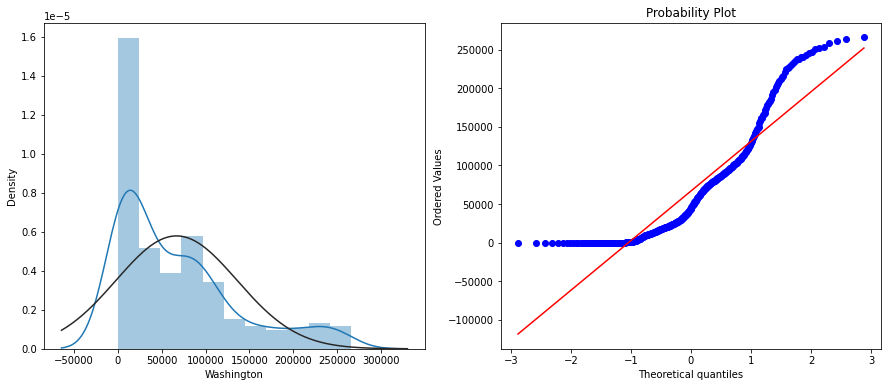

In [ ]:
diagnostic_plots(df_Washington1_red, "Washington")

In [ ]:
def takediff(df, first_diff=True, sec_diff=False, thr_diff=False):
  if first_diff:
    df_out = df.diff().dropna()
  if sec_diff:
    df_out = (df.diff().dropna()).diff().dropna()
  if thr_diff:
    df_out = ((df.diff().dropna()).diff().dropna()).diff().dropna()
  return df_out

In [ ]:
df_Washington1_3diff = takediff(df_Washington1_red, False, False, True)
df_Washington1_3diff

Washington  Washington_l1  ...  Idaho_l1  Alabama_l1
date                                   ...                      
2020-01-25         0.0            0.0  ...       0.0         0.0
2020-01-26         0.0            0.0  ...       0.0         0.0
2020-01-27         0.0            0.0  ...       0.0         0.0
2020-01-28         0.0            0.0  ...       0.0         0.0
2020-01-29         0.0            0.0  ...       0.0         0.0
...                ...            ...  ...       ...         ...
2021-01-02      4272.0        -4934.0  ...   -1235.0       725.0
2021-01-03      2378.0         4272.0  ...    2140.0      -925.0
2021-01-04     -6058.0         2378.0  ...   -1526.0      -425.0
2021-01-05      2110.0        -6058.0  ...    1611.0       920.0
2021-01-06        78.0         2110.0  ...    -951.0      3652.0

[348 rows x 33 columns]

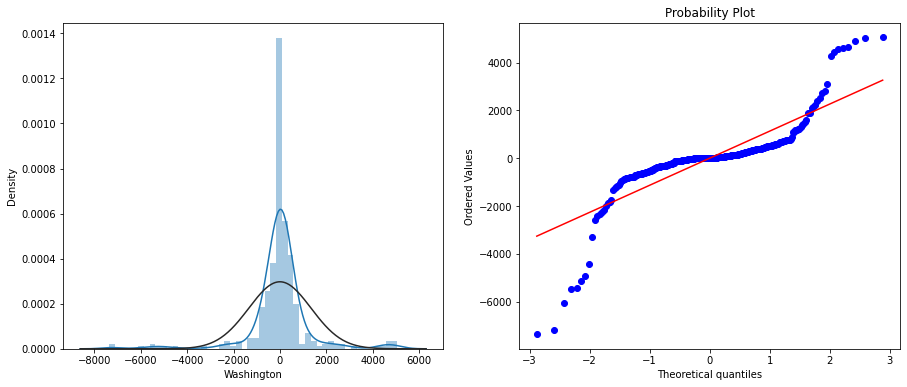

In [ ]:
diagnostic_plots(df_Washington1_3diff, "Washington")

##### **Linear regression model with stepwise variable selection (General View)**

In [ ]:
X = df_Washington1_3diff.drop(columns=['Washington'])
y = df_Washington1_3diff['Washington']

In [ ]:
X2 = sm.add_constant(X)
model_full = sm.OLS(y, X2)
fit_full = model_full.fit()
print(fit_full.summary())

                            OLS Regression Results                            
Dep. Variable:             Washington   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     18.69
Date:                Wed, 17 Feb 2021   Prob (F-statistic):           4.19e-55
Time:                        22:10:48   Log-Likelihood:                -2814.7
No. Observations:                 348   AIC:                             5695.
Df Residuals:                     315   BIC:                             5823.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.9338     44.40

In [ ]:
def forward_selected(data, response):
    """ Forward stepwise regression algorithm"""
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = -1E8, -1E8
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = -smf.glm(formula,data).fit().aic
            #score = -smf.glm(formula,data,family=sm.families.Binomial()).fit().aic
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    #model = smf.glm(formula,data,family=sm.families.Binomial()).fit()
 
    return model

In [ ]:
df_step = X.copy()
df_step['Washington'] = y
model = forward_selected(df_step, 'Washington')
print(model.model.formula)

Washington ~ Washington_l1 + Tennessee_l1 + Michigan_l1 + Georgia_l1 + Virginia_l1 + Oklahoma_l1 + Pennsylvania_l1 + North_Carolina_l1 + Mississippi_l1 + Iowa_l1 + Nevada_l1 + Maryland_l1 + Rhode_Island_l1 + Nebraska_l1 + Puerto_Rico_l1 + Minnesota_l1 + South_Carolina_l1 + 1


In [ ]:
# 17 states
model1 = smf.ols(model.model.formula, data = df_step)
fit1 = model1.fit()
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Washington   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     35.70
Date:                Wed, 17 Feb 2021   Prob (F-statistic):           2.45e-64
Time:                        22:11:03   Log-Likelihood:                -2818.3
No. Observations:                 348   AIC:                             5673.
Df Residuals:                     330   BIC:                             5742.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.6022     43.834      0.037      0.971     -84.627      87.831
Washington_l1        -0.4625      0.048     -9.596      0.000      -0.557      -0.368
Tennessee_l1          0.1782      0.019      9.203      0.000       0.140       0.216
Michigan_l1          -0.1154      0.019     -6.106      0.000      -0.153      -0.078
Georgia_l1           -0.0671      0.015     -4.578      0.000      -0.096      -0.038
Virginia_l1          -0.0186      0.089     -0.209      0.835      -0.193       0.156
Oklahoma_l1          -0.0959      0.042     -2.307      0.022      -0.178      -0.014
Pennsylvania_l1      -0.1323      0.048     -2.754      0.006      -0.227      -0.038
North_Carolina_l1     0.0842      0.024      3.556      0.000       0.038       0.131
Mississippi_l1       -0.2308      0.097     -2.381      0.018      -0.422      -0.040
Iowa_l1              -0.1732      0.073     -2.387      0.018      -0.316      -0.030
Nevada_l1            -0.2161      0.106     -2.031      0.043      -0.425      -0.007
Maryland_l1          -0.1811      0.096     -1.877      0.061      -0.371       0.009
Rhode_Island_l1       0.1376      0.073      1.880      0.061      -0.006       0.282
Nebraska_l1          -0.1633      0.100     -1.627      0.105      -0.361       0.034
Puerto_Rico_l1       -0.1276      0.077     -1.654      0.099      -0.279       0.024
Minnesota_l1         -0.0779      0.042     -1.839      0.067      -0.161       0.005
South_Carolina_l1     0.0744      0.048      1.551      0.122      -0.020       0.169
==============================================================================
Omnibus:                       62.857   Durbin-Watson:                   2.642
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              876.333
Skew:                          -0.020   Prob(JB):                    5.09e-191
Kurtosis:                      10.774   Cond. No.                     4.83e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### **Moving Window - 12 weeks**

In [ ]:
# activate R magic
%load_ext rpy2.ipython

In [ ]:
%%R
library(MASS)
library(glmnet)
library(ncvreg)
library(gglasso)

df_Washington1_red <- read.csv("~/Dropbox/UGA_PHD/project/COVID19/multivariate.csv")

dur4 <- 12*7
iter4 <- nrow(df_Washington1_red) - dur4

date <- NULL
pred_sub_3d <- NULL
pred_lasso_3d <- NULL
pred_net_3d <- NULL
pred_mcp_3d <- NULL
pred_scad_3d <- NULL
pred_grplasso_3d <- NULL
for (i in 1:iter4) {
  df4 <- df_Washington1_red[(i*1):((i*1)+dur4),]
  df4_train <-  df4[1:(nrow(df4)-1),]
  df4_test <- df4[nrow(df4),]
  df4_diff <- as.data.frame(lapply(df4[,2:34], diff, lag=1, difference=3))
  df4_diff['date'] <- df4[-c(1,2,3),]$date
  df4_train_diff <- df4_diff[1:(nrow(df4_diff)-1),]
  df4_test_diff <- df4_diff[nrow(df4_diff),]
  #### Subset Selection ####
  full_model <- lm(Washington~., data = df4_train_diff[,1:33])
  sub_model <- stepAIC(full_model, direction = 'backward')
  pred_sub <- predict(sub_model, newdata = df4_test_diff[,2:33])
  #### LASSO ####
  X_train <- model.matrix(Washington~.,df4_train_diff[,1:33])[,-1]
  y_train <- df4_train_diff$Washington
  X_test <- as.matrix(df4_test_diff[,2:33])
  y_test <- df4_test_diff$Washington
  #### LASSO ####
  lambda_seq <- 10^seq(2, -2, by = -.1)
  cv_output <- cv.glmnet(X_train, y_train, alpha = 1, lambda = lambda_seq, nfolds = 10)
  best_lam <- cv_output$lambda.min
  lasso_best <- glmnet(X_train, y_train, alpha = 1, lambda = best_lam)
  pred_lasso <- predict(lasso_best, s = best_lam, newx = X_test)
  #### Elastic Net ####
  cv_output2 <- cv.glmnet(X_train, y_train, alpha = 0.5, lambda = lambda_seq, nfolds = 10)
  best_lam2 <- cv_output2$lambda.min
  net_best <- glmnet(X_train, y_train, alpha = 0.5, lambda = best_lam2)
  pred_net <- predict(net_best, s = best_lam2, newx = X_test)
  #### Minimax Concave Penalty (MCP) ####
  cv_output3 <- cv.ncvreg(X_train, y_train, gamma = 2, penalty = "MCP", nfolds = 10)
  best_lam3 <- cv_output3$lambda.min
  pred_mcp <- predict(cv_output3, X = X_test)
  #### Smoothly Clipped Absolute Deviations (SCAD) ####
  cv_output4 <- cv.ncvreg(X_train, y_train, gamma = 4, penalty = "SCAD", nfolds = 10)
  best_lam4 <- cv_output4$lambda.min
  pred_scad <- predict(cv_output4, X = X_test)
  #### Group LASSO ####
  p <- dim(X_train)[2]
  groups <- rep(1:8, each = 4)
  cv_output5 <- cv.gglasso(X_train, y_train, group = groups, nfolds = 10)
  pred_gglasso <- predict(cv_output5$gglasso.fit, newx = X_test, s = cv_output5$lambda.min)
  #### Store the results ####
  date[i] <- df4_test_diff$date
  pred_sub_3d[i] <- pred_sub
  pred_lasso_3d[i] <- pred_lasso
  pred_net_3d[i] <- pred_net
  pred_mcp_3d[i] <- pred_mcp
  pred_scad_3d[i] <- pred_scad
  pred_grplasso_3d[i] <- pred_gglasso
}

df_forecast_sub <- cbind.data.frame(date, pred_sub_3d, pred_lasso_3d, pred_net_3d, pred_mcp_3d, pred_scad_3d, pred_grplasso_3d)
write.csv(df_forecast_sub, "~/Desktop/Washington_multi_results.csv")

In [179]:
Washington_multi_results = pd.read_csv("/content/drive/MyDrive/Project/COVID19/Washington_multi_results.csv")
Washington_multi_results

Unnamed: 0        date  ...  pred_scad_3d  pred_grplasso_3d
0             1  2020-04-15  ...     -1.272525        324.226907
1             2  2020-04-16  ...    391.173708         74.652836
2             3  2020-04-17  ...   -537.177846       -383.410023
3             4  2020-04-18  ...   -182.959256        504.906864
4             5  2020-04-19  ...    581.356594       -214.805851
..          ...         ...  ...           ...               ...
262         263  2021-01-02  ...   4603.399480       3124.576166
263         264  2021-01-03  ...  -2210.536201       -732.010095
264         265  2021-01-04  ...  -4094.564197      -9548.649373
265         266  2021-01-05  ...   5757.963367       7380.120200
266         267  2021-01-06  ...  -2473.498712      -2265.320315

[267 rows x 8 columns]

In [180]:
dur4 = 12*7
iter4 = math.floor(df_Washington1_red.shape[0]-dur4)

###### **Subset Selection**

In [181]:
df_forecast_sub = pd.DataFrame(Washington_multi_results["pred_sub_3d"])
df_forecast_sub.index = Washington_multi_results["date"]
df_forecast_sub = df_forecast_sub.rename(columns={'pred_sub_3d':'Washington_3d'})

###### **Regularization**

In [182]:
df_forecast_lasso = pd.DataFrame(Washington_multi_results["pred_lasso_3d"])
df_forecast_lasso.index = Washington_multi_results["date"]
df_forecast_lasso = df_forecast_lasso.rename(columns={'pred_lasso_3d':'Washington_3d'})

In [183]:
df_forecast_net = pd.DataFrame(Washington_multi_results["pred_net_3d"])
df_forecast_net.index = Washington_multi_results["date"]
df_forecast_net = df_forecast_net.rename(columns={'pred_net_3d':'Washington_3d'})

In [184]:
df_forecast_mcp = pd.DataFrame(Washington_multi_results["pred_mcp_3d"])
df_forecast_mcp.index = Washington_multi_results["date"]
df_forecast_mcp = df_forecast_mcp.rename(columns={'pred_mcp_3d':'Washington_3d'})

In [185]:
df_forecast_scad = pd.DataFrame(Washington_multi_results["pred_scad_3d"])
df_forecast_scad.index = Washington_multi_results["date"]
df_forecast_scad = df_forecast_scad.rename(columns={'pred_scad_3d':'Washington_3d'})

In [186]:
df_forecast_grplasso = pd.DataFrame(Washington_multi_results["pred_grplasso_3d"])
df_forecast_grplasso.index = Washington_multi_results["date"]
df_forecast_grplasso = df_forecast_grplasso.rename(columns={'pred_grplasso_3d':'Washington_3d'})

In [187]:
pred_sub = []
pred_lasso = []
pred_net = []
pred_mcp = []
pred_scad = []
pred_grplasso = []
for i in range(iter4):
  df4 = df_Washington1_red[i*1:(i*1+dur4+1)]
  df4_train, df4_test = df4[0:-1], df4[-1:]
  y_train_old = pd.DataFrame(df4_train['Washington'])
  df4_diff = takediff(df4, False, False, True)
  df4_train_diff, df4_test_diff = df4_diff[0:-1], df4_diff[-1:]
  ## Subset Selection
  y_pred_sub = float(df_forecast_sub.iloc[i])
  df_forecast_sub_3d = pd.DataFrame(y_pred_sub, index=df4_test.index, columns=['Washington_3d'])
  df_results_sub = invert_transformation(y_train_old, df_forecast_sub_3d)
  pred_sub.append(df_results_sub)
  ## LASSO
  y_pred_lasso = float(df_forecast_lasso.iloc[i])
  df_forecast_lasso_3d = pd.DataFrame(y_pred_lasso, index=df4_test.index, columns=['Washington_3d'])
  df_results_lasso = invert_transformation(y_train_old, df_forecast_lasso_3d)
  pred_lasso.append(df_results_lasso)
  ## Elastic Net
  y_pred_net = float(df_forecast_net.iloc[i])
  df_forecast_net_3d = pd.DataFrame(y_pred_net, index=df4_test.index, columns=['Washington_3d'])
  df_results_net = invert_transformation(y_train_old, df_forecast_net_3d)
  pred_net.append(df_results_net)
  ## MCP
  y_pred_mcp = float(df_forecast_mcp.iloc[i])
  df_forecast_mcp_3d = pd.DataFrame(y_pred_mcp, index=df4_test.index, columns=['Washington_3d'])
  df_results_mcp = invert_transformation(y_train_old, df_forecast_mcp_3d)
  pred_mcp.append(df_results_mcp)
  ## SCAD
  y_pred_scad = float(df_forecast_scad.iloc[i])
  df_forecast_scad_3d = pd.DataFrame(y_pred_scad, index=df4_test.index, columns=['Washington_3d'])
  df_results_scad = invert_transformation(y_train_old, df_forecast_scad_3d)
  pred_scad.append(df_results_scad)
  ## Group LASSO
  y_pred_grplasso = float(df_forecast_grplasso.iloc[i])
  df_forecast_grplasso_3d = pd.DataFrame(y_pred_grplasso, index=df4_test.index, columns=['Washington_3d'])
  df_results_grplasso = invert_transformation(y_train_old, df_forecast_grplasso_3d)
  pred_grplasso.append(df_results_grplasso)

df_forecast_sub12 = pd.concat(pred_sub)[['Washington_forecast']]
df_forecast_lasso12 = pd.concat(pred_lasso)[['Washington_forecast']]
df_forecast_net12 = pd.concat(pred_net)[['Washington_forecast']]
df_forecast_mcp12 = pd.concat(pred_mcp)[['Washington_forecast']]
df_forecast_scad12 = pd.concat(pred_scad)[['Washington_forecast']]
df_forecast_grplasso12 = pd.concat(pred_grplasso)[['Washington_forecast']]

###### **Machine Learning**

* XGBoost
* LightGBM
* RandomForest
* SVM

In [188]:
dur4 = 12*7
iter4 = math.floor(df_Washington1_red.shape[0]-dur4)

In [ ]:
pred_xgb = []
pred_lgbm = []
pred_rf = []
pred_svm = []
for i in range(iter4):
  df4 = df_Washington1_red[i*1:(i*1+dur4+1)]
  df4_train, df4_test = df4[0:-1], df4[-1:]
  y_train_old = pd.DataFrame(df4_train['Washington'])
  df4_diff = takediff(df4, False, False, True)
  df4_train_diff, df4_test_diff = df4_diff[0:-1], df4_diff[-1:]
  X_train = df4_train_diff.drop(columns=['Washington'])
  y_train = pd.DataFrame(df4_train_diff['Washington'])
  X_test = df4_test_diff.drop(columns=['Washington'])
  y_test = df4_test_diff['Washington']
  # XGBoost
  xgb_reg = XGBRegressor(random_state = RANDOM_STATE, importance_type='gain', learning_rate=0.1, max_depth=5, n_estimators=50)
  xgb_reg.fit(X_train, y_train)
  xgb_pred = xgb_reg.predict(X_test)
  df_forecast_xgb = pd.DataFrame(xgb_pred, index=df4_test.index, columns=['Washington_3d'])
  df_results_xgb = invert_transformation(y_train_old, df_forecast_xgb)
  pred_xgb.append(df_results_xgb)
  # LightGBM
  lgbm_reg = LGBMRegressor(random_state = RANDOM_STATE, importance_type='gain', learning_rate=0.1, max_depth=6, n_estimators=20)
  lgbm_reg.fit(X_train, y_train)
  lgbm_pred = lgbm_reg.predict(X_test)
  df_forecast_lgbm = pd.DataFrame(lgbm_pred, index=df4_test.index, columns=['Washington_3d'])
  df_results_lgbm = invert_transformation(y_train_old, df_forecast_lgbm)
  pred_lgbm.append(df_results_lgbm)
  # RandomForest
  rf_reg = RandomForestRegressor(random_state = RANDOM_STATE, max_depth=8, max_features='sqrt', n_estimators=200)
  rf_reg.fit(X_train, y_train)
  rf_pred = rf_reg.predict(X_test)
  df_forecast_rf = pd.DataFrame(rf_pred, index=df4_test.index, columns=['Washington_3d'])
  df_results_rf = invert_transformation(y_train_old, df_forecast_rf)
  pred_rf.append(df_results_rf)
  # SVM
  svm_reg = SVR(C=5000, gamma='scale', kernel='rbf')
  svm_reg.fit(X_train, y_train)
  svm_pred = svm_reg.predict(X_test)
  df_forecast_svm = pd.DataFrame(svm_pred, index=df4_test.index, columns=['Washington_3d'])
  df_results_svm = invert_transformation(y_train_old, df_forecast_svm)
  pred_svm.append(df_results_svm)

df_forecast_xgb12 = pd.concat(pred_xgb)[['Washington_forecast']]
df_forecast_lgbm12 = pd.concat(pred_lgbm)[['Washington_forecast']]
df_forecast_rf12 = pd.concat(pred_rf)[['Washington_forecast']]
df_forecast_svm12 = pd.concat(pred_svm)[['Washington_forecast']]

##### **New Design**

In [141]:
# lag 2
df_Washington2 = pd.DataFrame(df_state_cases['Washington'][2:])
df_Washington2['date'] = df_Washington2.index
df_Washington2.index = np.arange(1,351)
for col in df_state_cases.columns:
  newcol = df_state_cases[col][:-2]
  newcol.index = np.arange(1,351)
  df_Washington2[col + '_l2'] = newcol
df_Washington2.index = df_Washington2['date']
df_Washington2 = df_Washington2.drop(columns=['date'])
df_Washington2 = df_Washington2.drop(columns=['Washington'])
# lag 3
df_Washington3 = pd.DataFrame(df_state_cases['Washington'][3:])
df_Washington3['date'] = df_Washington3.index
df_Washington3.index = np.arange(1,350)
for col in df_state_cases.columns:
  newcol = df_state_cases[col][:-3]
  newcol.index = np.arange(1,350)
  df_Washington3[col + '_l3'] = newcol
df_Washington3.index = df_Washington3['date']
df_Washington3 = df_Washington3.drop(columns=['date'])
df_Washington3 = df_Washington3.drop(columns=['Washington'])
# lag 4
df_Washington4 = pd.DataFrame(df_state_cases['Washington'][4:])
df_Washington4['date'] = df_Washington4.index
df_Washington4.index = np.arange(1,349)
for col in df_state_cases.columns:
  newcol = df_state_cases[col][:-4]
  newcol.index = np.arange(1,349)
  df_Washington4[col + '_l4'] = newcol
df_Washington4.index = df_Washington4['date']
df_Washington4 = df_Washington4.drop(columns=['date'])
df_Washington4 = df_Washington4.drop(columns=['Washington'])
# lag 5
df_Washington5 = pd.DataFrame(df_state_cases['Washington'][5:])
df_Washington5['date'] = df_Washington5.index
df_Washington5.index = np.arange(1,348)
for col in df_state_cases.columns:
  newcol = df_state_cases[col][:-5]
  newcol.index = np.arange(1,348)
  df_Washington5[col + '_l5'] = newcol
df_Washington5.index = df_Washington5['date']
df_Washington5 = df_Washington5.drop(columns=['date'])
df_Washington5 = df_Washington5.drop(columns=['Washington'])
# lag 6
df_Washington6 = pd.DataFrame(df_state_cases['Washington'][6:])
df_Washington6['date'] = df_Washington6.index
df_Washington6.index = np.arange(1,347)
for col in df_state_cases.columns:
  newcol = df_state_cases[col][:-6]
  newcol.index = np.arange(1,347)
  df_Washington6[col + '_l6'] = newcol
df_Washington6.index = df_Washington6['date']
df_Washington6 = df_Washington6.drop(columns=['date'])
df_Washington6 = df_Washington6.drop(columns=['Washington'])
# lag 7
df_Washington7 = pd.DataFrame(df_state_cases['Washington'][7:])
df_Washington7['date'] = df_Washington7.index
df_Washington7.index = np.arange(1,346)
for col in df_state_cases.columns:
  newcol = df_state_cases[col][:-7]
  newcol.index = np.arange(1,346)
  df_Washington7[col + '_l7'] = newcol
df_Washington7.index = df_Washington7['date']
df_Washington7 = df_Washington7.drop(columns=['date'])
df_Washington7 = df_Washington7.drop(columns=['Washington'])

In [145]:
df_Washington_new = pd.concat([df_Washington1, df_Washington2, df_Washington3, df_Washington4, df_Washington5, df_Washington6, df_Washington7], axis=1)
df_Washington_new = df_Washington_new[6:]
df_Washington_new

Washington  ...  Northern_Mariana_Islands_l7
2020-01-28           1  ...                          0.0
2020-01-29           1  ...                          0.0
2020-01-30           1  ...                          0.0
2020-01-31           1  ...                          0.0
2020-02-01           1  ...                          0.0
...                ...  ...                          ...
2021-01-02      253290  ...                        122.0
2021-01-03      258557  ...                        122.0
2021-01-04      261328  ...                        122.0
2021-01-05      263713  ...                        122.0
2021-01-06      265790  ...                        122.0

[345 rows x 386 columns]

In [147]:
corrs = []
for col in df_Washington_new.columns:
  corr, _ = pearsonr(df_Washington_new['Washington'], df_Washington_new[col])
  corrs.append(corr)
df_Washington_new_corr = pd.DataFrame(corrs).transpose()
df_Washington_new_corr.columns = df_Washington_new.columns
df_Washington_new_corr

Washington  Washington_l1  ...  West_Virginia_l7  Northern_Mariana_Islands_l7
0         1.0        0.99996  ...          0.967646                      0.96493

[1 rows x 386 columns]

In [148]:
fig = px.histogram(pd.DataFrame(corrs), x=0, labels={'0':"Pearson's Correlation Coefficients"})
fig.show()

In [155]:
df_Washington_new_corr_old = df_Washington_new_corr.copy()
for col in df_Washington_new_corr.columns:
  corr = float(df_Washington_new_corr[col])
  if corr < 0.9945:
    df_Washington_new_corr_new = df_Washington_new_corr_old.drop(columns=[col])
    df_Washington_new_corr_old = df_Washington_new_corr_new.copy()
# 40 predictors
df_Washington_new_corr_old

Washington  Washington_l1  Oregon_l1  ...  Oregon_l7  Tennessee_l7  Nevada_l7
0         1.0        0.99996   0.995039  ...   0.994694      0.994983   0.996278

[1 rows x 40 columns]

In [159]:
df_Washington_new_corr_old.columns.to_list()

['Washington',
 'Washington_l1',
 'Oregon_l1',
 'North_Carolina_l1',
 'Tennessee_l1',
 'Nevada_l1',
 'Arkansas_l1',
 'Washington_l2',
 'Oregon_l2',
 'North_Carolina_l2',
 'Tennessee_l2',
 'Nevada_l2',
 'Arkansas_l2',
 'Washington_l3',
 'Oregon_l3',
 'North_Carolina_l3',
 'Tennessee_l3',
 'Nevada_l3',
 'Arkansas_l3',
 'Washington_l4',
 'Oregon_l4',
 'North_Carolina_l4',
 'Tennessee_l4',
 'Nevada_l4',
 'Arkansas_l4',
 'Washington_l5',
 'Oregon_l5',
 'North_Carolina_l5',
 'Tennessee_l5',
 'Nevada_l5',
 'Arkansas_l5',
 'Washington_l6',
 'Oregon_l6',
 'North_Carolina_l6',
 'Tennessee_l6',
 'Nevada_l6',
 'Washington_l7',
 'Oregon_l7',
 'Tennessee_l7',
 'Nevada_l7']

In [161]:
features = df_Washington_new_corr_old.columns.to_list()
df_Washington_new_red = df_Washington_new[features]
df_Washington_new_red

Washington  Washington_l1  ...  Tennessee_l7  Nevada_l7
2020-01-28           1              1  ...           0.0        0.0
2020-01-29           1              1  ...           0.0        0.0
2020-01-30           1              1  ...           0.0        0.0
2020-01-31           1              1  ...           0.0        0.0
2020-02-01           1              1  ...           0.0        0.0
...                ...            ...  ...           ...        ...
2021-01-02      253290         251585  ...      546245.0   216329.0
2021-01-03      258557         253290  ...      549299.0   217653.0
2021-01-04      261328         258557  ...      552794.0   218666.0
2021-01-05      263713         261328  ...      557554.0   220391.0
2021-01-06      265790         263713  ...      566457.0   223033.0

[345 rows x 40 columns]

In [163]:
# activate R magic
%load_ext rpy2.ipython

In [ ]:
library(MASS)
library(glmnet)
library(ncvreg)
library(gglasso)

df_Washington1_red <- read.csv("/content/drive/MyDrive/Project/COVID19/multivariate_new.csv")

dur4 <- 12*7
iter4 <- nrow(df_Washington1_red) - dur4

date <- NULL
pred_sub_3d <- NULL
pred_lasso_3d <- NULL
pred_net_3d <- NULL
pred_mcp_3d <- NULL
pred_scad_3d <- NULL
pred_grplasso_3d <- NULL
for (i in 1:iter4) {
  df4 <- df_Washington1_red[(i*1):((i*1)+dur4),]
  df4_train <-  df4[1:(nrow(df4)-1),]
  df4_test <- df4[nrow(df4),]
  df4_diff <- as.data.frame(lapply(df4[,2:34], diff, lag=1, difference=3))
  df4_diff['date'] <- df4[-c(1,2,3),]$date
  df4_train_diff <- df4_diff[1:(nrow(df4_diff)-1),]
  df4_test_diff <- df4_diff[nrow(df4_diff),]
  #### Subset Selection ####
  full_model <- lm(Washington~., data = df4_train_diff[,1:33])
  sub_model <- stepAIC(full_model, direction = 'backward')
  pred_sub <- predict(sub_model, newdata = df4_test_diff[,2:33])
  #### LASSO ####
  X_train <- model.matrix(Washington~.,df4_train_diff[,1:33])[,-1]
  y_train <- df4_train_diff$Washington
  X_test <- as.matrix(df4_test_diff[,2:33])
  y_test <- df4_test_diff$Washington
  #### LASSO ####
  lambda_seq <- 10^seq(2, -2, by = -.1)
  cv_output <- cv.glmnet(X_train, y_train, alpha = 1, lambda = lambda_seq, nfolds = 10)
  best_lam <- cv_output$lambda.min
  lasso_best <- glmnet(X_train, y_train, alpha = 1, lambda = best_lam)
  pred_lasso <- predict(lasso_best, s = best_lam, newx = X_test)
  #### Elastic Net ####
  cv_output2 <- cv.glmnet(X_train, y_train, alpha = 0.5, lambda = lambda_seq, nfolds = 10)
  best_lam2 <- cv_output2$lambda.min
  net_best <- glmnet(X_train, y_train, alpha = 0.5, lambda = best_lam2)
  pred_net <- predict(net_best, s = best_lam2, newx = X_test)
  #### Minimax Concave Penalty (MCP) ####
  cv_output3 <- cv.ncvreg(X_train, y_train, gamma = 2, penalty = "MCP", nfolds = 10)
  best_lam3 <- cv_output3$lambda.min
  pred_mcp <- predict(cv_output3, X = X_test)
  #### Smoothly Clipped Absolute Deviations (SCAD) ####
  cv_output4 <- cv.ncvreg(X_train, y_train, gamma = 4, penalty = "SCAD", nfolds = 10)
  best_lam4 <- cv_output4$lambda.min
  pred_scad <- predict(cv_output4, X = X_test)
  #### Group LASSO ####
  p <- dim(X_train)[2]
  groups <- rep(1:8, each = 4)
  cv_output5 <- cv.gglasso(X_train, y_train, group = groups, nfolds = 10)
  pred_gglasso <- predict(cv_output5$gglasso.fit, newx = X_test, s = cv_output5$lambda.min)
  #### Store the results ####
  date[i] <- df4_test_diff$date
  pred_sub_3d[i] <- pred_sub
  pred_lasso_3d[i] <- pred_lasso
  pred_net_3d[i] <- pred_net
  pred_mcp_3d[i] <- pred_mcp
  pred_scad_3d[i] <- pred_scad
  pred_grplasso_3d[i] <- pred_gglasso
}

df_forecast_sub <- cbind.data.frame(date, pred_sub_3d, pred_lasso_3d, pred_net_3d, pred_mcp_3d, pred_scad_3d, pred_grplasso_3d)
write.csv(df_forecast_sub, "/content/drive/MyDrive/Project/COVID19/Washington_multi_new_results.csv")

In [164]:
Washington_multi_new_results = pd.read_csv("/content/drive/MyDrive/Project/COVID19/Washington_multi_new_results.csv")
Washington_multi_new_results

Unnamed: 0     date  ...  pred_scad_3d  pred_grplasso_3d
0             1  4/21/20  ...    294.028672       -693.660688
1             2  4/22/20  ...   -188.686446        302.762184
2             3  4/23/20  ...    554.905197        231.623628
3             4  4/24/20  ...    311.826877        -54.039717
4             5  4/25/20  ...    645.856429        659.670755
..          ...      ...  ...           ...               ...
256         257   1/2/21  ...   5133.357614       5239.233493
257         258   1/3/21  ...  -1402.317157       -849.306820
258         259   1/4/21  ...  -7178.406460      -7971.988502
259         260   1/5/21  ...   4086.974204       3847.862622
260         261   1/6/21  ...   -956.962468       1121.187314

[261 rows x 8 columns]

In [ ]:
dur4 = 12*7
iter4 = math.floor(df_Washington_new_red.shape[0]-dur4)

###### **Subset Selection**

In [167]:
df_forecast_sub1 = pd.DataFrame(Washington_multi_new_results["pred_sub_3d"])
df_forecast_sub1.index = Washington_multi_new_results["date"]
df_forecast_sub1 = df_forecast_sub1.rename(columns={'pred_sub_3d':'Washington_3d'})

###### **Regularization**

In [169]:
# LASSO
df_forecast_lasso1 = pd.DataFrame(Washington_multi_new_results["pred_lasso_3d"])
df_forecast_lasso1.index = Washington_multi_new_results["date"]
df_forecast_lasso1 = df_forecast_lasso1.rename(columns={'pred_lasso_3d':'Washington_3d'})
# Elastic Net
df_forecast_net1 = pd.DataFrame(Washington_multi_new_results["pred_net_3d"])
df_forecast_net1.index = Washington_multi_new_results["date"]
df_forecast_net1 = df_forecast_net1.rename(columns={'pred_net_3d':'Washington_3d'})
# MCP
df_forecast_mcp1 = pd.DataFrame(Washington_multi_new_results["pred_mcp_3d"])
df_forecast_mcp1.index = Washington_multi_new_results["date"]
df_forecast_mcp1 = df_forecast_mcp1.rename(columns={'pred_mcp_3d':'Washington_3d'})
# SCAD
df_forecast_scad1 = pd.DataFrame(Washington_multi_new_results["pred_scad_3d"])
df_forecast_scad1.index = Washington_multi_new_results["date"]
df_forecast_scad1 = df_forecast_scad1.rename(columns={'pred_scad_3d':'Washington_3d'})
# Group LASSO
df_forecast_grplasso1 = pd.DataFrame(Washington_multi_new_results["pred_grplasso_3d"])
df_forecast_grplasso1.index = Washington_multi_new_results["date"]
df_forecast_grplasso1 = df_forecast_grplasso1.rename(columns={'pred_grplasso_3d':'Washington_3d'})

In [170]:
pred_sub = []
pred_lasso = []
pred_net = []
pred_mcp = []
pred_scad = []
pred_grplasso = []
for i in range(iter4):
  df4 = df_Washington_new_red[i*1:(i*1+dur4+1)]
  df4_train, df4_test = df4[0:-1], df4[-1:]
  y_train_old = pd.DataFrame(df4_train['Washington'])
  df4_diff = takediff(df4, False, False, True)
  df4_train_diff, df4_test_diff = df4_diff[0:-1], df4_diff[-1:]
  ## Subset Selection
  y_pred_sub = float(df_forecast_sub1.iloc[i])
  df_forecast_sub_3d = pd.DataFrame(y_pred_sub, index=df4_test.index, columns=['Washington_3d'])
  df_results_sub = invert_transformation(y_train_old, df_forecast_sub_3d)
  pred_sub.append(df_results_sub)
  ## LASSO
  y_pred_lasso = float(df_forecast_lasso1.iloc[i])
  df_forecast_lasso_3d = pd.DataFrame(y_pred_lasso, index=df4_test.index, columns=['Washington_3d'])
  df_results_lasso = invert_transformation(y_train_old, df_forecast_lasso_3d)
  pred_lasso.append(df_results_lasso)
  ## Elastic Net
  y_pred_net = float(df_forecast_net1.iloc[i])
  df_forecast_net_3d = pd.DataFrame(y_pred_net, index=df4_test.index, columns=['Washington_3d'])
  df_results_net = invert_transformation(y_train_old, df_forecast_net_3d)
  pred_net.append(df_results_net)
  ## MCP
  y_pred_mcp = float(df_forecast_mcp1.iloc[i])
  df_forecast_mcp_3d = pd.DataFrame(y_pred_mcp, index=df4_test.index, columns=['Washington_3d'])
  df_results_mcp = invert_transformation(y_train_old, df_forecast_mcp_3d)
  pred_mcp.append(df_results_mcp)
  ## SCAD
  y_pred_scad = float(df_forecast_scad1.iloc[i])
  df_forecast_scad_3d = pd.DataFrame(y_pred_scad, index=df4_test.index, columns=['Washington_3d'])
  df_results_scad = invert_transformation(y_train_old, df_forecast_scad_3d)
  pred_scad.append(df_results_scad)
  ## Group LASSO
  y_pred_grplasso = float(df_forecast_grplasso1.iloc[i])
  df_forecast_grplasso_3d = pd.DataFrame(y_pred_grplasso, index=df4_test.index, columns=['Washington_3d'])
  df_results_grplasso = invert_transformation(y_train_old, df_forecast_grplasso_3d)
  pred_grplasso.append(df_results_grplasso)

df_forecast_sub12_new = pd.concat(pred_sub)[['Washington_forecast']]
df_forecast_lasso12_new = pd.concat(pred_lasso)[['Washington_forecast']]
df_forecast_net12_new = pd.concat(pred_net)[['Washington_forecast']]
df_forecast_mcp12_new = pd.concat(pred_mcp)[['Washington_forecast']]
df_forecast_scad12_new = pd.concat(pred_scad)[['Washington_forecast']]
df_forecast_grplasso12_new = pd.concat(pred_grplasso)[['Washington_forecast']]

###### **Machine Learning**

* XGBoost
* LightGBM
* RandomForest
* SVM

In [171]:
dur4 = 12*7
iter4 = math.floor(df_Washington_new_red.shape[0]-dur4)

In [ ]:
pred_xgb = []
pred_lgbm = []
pred_rf = []
pred_svm = []
for i in range(iter4):
  df4 = df_Washington_new_red[i*1:(i*1+dur4+1)]
  df4_train, df4_test = df4[0:-1], df4[-1:]
  y_train_old = pd.DataFrame(df4_train['Washington'])
  df4_diff = takediff(df4, False, False, True)
  df4_train_diff, df4_test_diff = df4_diff[0:-1], df4_diff[-1:]
  X_train = df4_train_diff.drop(columns=['Washington'])
  y_train = pd.DataFrame(df4_train_diff['Washington'])
  X_test = df4_test_diff.drop(columns=['Washington'])
  y_test = df4_test_diff['Washington']
  # XGBoost
  xgb_reg = XGBRegressor(random_state = RANDOM_STATE, importance_type='gain', learning_rate=0.1, max_depth=5, n_estimators=50)
  xgb_reg.fit(X_train, y_train)
  xgb_pred = xgb_reg.predict(X_test)
  df_forecast_xgb = pd.DataFrame(xgb_pred, index=df4_test.index, columns=['Washington_3d'])
  df_results_xgb = invert_transformation(y_train_old, df_forecast_xgb)
  pred_xgb.append(df_results_xgb)
  # LightGBM
  lgbm_reg = LGBMRegressor(random_state = RANDOM_STATE, importance_type='gain', learning_rate=0.1, max_depth=6, n_estimators=20)
  lgbm_reg.fit(X_train, y_train)
  lgbm_pred = lgbm_reg.predict(X_test)
  df_forecast_lgbm = pd.DataFrame(lgbm_pred, index=df4_test.index, columns=['Washington_3d'])
  df_results_lgbm = invert_transformation(y_train_old, df_forecast_lgbm)
  pred_lgbm.append(df_results_lgbm)
  # RandomForest
  rf_reg = RandomForestRegressor(random_state = RANDOM_STATE, max_depth=8, max_features='sqrt', n_estimators=200)
  rf_reg.fit(X_train, y_train)
  rf_pred = rf_reg.predict(X_test)
  df_forecast_rf = pd.DataFrame(rf_pred, index=df4_test.index, columns=['Washington_3d'])
  df_results_rf = invert_transformation(y_train_old, df_forecast_rf)
  pred_rf.append(df_results_rf)
  # SVM
  svm_reg = SVR(C=5000, gamma='scale', kernel='rbf')
  svm_reg.fit(X_train, y_train)
  svm_pred = svm_reg.predict(X_test)
  df_forecast_svm = pd.DataFrame(svm_pred, index=df4_test.index, columns=['Washington_3d'])
  df_results_svm = invert_transformation(y_train_old, df_forecast_svm)
  pred_svm.append(df_results_svm)

df_forecast_xgb12_new = pd.concat(pred_xgb)[['Washington_forecast']]
df_forecast_lgbm12_new = pd.concat(pred_lgbm)[['Washington_forecast']]
df_forecast_rf12_new = pd.concat(pred_rf)[['Washington_forecast']]
df_forecast_svm12_new = pd.concat(pred_svm)[['Washington_forecast']]

##### **Comparison between old and new design**

In [173]:
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

###### **Visulization**

In [192]:
index12 = df_forecast_sub12_new.index
valuet = df_Washington_new_red.loc[index12,'Washington']
# multivariate (old)
valuesub = df_forecast_sub12.loc[index12,'Washington_forecast']
valuelasso = df_forecast_lasso12.loc[index12,'Washington_forecast']
valuenet = df_forecast_net12.loc[index12,'Washington_forecast']
valuemcp = df_forecast_mcp12.loc[index12,'Washington_forecast']
valuescad = df_forecast_scad12.loc[index12,'Washington_forecast']
valuegrplasso = df_forecast_grplasso12.loc[index12,'Washington_forecast']
# machine learning (old)
valuexgb = df_forecast_xgb12.loc[index12,'Washington_forecast']
valuelgbm = df_forecast_lgbm12.loc[index12,'Washington_forecast']
valuerf = df_forecast_rf12.loc[index12,'Washington_forecast']
valuesvm = df_forecast_svm12.loc[index12,'Washington_forecast']
# multivariate (new)
valuesub_new = df_forecast_sub12_new.loc[index12,'Washington_forecast']
valuelasso_new = df_forecast_lasso12_new.loc[index12,'Washington_forecast']
valuenet_new = df_forecast_net12_new.loc[index12,'Washington_forecast']
valuemcp_new = df_forecast_mcp12_new.loc[index12,'Washington_forecast']
valuescad_new = df_forecast_scad12_new.loc[index12,'Washington_forecast']
valuegrplasso_new = df_forecast_grplasso12_new.loc[index12,'Washington_forecast']
# machine learning (new)
valuexgb_new = df_forecast_xgb12_new.loc[index12,'Washington_forecast']
valuelgbm_new = df_forecast_lgbm12_new.loc[index12,'Washington_forecast']
valuerf_new = df_forecast_rf12_new.loc[index12,'Washington_forecast']
valuesvm_new = df_forecast_svm12_new.loc[index12,'Washington_forecast']

df_vis_washingtont = pd.DataFrame(list(zip(index12,valuet)), columns=['date','value'])
# old
df_vis_washingtonsub = pd.DataFrame(list(zip(index12,valuesub)), columns=['date','value'])
df_vis_washingtonlasso = pd.DataFrame(list(zip(index12,valuelasso)), columns=['date','value'])
df_vis_washingtonnet = pd.DataFrame(list(zip(index12,valuenet)), columns=['date','value'])
df_vis_washingtonmcp = pd.DataFrame(list(zip(index12,valuemcp)), columns=['date','value'])
df_vis_washingtonscad = pd.DataFrame(list(zip(index12,valuescad)), columns=['date','value'])
df_vis_washingtongrplasso = pd.DataFrame(list(zip(index12,valuegrplasso)), columns=['date','value'])
df_vis_washingtonxgb = pd.DataFrame(list(zip(index12,valuexgb)), columns=['date','value'])
df_vis_washingtonlgbm = pd.DataFrame(list(zip(index12,valuelgbm)), columns=['date','value'])
df_vis_washingtonrf = pd.DataFrame(list(zip(index12,valuerf)), columns=['date','value'])
df_vis_washingtonsvm = pd.DataFrame(list(zip(index12,valuesvm)), columns=['date','value'])
# new
df_vis_washingtonsub_new = pd.DataFrame(list(zip(index12,valuesub_new)), columns=['date','value'])
df_vis_washingtonlasso_new = pd.DataFrame(list(zip(index12,valuelasso_new)), columns=['date','value'])
df_vis_washingtonnet_new = pd.DataFrame(list(zip(index12,valuenet_new)), columns=['date','value'])
df_vis_washingtonmcp_new = pd.DataFrame(list(zip(index12,valuemcp_new)), columns=['date','value'])
df_vis_washingtonscad_new = pd.DataFrame(list(zip(index12,valuescad_new)), columns=['date','value'])
df_vis_washingtongrplasso_new = pd.DataFrame(list(zip(index12,valuegrplasso_new)), columns=['date','value'])
df_vis_washingtonxgb_new = pd.DataFrame(list(zip(index12,valuexgb_new)), columns=['date','value'])
df_vis_washingtonlgbm_new = pd.DataFrame(list(zip(index12,valuelgbm_new)), columns=['date','value'])
df_vis_washingtonrf_new = pd.DataFrame(list(zip(index12,valuerf_new)), columns=['date','value'])
df_vis_washingtonsvm_new = pd.DataFrame(list(zip(index12,valuesvm_new)), columns=['date','value'])

df_vis_washingtont['variable'] = 'True'
# old
df_vis_washingtonsub['variable'] = "Subset Selection (old)"
df_vis_washingtonlasso['variable'] = "LASSO (old)"
df_vis_washingtonnet['variable'] = "Elastic Net (old)"
df_vis_washingtonmcp['variable'] = "MCP (old)"
df_vis_washingtonscad['variable'] = "SCAD (old)"
df_vis_washingtongrplasso['variable'] = "Group LASSO (old)"
df_vis_washingtonxgb['variable'] = "XGBoost (old)"
df_vis_washingtonlgbm['variable'] = "LightGBM (old)"
df_vis_washingtonrf['variable'] = "RandomForest (old)"
df_vis_washingtonsvm['variable'] = "SVM (old)"
# new
df_vis_washingtonsub_new['variable'] = "Subset Selection (new)"
df_vis_washingtonlasso_new['variable'] = "LASSO (new)"
df_vis_washingtonnet_new['variable'] = "Elastic Net (new)"
df_vis_washingtonmcp_new['variable'] = "MCP (new)"
df_vis_washingtonscad_new['variable'] = "SCAD (new)"
df_vis_washingtongrplasso_new['variable'] = "Group LASSO (new)"
df_vis_washingtonxgb_new['variable'] = "XGBoost (new)"
df_vis_washingtonlgbm_new['variable'] = "LightGBM (new)"
df_vis_washingtonrf_new['variable'] = "RandomForest (new)"
df_vis_washingtonsvm_new['variable'] = "SVM (new)"

In [193]:
df_vis_washington_comp = pd.concat([df_vis_washingtont, df_vis_washingtonsub, df_vis_washingtonlasso, df_vis_washingtonnet, df_vis_washingtonmcp, df_vis_washingtonscad,
                                    df_vis_washingtongrplasso, df_vis_washingtonxgb, df_vis_washingtonlgbm, df_vis_washingtonrf, df_vis_washingtonsvm,
                                    df_vis_washingtonsub_new, df_vis_washingtonlasso_new, df_vis_washingtonnet_new, df_vis_washingtonmcp_new, df_vis_washingtonscad_new,
                                    df_vis_washingtongrplasso_new, df_vis_washingtonxgb_new, df_vis_washingtonlgbm_new, df_vis_washingtonrf_new, df_vis_washingtonsvm_new])
fig = px.line(df_vis_washington_comp, x="date", y="value", color='variable', 
              title="Washington")
fig.show()

###### **Evaluation**

In [194]:
print("Mean absolute percentage error (MAPE)")
print("Subset Selection            : old ", mean_absolute_percentage_error(valuet, valuesub), "; new ", mean_absolute_percentage_error(valuet, valuesub_new))
print("LASSO                       : old ", mean_absolute_percentage_error(valuet, valuelasso), "; new ", mean_absolute_percentage_error(valuet, valuelasso_new))
print("Elastic Net                 : old ", mean_absolute_percentage_error(valuet, valuenet), "; new ", mean_absolute_percentage_error(valuet, valuenet_new))
print("MCP                         : old ", mean_absolute_percentage_error(valuet, valuemcp), "; new ", mean_absolute_percentage_error(valuet, valuemcp_new))
print("SCAD                        : old ", mean_absolute_percentage_error(valuet, valuescad), "; new ", mean_absolute_percentage_error(valuet, valuescad_new))
print("Group LASSO                 : old ", mean_absolute_percentage_error(valuet, valuegrplasso), "; new ", mean_absolute_percentage_error(valuet, valuegrplasso_new))
print("XGBoost                     : old ", mean_absolute_percentage_error(valuet, valuexgb), "; new ", mean_absolute_percentage_error(valuet, valuexgb_new))
print("LightGBM                    : old ", mean_absolute_percentage_error(valuet, valuelgbm), "; new ", mean_absolute_percentage_error(valuet, valuelgbm_new))
print("RandomForest                : old ", mean_absolute_percentage_error(valuet, valuerf), "; new ", mean_absolute_percentage_error(valuet, valuerf_new))
print("SVM                         : old ", mean_absolute_percentage_error(valuet, valuesvm), "; new ", mean_absolute_percentage_error(valuet, valuesvm_new))

Mean absolute percentage error (MAPE)
Subset Selection            : old  1.4575354852570541 ; new  0.8247906461148776
LASSO                       : old  0.9657547890688117 ; new  0.7058541896873451
Elastic Net                 : old  0.9425742462837543 ; new  0.7082196277645683
MCP                         : old  1.0216846788300327 ; new  0.7388630138450162
SCAD                        : old  1.0005119985075708 ; new  0.7327992555198863
Group LASSO                 : old  0.9678191111316709 ; new  0.6700004476173739
XGBoost                     : old  0.8472412118367051 ; new  0.8369636721379381
LightGBM                    : old  0.8053225939209538 ; new  0.8154489333433922
RandomForest                : old  0.8122807033876198 ; new  0.8636879668334919
SVM                         : old  0.9050871442054147 ; new  0.9006323763945131


In [195]:
print("Mean absolute error (MAE)")
print("Subset Selection            : old ", mean_absolute_error(valuet, valuesub), "; new ", mean_absolute_error(valuet, valuesub_new))
print("LASSO                       : old ", mean_absolute_error(valuet, valuelasso), "; new ", mean_absolute_error(valuet, valuelasso_new))
print("Elastic Net                 : old ", mean_absolute_error(valuet, valuenet), "; new ", mean_absolute_error(valuet, valuenet_new))
print("MCP                         : old ", mean_absolute_error(valuet, valuemcp), "; new ", mean_absolute_error(valuet, valuemcp_new))
print("SCAD                        : old ", mean_absolute_error(valuet, valuescad), "; new ", mean_absolute_error(valuet, valuescad_new))
print("Group LASSO                 : old ", mean_absolute_error(valuet, valuegrplasso), "; new ", mean_absolute_error(valuet, valuegrplasso_new))
print("XGBoost                     : old ", mean_absolute_error(valuet, valuexgb), "; new ", mean_absolute_error(valuet, valuexgb_new))
print("LightGBM                    : old ", mean_absolute_error(valuet, valuelgbm), "; new ", mean_absolute_error(valuet, valuelgbm_new))
print("RandomForest                : old ", mean_absolute_error(valuet, valuerf), "; new ", mean_absolute_error(valuet, valuerf_new))
print("SVM                         : old ", mean_absolute_error(valuet, valuesvm), "; new ", mean_absolute_error(valuet, valuesvm_new))

Mean absolute error (MAE)
Subset Selection            : old  1012.8838045497467 ; new  552.47342681563
LASSO                       : old  779.8772942774438 ; new  529.1519948160599
Elastic Net                 : old  778.4242556273558 ; new  533.6030374170704
MCP                         : old  853.1451323070171 ; new  550.0580581361689
SCAD                        : old  864.2859246054444 ; new  545.15488342897
Group LASSO                 : old  834.1955412368976 ; new  533.0279296347668
XGBoost                     : old  716.4029407720457 ; new  702.2121459259384
LightGBM                    : old  722.6280946555535 ; new  740.7955186678711
RandomForest                : old  721.8835340249533 ; new  757.8289423674607
SVM                         : old  807.5246684101041 ; new  812.4183240379992


### **Evaluation and Comparison (all model; old design)**

In [160]:
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

#### **227 days (2020-05-25 to 2021-01-06)**

##### **Visualization**

In [271]:
index12 = df_forecast_var12.index
valuet = df_Washington_new_red.loc[index12,'Washington']
value12 = df_forecast_var12.loc[index12, 'Washington_forecast']
value12_new = df_forecast_var12_new.loc[index12, 'Washington_forecast']
valuea3 = df_forecast_ex121.loc[index12, 'Washington_forecast']
valuefit2 = df_forecast_holt122.loc[index12, 'Washington_forecast']
valuencs12 = df_forecast_ncs12.loc[index12, 'Washington_forecast']
valuelpr = df_forecast_lpr12_d2.loc[index12,'Washington_forecast']
# multivariate
valuesub = df_forecast_sub12.loc[index12,'Washington_forecast']
valuelasso = df_forecast_lasso12.loc[index12,'Washington_forecast']
valuenet = df_forecast_net12.loc[index12,'Washington_forecast']
valuemcp = df_forecast_mcp12.loc[index12,'Washington_forecast']
valuescad = df_forecast_scad12.loc[index12,'Washington_forecast']
valuegrplasso = df_forecast_grplasso12.loc[index12,'Washington_forecast']
# machine learning
valuexgb = df_forecast_xgb12.loc[index12,'Washington_forecast']
valuelgbm = df_forecast_lgbm12.loc[index12,'Washington_forecast']
valuerf = df_forecast_rf12.loc[index12,'Washington_forecast']
valuesvm = df_forecast_svm12.loc[index12,'Washington_forecast']
# multivariate (new)
valuesub_new = df_forecast_sub12_new.loc[index12,'Washington_forecast']
valuelasso_new = df_forecast_lasso12_new.loc[index12,'Washington_forecast']
valuenet_new = df_forecast_net12_new.loc[index12,'Washington_forecast']
valuemcp_new = df_forecast_mcp12_new.loc[index12,'Washington_forecast']
valuescad_new = df_forecast_scad12_new.loc[index12,'Washington_forecast']
valuegrplasso_new = df_forecast_grplasso12_new.loc[index12,'Washington_forecast']
# machine learning (new)
valuexgb_new = df_forecast_xgb12_new.loc[index12,'Washington_forecast']
valuelgbm_new = df_forecast_lgbm12_new.loc[index12,'Washington_forecast']
valuerf_new = df_forecast_rf12_new.loc[index12,'Washington_forecast']
valuesvm_new = df_forecast_svm12_new.loc[index12,'Washington_forecast']

df_vis_washingtont = pd.DataFrame(list(zip(index12,valuet)), columns=['date','value'])
df_vis_washingtonvar = pd.DataFrame(list(zip(index12,value12)), columns=['date','value'])
df_vis_washingtonsex = pd.DataFrame(list(zip(index12,valuea3)), columns=['date','value'])
df_vis_washingtonholt = pd.DataFrame(list(zip(index12,valuefit2)), columns=['date','value'])
df_vis_washingtonncs = pd.DataFrame(list(zip(index12,valuencs12)), columns=['date','value'])
df_vis_washingtonlpr = pd.DataFrame(list(zip(index12,valuelpr)), columns=['date','value'])
df_vis_washingtonsub = pd.DataFrame(list(zip(index12,valuesub)), columns=['date','value'])
df_vis_washingtonlasso = pd.DataFrame(list(zip(index12,valuelasso)), columns=['date','value'])
df_vis_washingtonnet = pd.DataFrame(list(zip(index12,valuenet)), columns=['date','value'])
df_vis_washingtonmcp = pd.DataFrame(list(zip(index12,valuemcp)), columns=['date','value'])
df_vis_washingtonscad = pd.DataFrame(list(zip(index12,valuescad)), columns=['date','value'])
df_vis_washingtongrplasso = pd.DataFrame(list(zip(index12,valuegrplasso)), columns=['date','value'])
df_vis_washingtonxgb = pd.DataFrame(list(zip(index12,valuexgb)), columns=['date','value'])
df_vis_washingtonlgbm = pd.DataFrame(list(zip(index12,valuelgbm)), columns=['date','value'])
df_vis_washingtonrf = pd.DataFrame(list(zip(index12,valuerf)), columns=['date','value'])
df_vis_washingtonsvm = pd.DataFrame(list(zip(index12,valuesvm)), columns=['date','value'])

df_vis_washingtont['variable'] = 'True'
df_vis_washingtonvar['variable'] = 'VAR'
df_vis_washingtonsex['variable'] = 'Simple Exponential Smoothing'
df_vis_washingtonholt['variable'] = "Holt's Exponential Smoothing"
df_vis_washingtonncs['variable'] = 'Natural Cubic Spline'
df_vis_washingtonlpr['variable'] = "Local Polynomial Regression"
df_vis_washingtonsub['variable'] = "Subset Selection"
df_vis_washingtonlasso['variable'] = "LASSO"
df_vis_washingtonnet['variable'] = "Elastic Net"
df_vis_washingtonmcp['variable'] = "MCP"
df_vis_washingtonscad['variable'] = "SCAD"
df_vis_washingtongrplasso['variable'] = "Group LASSO"
df_vis_washingtonxgb['variable'] = "XGBoost"
df_vis_washingtonlgbm['variable'] = "LightGBM"
df_vis_washingtonrf['variable'] = "RandomForest"
df_vis_washingtonsvm['variable'] = "SVM"

In [ ]:
df_vis_washington_comp = pd.concat([df_vis_washingtont, df_vis_washingtonvar, df_vis_washingtonsex, df_vis_washingtonholt, df_vis_washingtonncs, df_vis_washingtonlpr,
                                    df_vis_washingtonsub, df_vis_washingtonlasso, df_vis_washingtonnet, df_vis_washingtonmcp, df_vis_washingtonscad,
                                    df_vis_washingtongrplasso, df_vis_washingtonxgb, df_vis_washingtonlgbm, df_vis_washingtonrf, df_vis_washingtonsvm])
fig = px.line(df_vis_washington_comp, x="date", y="value", color='variable', 
              title="Washington (Comparison of Different Method) 227 days")
fig.show()

##### **Evaluation**

In [272]:
print("Mean absolute percentage error (MAPE)")
print("VAR                         :", mean_absolute_percentage_error(valuet, value12))
print("VAR (new)                   :", mean_absolute_percentage_error(valuet, value12_new))
print("Simple Exponential Smoothing:", mean_absolute_percentage_error(valuet, valuea3))
print("Holt's Exponential Smoothing:", mean_absolute_percentage_error(valuet, valuefit2))
print("Natural Cubic Spline        :", mean_absolute_percentage_error(valuet, valuencs12))
print("Local Polynomial Regression :", mean_absolute_percentage_error(valuet, valuelpr))
print("Subset Selection            :", mean_absolute_percentage_error(valuet, valuesub))
print("Subset Selection (new)      :", mean_absolute_percentage_error(valuet, valuesub_new))
print("LASSO                       :", mean_absolute_percentage_error(valuet, valuelasso))
print("LASSO (new)                 :", mean_absolute_percentage_error(valuet, valuelasso_new))
print("Elastic Net                 :", mean_absolute_percentage_error(valuet, valuenet))
print("Elastic Net (new)           :", mean_absolute_percentage_error(valuet, valuenet_new))
print("MCP                         :", mean_absolute_percentage_error(valuet, valuemcp))
print("MCP (new)                   :", mean_absolute_percentage_error(valuet, valuemcp_new))
print("SCAD                        :", mean_absolute_percentage_error(valuet, valuescad))
print("SCAD (new)                  :", mean_absolute_percentage_error(valuet, valuescad_new))
print("Group LASSO                 :", mean_absolute_percentage_error(valuet, valuegrplasso))
print("Group LASSO (new)           :", mean_absolute_percentage_error(valuet, valuegrplasso_new))
print("XGBoost                     :", mean_absolute_percentage_error(valuet, valuexgb))
print("XGBoost (new)               :", mean_absolute_percentage_error(valuet, valuexgb_new))
print("LightGBM                    :", mean_absolute_percentage_error(valuet, valuelgbm))
print("LightGBM (new)              :", mean_absolute_percentage_error(valuet, valuelgbm_new))
print("RandomForest                :", mean_absolute_percentage_error(valuet, valuerf))
print("RandomForest (new)          :", mean_absolute_percentage_error(valuet, valuerf_new))
print("SVM                         :", mean_absolute_percentage_error(valuet, valuesvm))
print("SVM (new)                   :", mean_absolute_percentage_error(valuet, valuesvm_new))

Mean absolute percentage error (MAPE)
VAR                         : 0.5770277545569124
VAR (new)                   : 0.6080207513515024
Simple Exponential Smoothing: 0.47820768574737965
Holt's Exponential Smoothing: 0.5568243564536588
Natural Cubic Spline        : 0.9755843625832283
Local Polynomial Regression : 1.0568823691361653
Subset Selection            : 0.9920370373764009
Subset Selection (new)      : 0.5217166785120663
LASSO                       : 0.7158965221436026
LASSO (new)                 : 0.5314513976463936
Elastic Net                 : 0.7190903397469189
Elastic Net (new)           : 0.5364525570301237
MCP                         : 0.7833278140906579
MCP (new)                   : 0.5244968519851323
SCAD                        : 0.7646908857001916
SCAD (new)                  : 0.5073776314267658
Group LASSO                 : 0.7526243016624354
Group LASSO (new)           : 0.5437302714330173
XGBoost                     : 0.7200462640044394
XGBoost (new)               : 

In [273]:
print("Mean absolute error (MAE)")
print("VAR                         :", mean_absolute_error(valuet, value12))
print("VAR (new)                   :", mean_absolute_error(valuet, value12_new))
print("Simple Exponential Smoothing:", mean_absolute_error(valuet, valuea3))
print("Holt's Exponential Smoothing:", mean_absolute_error(valuet, valuefit2))
print("Natural Cubic Spline        :", mean_absolute_error(valuet, valuencs12))
print("Local Polynomial Regression :", mean_absolute_error(valuet, valuelpr))
print("Subset Selection            :", mean_absolute_error(valuet, valuesub))
print("Subset Selection (new)      :", mean_absolute_error(valuet, valuesub_new))
print("LASSO                       :", mean_absolute_error(valuet, valuelasso))
print("LASSO (new)                 :", mean_absolute_error(valuet, valuelasso_new))
print("Elastic Net                 :", mean_absolute_error(valuet, valuenet))
print("Elastic Net (new)           :", mean_absolute_error(valuet, valuenet_new))
print("MCP                         :", mean_absolute_error(valuet, valuemcp))
print("MCP (new)                   :", mean_absolute_error(valuet, valuemcp_new))
print("SCAD                        :", mean_absolute_error(valuet, valuescad))
print("SCAD (new)                  :", mean_absolute_error(valuet, valuescad_new))
print("Group LASSO                 :", mean_absolute_error(valuet, valuegrplasso))
print("Group LASSO (new)           :", mean_absolute_error(valuet, valuegrplasso_new))
print("XGBoost                     :", mean_absolute_error(valuet, valuexgb))
print("XGBoost (new)               :", mean_absolute_error(valuet, valuexgb_new))
print("LightGBM                    :", mean_absolute_error(valuet, valuelgbm))
print("LightGBM (new)              :", mean_absolute_error(valuet, valuelgbm_new))
print("RandomForest                :", mean_absolute_error(valuet, valuerf))
print("RandomForest (new)          :", mean_absolute_error(valuet, valuerf_new))
print("SVM                         :", mean_absolute_error(valuet, valuesvm))
print("SVM (new)                   :", mean_absolute_error(valuet, valuesvm_new))

Mean absolute error (MAE)
VAR                         : 670.5235960425314
VAR (new)                   : 712.7312908560792
Simple Exponential Smoothing: 531.7973948752253
Holt's Exponential Smoothing: 604.3846746226378
Natural Cubic Spline        : 1107.163944947763
Local Polynomial Regression : 1201.1100514307313
Subset Selection            : 1059.8701660706877
Subset Selection (new)      : 566.9933490528379
LASSO                       : 831.8710326844711
LASSO (new)                 : 563.6569645659297
Elastic Net                 : 834.7890633946103
Elastic Net (new)           : 569.058096009044
MCP                         : 917.3319452241905
MCP (new)                   : 580.8298637601607
SCAD                        : 932.881794267609
SCAD (new)                  : 573.9663580238615
Group LASSO                 : 899.4647509843006
Group LASSO (new)           : 575.8807004623957
XGBoost                     : 782.4140391076714
XGBoost (new)               : 768.8358427207376
LightGBM      

#### **60 days (2020-11-08 to 2021-01-06)**

##### **Visualization**

In [276]:
index12 = df_forecast_var12.index[-60:]
valuet = df_Washington.loc[index12,'Washington']
value12 = df_forecast_var12.loc[index12, 'Washington_forecast']
value12_new = df_forecast_var12_new.loc[index12, 'Washington_forecast']
valuea3 = df_forecast_ex121.loc[index12, 'Washington_forecast']
valuefit2 = df_forecast_holt122.loc[index12, 'Washington_forecast']
valuencs12 = df_forecast_ncs12.loc[index12, 'Washington_forecast']
valuelpr = df_forecast_lpr12_d2.loc[index12,'Washington_forecast']
# multivariate
valuesub = df_forecast_sub12.loc[index12,'Washington_forecast']
valuelasso = df_forecast_lasso12.loc[index12,'Washington_forecast']
valuenet = df_forecast_net12.loc[index12,'Washington_forecast']
valuemcp = df_forecast_mcp12.loc[index12,'Washington_forecast']
valuescad = df_forecast_scad12.loc[index12,'Washington_forecast']
valuegrplasso = df_forecast_grplasso12.loc[index12,'Washington_forecast']
# machine learning
valuexgb = df_forecast_xgb12.loc[index12,'Washington_forecast']
valuelgbm = df_forecast_lgbm12.loc[index12,'Washington_forecast']
valuerf = df_forecast_rf12.loc[index12,'Washington_forecast']
valuesvm = df_forecast_svm12.loc[index12,'Washington_forecast']
# multivariate (new)
valuesub_new = df_forecast_sub12_new.loc[index12,'Washington_forecast']
valuelasso_new = df_forecast_lasso12_new.loc[index12,'Washington_forecast']
valuenet_new = df_forecast_net12_new.loc[index12,'Washington_forecast']
valuemcp_new = df_forecast_mcp12_new.loc[index12,'Washington_forecast']
valuescad_new = df_forecast_scad12_new.loc[index12,'Washington_forecast']
valuegrplasso_new = df_forecast_grplasso12_new.loc[index12,'Washington_forecast']
# machine learning (new)
valuexgb_new = df_forecast_xgb12_new.loc[index12,'Washington_forecast']
valuelgbm_new = df_forecast_lgbm12_new.loc[index12,'Washington_forecast']
valuerf_new = df_forecast_rf12_new.loc[index12,'Washington_forecast']
valuesvm_new = df_forecast_svm12_new.loc[index12,'Washington_forecast']

df_vis_washingtont = pd.DataFrame(list(zip(index12,valuet)), columns=['date','value'])
df_vis_washingtonvar = pd.DataFrame(list(zip(index12,value12)), columns=['date','value'])
df_vis_washingtonsex = pd.DataFrame(list(zip(index12,valuea3)), columns=['date','value'])
df_vis_washingtonholt = pd.DataFrame(list(zip(index12,valuefit2)), columns=['date','value'])
df_vis_washingtonncs = pd.DataFrame(list(zip(index12,valuencs12)), columns=['date','value'])
df_vis_washingtonlpr = pd.DataFrame(list(zip(index12,valuelpr)), columns=['date','value'])
df_vis_washingtonsub = pd.DataFrame(list(zip(index12,valuesub)), columns=['date','value'])
df_vis_washingtonlasso = pd.DataFrame(list(zip(index12,valuelasso)), columns=['date','value'])
df_vis_washingtonnet = pd.DataFrame(list(zip(index12,valuenet)), columns=['date','value'])
df_vis_washingtonmcp = pd.DataFrame(list(zip(index12,valuemcp)), columns=['date','value'])
df_vis_washingtonscad = pd.DataFrame(list(zip(index12,valuescad)), columns=['date','value'])
df_vis_washingtongrplasso = pd.DataFrame(list(zip(index12,valuegrplasso)), columns=['date','value'])
df_vis_washingtonxgb = pd.DataFrame(list(zip(index12,valuexgb)), columns=['date','value'])
df_vis_washingtonlgbm = pd.DataFrame(list(zip(index12,valuelgbm)), columns=['date','value'])
df_vis_washingtonrf = pd.DataFrame(list(zip(index12,valuerf)), columns=['date','value'])
df_vis_washingtonsvm = pd.DataFrame(list(zip(index12,valuesvm)), columns=['date','value'])

df_vis_washingtont['variable'] = 'True'
df_vis_washingtonvar['variable'] = 'VAR'
df_vis_washingtonsex['variable'] = 'Simple Exponential Smoothing'
df_vis_washingtonholt['variable'] = "Holt's Exponential Smoothing"
df_vis_washingtonncs['variable'] = 'Natural Cubic Spline'
df_vis_washingtonlpr['variable'] = "Local Polynomial Regression"
df_vis_washingtonsub['variable'] = "Subset Selection"
df_vis_washingtonlasso['variable'] = "LASSO"
df_vis_washingtonnet['variable'] = "Elastic Net"
df_vis_washingtonmcp['variable'] = "MCP"
df_vis_washingtonscad['variable'] = "SCAD"
df_vis_washingtongrplasso['variable'] = "Group LASSO"
df_vis_washingtonxgb['variable'] = "XGBoost"
df_vis_washingtonlgbm['variable'] = "LightGBM"
df_vis_washingtonrf['variable'] = "RandomForest"
df_vis_washingtonsvm['variable'] = "SVM"

In [ ]:
df_vis_washington_comp = pd.concat([df_vis_washingtont, df_vis_washingtonvar, df_vis_washingtonsex, df_vis_washingtonholt, df_vis_washingtonncs, df_vis_washingtonlpr,
                                    df_vis_washingtonsub, df_vis_washingtonlasso, df_vis_washingtonnet, df_vis_washingtonmcp, df_vis_washingtonscad,
                                    df_vis_washingtongrplasso, df_vis_washingtonxgb, df_vis_washingtonlgbm, df_vis_washingtonrf, df_vis_washingtonsvm])
fig = px.line(df_vis_washington_comp, x="date", y="value", color='variable', 
              title="Washington (Comparison of Different Method) 60 days")
fig.show()

##### **Evaluation**

In [277]:
print("Mean absolute percentage error (MAPE)")
print("VAR                         :", mean_absolute_percentage_error(valuet, value12))
print("VAR (new)                   :", mean_absolute_percentage_error(valuet, value12_new))
print("Simple Exponential Smoothing:", mean_absolute_percentage_error(valuet, valuea3))
print("Holt's Exponential Smoothing:", mean_absolute_percentage_error(valuet, valuefit2))
print("Natural Cubic Spline        :", mean_absolute_percentage_error(valuet, valuencs12))
print("Local Polynomial Regression :", mean_absolute_percentage_error(valuet, valuelpr))
print("Subset Selection            :", mean_absolute_percentage_error(valuet, valuesub))
print("Subset Selection (new)      :", mean_absolute_percentage_error(valuet, valuesub_new))
print("LASSO                       :", mean_absolute_percentage_error(valuet, valuelasso))
print("LASSO (new)                 :", mean_absolute_percentage_error(valuet, valuelasso_new))
print("Elastic Net                 :", mean_absolute_percentage_error(valuet, valuenet))
print("Elastic Net (new)           :", mean_absolute_percentage_error(valuet, valuenet_new))
print("MCP                         :", mean_absolute_percentage_error(valuet, valuemcp))
print("MCP (new)                   :", mean_absolute_percentage_error(valuet, valuemcp_new))
print("SCAD                        :", mean_absolute_percentage_error(valuet, valuescad))
print("SCAD (new)                  :", mean_absolute_percentage_error(valuet, valuescad_new))
print("Group LASSO                 :", mean_absolute_percentage_error(valuet, valuegrplasso))
print("Group LASSO (new)           :", mean_absolute_percentage_error(valuet, valuegrplasso_new))
print("XGBoost                     :", mean_absolute_percentage_error(valuet, valuexgb))
print("XGBoost (new)               :", mean_absolute_percentage_error(valuet, valuexgb_new))
print("LightGBM                    :", mean_absolute_percentage_error(valuet, valuelgbm))
print("LightGBM (new)              :", mean_absolute_percentage_error(valuet, valuelgbm_new))
print("RandomForest                :", mean_absolute_percentage_error(valuet, valuerf))
print("RandomForest (new)          :", mean_absolute_percentage_error(valuet, valuerf_new))
print("SVM                         :", mean_absolute_percentage_error(valuet, valuesvm))
print("SVM (new)                   :", mean_absolute_percentage_error(valuet, valuesvm_new))

Mean absolute percentage error (MAPE)
VAR                         : 0.8790934826227713
VAR (new)                   : 1.005290728121928
Simple Exponential Smoothing: 0.7203469590225151
Holt's Exponential Smoothing: 0.802736140397115
Natural Cubic Spline        : 1.5051930867474537
Local Polynomial Regression : 1.6332046615772342
Subset Selection            : 1.3973516472500047
Subset Selection (new)      : 0.7363027906804229
LASSO                       : 1.1662398822758346
LASSO (new)                 : 0.7226546477720691
Elastic Net                 : 1.1716358840718457
Elastic Net (new)           : 0.7298308309277072
MCP                         : 1.279070633010178
MCP (new)                   : 0.7939809038344533
SCAD                        : 1.3493775508238908
SCAD (new)                  : 0.7733338611594631
Group LASSO                 : 1.2904212622826716
Group LASSO (new)           : 0.7186941916692333
XGBoost                     : 1.0403462192854933
XGBoost (new)               : 1.02

In [278]:
print("Mean absolute error (MAE)")
print("VAR                         :", mean_absolute_error(valuet, value12))
print("VAR (new)                   :", mean_absolute_error(valuet, value12_new))
print("Simple Exponential Smoothing:", mean_absolute_error(valuet, valuea3))
print("Holt's Exponential Smoothing:", mean_absolute_error(valuet, valuefit2))
print("Natural Cubic Spline        :", mean_absolute_error(valuet, valuencs12))
print("Local Polynomial Regression :", mean_absolute_error(valuet, valuelpr))
print("Subset Selection            :", mean_absolute_error(valuet, valuesub))
print("Subset Selection (new)      :", mean_absolute_error(valuet, valuesub_new))
print("LASSO                       :", mean_absolute_error(valuet, valuelasso))
print("LASSO (new)                 :", mean_absolute_error(valuet, valuelasso_new))
print("Elastic Net                 :", mean_absolute_error(valuet, valuenet))
print("Elastic Net (new)           :", mean_absolute_error(valuet, valuenet_new))
print("MCP                         :", mean_absolute_error(valuet, valuemcp))
print("MCP (new)                   :", mean_absolute_error(valuet, valuemcp_new))
print("SCAD                        :", mean_absolute_error(valuet, valuescad))
print("SCAD (new)                  :", mean_absolute_error(valuet, valuescad_new))
print("Group LASSO                 :", mean_absolute_error(valuet, valuegrplasso))
print("Group LASSO (new)           :", mean_absolute_error(valuet, valuegrplasso_new))
print("XGBoost                     :", mean_absolute_error(valuet, valuexgb))
print("XGBoost (new)               :", mean_absolute_error(valuet, valuexgb_new))
print("LightGBM                    :", mean_absolute_error(valuet, valuelgbm))
print("LightGBM (new)              :", mean_absolute_error(valuet, valuelgbm_new))
print("RandomForest                :", mean_absolute_error(valuet, valuerf))
print("RandomForest (new)          :", mean_absolute_error(valuet, valuerf_new))
print("SVM                         :", mean_absolute_error(valuet, valuesvm))
print("SVM (new)                   :", mean_absolute_error(valuet, valuesvm_new))

Mean absolute error (MAE)
VAR                         : 1778.9780962496545
VAR (new)                   : 1977.2930936386426
Simple Exponential Smoothing: 1380.981163190961
Holt's Exponential Smoothing: 1532.1248346656869
Natural Cubic Spline        : 2893.80171949786
Local Polynomial Regression : 3141.9991298679943
Subset Selection            : 2824.678282954015
Subset Selection (new)      : 1473.7486710260005
LASSO                       : 2258.7616021994736
LASSO (new)                 : 1438.9444016167156
Elastic Net                 : 2284.027151112952
Elastic Net (new)           : 1453.1803273286325
MCP                         : 2495.714413050939
MCP (new)                   : 1571.8007704514828
SCAD                        : 2643.581537354097
SCAD (new)                  : 1557.7006226708224
Group LASSO                 : 2537.067338944019
Group LASSO (new)           : 1459.4513445951877
XGBoost                     : 2000.21513671875
XGBoost (new)               : 1964.9335795084635
Ligh

### **Up to date data**

#### **Some Old Analysis**

##### **Split data in training and validation sets**

In [ ]:
X = df_Washington1_3diff.drop(columns=['Washington'])
y = df_Washington1_3diff['Washington']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True)

##### **Linear regression model with stepwise variable selection**

In [ ]:
X2_train = sm.add_constant(X_train)
model_full = sm.OLS(y_train, X2_train)
fit_full = model_full.fit()
print(fit_full.summary())

                            OLS Regression Results                            
Dep. Variable:             Washington   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     19.64
Date:                Wed, 10 Feb 2021   Prob (F-statistic):           8.64e-54
Time:                        17:57:07   Log-Likelihood:                -1859.1
No. Observations:                 243   AIC:                             3830.
Df Residuals:                     187   BIC:                             4026.
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [ ]:
X2_test = sm.add_constant(X_test)
lm_full_pred = fit_full.predict(X2_test)

**Variable Selection**

In [ ]:
def forward_selected(data, response):
    """ Forward stepwise regression algorithm"""
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = -1E8, -1E8
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = -smf.glm(formula,data).fit().aic
            #score = -smf.glm(formula,data,family=sm.families.Binomial()).fit().aic
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    #model = smf.glm(formula,data,family=sm.families.Binomial()).fit()
 
    return model

In [ ]:
df_step = X_train.copy()
df_step['Washington'] = y_train
model = forward_selected(df_step, 'Washington')
print(model.model.formula)

Washington ~ Washington_l1 + Tennessee_l1 + Louisiana_l1 + Georgia_l1 + Michigan_l1 + Montana_l1 + Pennsylvania_l1 + New_York_l1 + New_Jersey_l1 + California_l1 + Connecticut_l1 + Kentucky_l1 + South_Dakota_l1 + District_of_Columbia_l1 + Indiana_l1 + New_Hampshire_l1 + Maine_l1 + Arkansas_l1 + North_Dakota_l1 + Ohio_l1 + Vermont_l1 + Texas_l1 + South_Carolina_l1 + West_Virginia_l1 + Utah_l1 + Northern_Mariana_Islands_l1 + 1


In [ ]:
# 26 states
model1 = smf.ols(model.model.formula, data = df_step)
fit1 = model1.fit()
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Washington   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     43.72
Date:                Wed, 10 Feb 2021   Prob (F-statistic):           1.20e-71
Time:                        17:58:19   Log-Likelihood:                -1868.7
No. Observations:                 243   AIC:                             3791.
Df Residuals:                     216   BIC:                             3886.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                     -31.7450     36.857     -0.861      0.390    -104.390      40.900
Washington_l1                  -0.5885      0.055    -10.678      0.000      -0.697      -0.480
Tennessee_l1                    0.1432      0.022      6.477      0.000       0.100       0.187
Louisiana_l1                    0.1351      0.021      6.478      0.000       0.094       0.176
Georgia_l1                     -0.0740      0.021     -3.575      0.000      -0.115      -0.033
Michigan_l1                    -0.1256      0.019     -6.630      0.000      -0.163      -0.088
Montana_l1                     -1.1358      0.195     -5.816      0.000      -1.521      -0.751
Pennsylvania_l1                -0.2617      0.057     -4.564      0.000      -0.375      -0.149
New_York_l1                    -0.1246      0.037     -3.380      0.001      -0.197      -0.052
New_Jersey_l1                  -0.0392      0.011     -3.608      0.000      -0.061      -0.018
California_l1                   0.0389      0.009      4.225      0.000       0.021       0.057
Connecticut_l1                  0.1229      0.037      3.281      0.001       0.049       0.197
Kentucky_l1                     0.3137      0.080      3.939      0.000       0.157       0.471
South_Dakota_l1                -0.4163      0.140     -2.978      0.003      -0.692      -0.141
District_of_Columbia_l1        -1.6455      0.571     -2.881      0.004      -2.771      -0.520
Indiana_l1                      0.0499      0.077      0.649      0.517      -0.102       0.201
New_Hampshire_l1               -1.4155      0.394     -3.589      0.000      -2.193      -0.638
Maine_l1                        1.7366      0.499      3.483      0.001       0.754       2.719
Arkansas_l1                    -0.3012      0.103     -2.918      0.004      -0.505      -0.098
North_Dakota_l1                 0.4890      0.152      3.210      0.002       0.189       0.789
Ohio_l1                        -0.0396      0.022     -1.843      0.067      -0.082       0.003
Vermont_l1                      3.6180      1.396      2.592      0.010       0.867       6.369
Texas_l1                       -0.0173      0.011     -1.616      0.107      -0.038       0.004
South_Carolina_l1               0.1486      0.060      2.486      0.014       0.031       0.266
West_Virginia_l1                0.5684      0.265      2.141      0.033       0.045       1.092
Utah_l1                        -0.1331      0.078     -1.709      0.089      -0.287       0.020
Northern_Mariana_Islands_l1    26.5410     18.048      1.471      0.143      -9.032      62.114
==============================================================================
Omnibus:                       28.298   Durbin-Watson:                   2.113
Prob(Omnibus):                  0.000   Jarqu

In [ ]:
lm_pred = fit1.predict(X_test)

**Evaluate the forecast**

In [ ]:
print("Full model: \nmean absolute error: ", mean_absolute_error(y_test, lm_full_pred), "\nmean absolute percentage error", mean_absolute_percentage_error(y_test, lm_full_pred) )

Full model: 
mean absolute error:  581.8172334671916 
mean absolute percentage error 301.12920251652235


In [ ]:
print("Subset model: \nmean absolute error: ", mean_absolute_error(y_test, lm_pred), "\nmean absolute percentage error", mean_absolute_percentage_error(y_test, lm_pred) )

Subset model: 
mean absolute error:  631.3462845904862 
mean absolute percentage error 359.92967306938573


##### **XGBoost**

In [ ]:
def xgb(X_train,y_train,X_test,y_test):
  param_grid = {'learning_rate':[0.05,0.1,0.2],
          'n_estimators':[20,50,100,150,200],
          'max_depth' : [2,3,4,5,6],
          'importance_type': ['gain','entropy']}
  grid_model = GridSearchCV(XGBRegressor(random_state = RANDOM_STATE), param_grid, cv=10, n_jobs=-1, scoring='neg_mean_absolute_error')
  grid_model.fit(X_train,y_train)
  y_pred = grid_model.predict(X_test)
  print('XGBoost: ')
  print(grid_model.best_params_)
  mape = mean_absolute_percentage_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  print('mean abosolute error: ')
  print(mae)
  print('mean absolute percentage error: ')
  print(mape)
  return grid_model, y_pred

In [ ]:
xgb_model, xgb_pred = xgb(X_train,y_train,X_test,y_test)

[18:02:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost: 
{'importance_type': 'gain', 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
mean abosolute error: 
513.5574687412807
mean absolute percentage error: 
246.90767473345664


##### **LightGBM**

In [ ]:
def lgbm(X_train,y_train,X_test,y_test):
  param_grid = {'learning_rate':[0.05,0.1,0.2,0.3],
          'n_estimators':[20,50,100,150,200],
          'max_depth' : [2,3,4,5,6],
          'importance_type': ['gain','entropy']}
  grid_model = GridSearchCV(LGBMRegressor(random_state = RANDOM_STATE), param_grid, cv=10, n_jobs=-1, scoring='neg_mean_absolute_error')
  grid_model.fit(X_train,y_train)
  y_pred = grid_model.predict(X_test)
  print('LightGBM: ')
  print(grid_model.best_params_)
  mape = mean_absolute_percentage_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  print('mean abosolute error: ')
  print(mae)
  print('mean absolute percentage error: ')
  print(mape)
  return grid_model, y_pred

In [ ]:
lgbm_model, lgbm_pred = lgbm(X_train,y_train,X_test,y_test)

LightGBM: 
{'importance_type': 'gain', 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 20}
mean abosolute error: 
570.791545193862
mean absolute percentage error: 
212.91939587262326


##### **RandomForest**

In [ ]:
def forest(X_train,y_train,X_test,y_test):
  param_grid = {'n_estimators':[50,100,150,200],
          'max_depth' : [4,5,6,7,8],
          'max_features':['sqrt', 'log2']}
  grid_model = GridSearchCV(RandomForestRegressor(random_state = RANDOM_STATE), param_grid, cv=10, n_jobs=-1, scoring='neg_mean_absolute_error')
  grid_model.fit(X_train,y_train)
  y_pred = grid_model.predict(X_test)
  print('Random Forest: ')
  print(grid_model.best_params_)
  mape = mean_absolute_percentage_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  print('mean abosolute error: ')
  print(mae)
  print('mean absolute percentage error: ')
  print(mape)
  return grid_model, y_pred

In [ ]:
rf, rf_pred = forest(X_train,y_train,X_test,y_test)

Random Forest: 
{'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 200}
mean abosolute error: 
596.4452764133225
mean absolute percentage error: 
135.41436319995032


##### **SVM**

In [ ]:
def svm_clf(X_train,y_train,X_test,y_test):
  param_grid = {'C':[100, 500, 1000, 5000],
                'gamma':['auto','scale'],
                'kernel': ['rbf']}
  grid_model = GridSearchCV(SVR(), param_grid, cv=10, n_jobs=-1, scoring='neg_mean_absolute_error')
  grid_model.fit(X_train,y_train)
  y_pred = grid_model.predict(X_test)
  print('SVM: ')
  print(grid_model.best_params_)
  mape = mean_absolute_percentage_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  print('mean abosolute error: ')
  print(mae)
  print('mean absolute percentage error: ')
  print(mape)
  return grid_model, y_pred

In [ ]:
svm_model, svm_pred = svm_clf(X_train,y_train,X_test,y_test)

SVM: 
{'C': 5000, 'gamma': 'scale', 'kernel': 'rbf'}
mean abosolute error: 
607.7809285184419
mean absolute percentage error: 
180.2876893418699


##### **Explanie the machine learning models**

###### **Permutation Importance**

**Random Forest**

In [ ]:
features = X_train.columns.to_list()

In [ ]:
perm = PermutationImportance(rf, random_state=RANDOM_STATE).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = features)

**SVM**

In [ ]:
perm = PermutationImportance(svm_model, random_state=RANDOM_STATE).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = features)

**LightGBM**

In [ ]:
perm = PermutationImportance(lgbm_model, random_state=RANDOM_STATE).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = features)

**XGBoost**

In [ ]:
perm = PermutationImportance(xgb_model, random_state=RANDOM_STATE).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = features)

###### **Partial Dependence Plot**

**Random Forest**

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


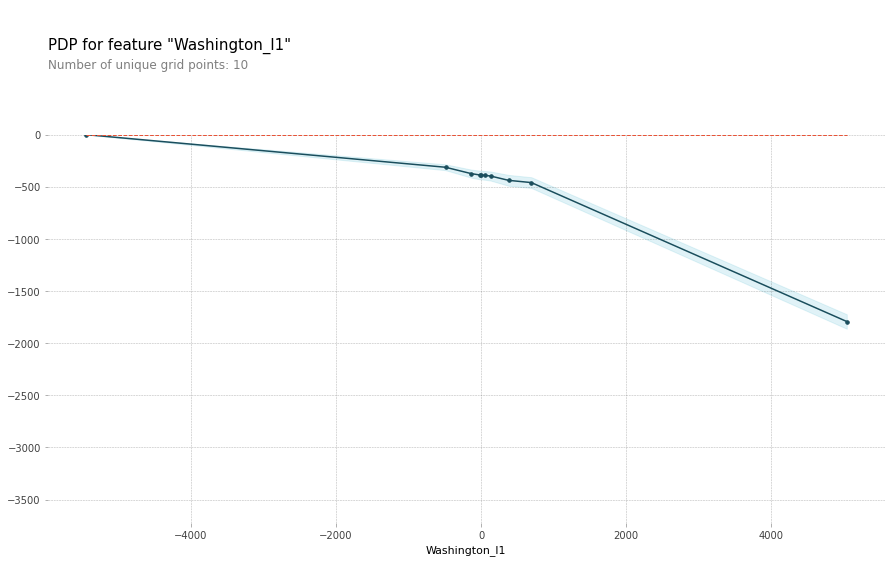

In [ ]:
feat_name = 'Washington_l1'
pdp_dist = pdp.pdp_isolate(model=rf, dataset=X_test, model_features=features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

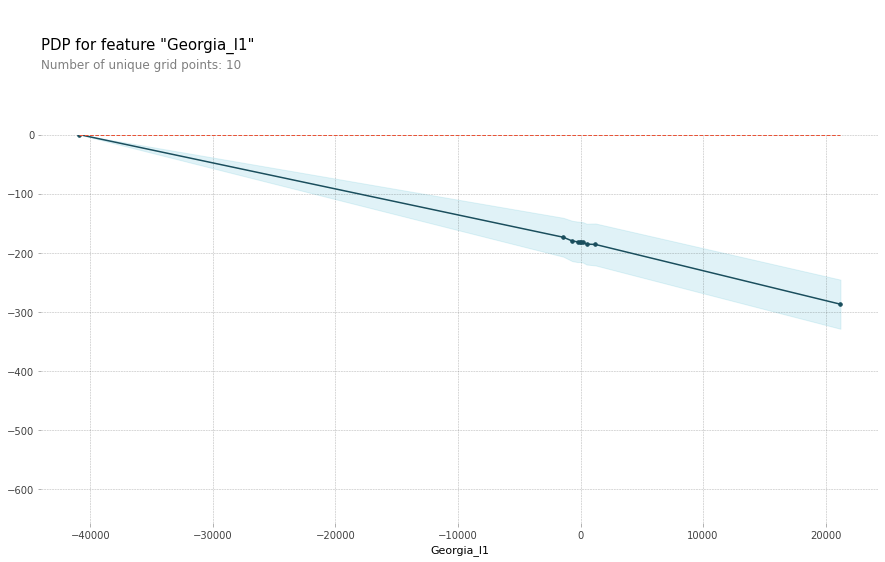

In [ ]:
feat_name = 'Georgia_l1'
pdp_dist = pdp.pdp_isolate(model=rf, dataset=X_test, model_features=features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

##### **Comparison**

In [ ]:
nn = len(y_test)
df_y_train = pd.DataFrame(df_Washington1['Washington'][0:-nn])

In [ ]:
df_forecast = pd.DataFrame(lm_full_pred, columns=['Washington_3d'])
df_results = invert_transformation(df_y_train, df_forecast)
df_lm_full_pred = df_results.loc[:, ['Washington_forecast']]

In [ ]:
df_forecast = pd.DataFrame(lm_pred, columns=['Washington_3d'])
df_results = invert_transformation(df_y_train, df_forecast)
df_lm_pred = df_results.loc[:, ['Washington_forecast']]

In [ ]:
df_forecast = pd.DataFrame(xgb_pred, index=X_test.index, columns=['Washington_3d'])
df_results = invert_transformation(df_y_train, df_forecast)
df_xgb_pred = df_results.loc[:, ['Washington_forecast']]

In [ ]:
df_forecast = pd.DataFrame(lgbm_pred, index=X_test.index, columns=['Washington_3d'])
df_results = invert_transformation(df_y_train, df_forecast)
df_lgbm_pred = df_results.loc[:, ['Washington_forecast']]

In [ ]:
df_forecast = pd.DataFrame(rf_pred, index=X_test.index, columns=['Washington_3d'])
df_results = invert_transformation(df_y_train, df_forecast)
df_rf_pred = df_results.loc[:, ['Washington_forecast']]

In [ ]:
df_forecast = pd.DataFrame(svm_pred, index=X_test.index, columns=['Washington_3d'])
df_results = invert_transformation(df_y_train, df_forecast)
df_svm_pred = df_results.loc[:, ['Washington_forecast']]

In [ ]:
df_Washington = pd.DataFrame(df_state_cases['Washington'])

In [ ]:
plotindex = X_test.index
value_lm_full = df_lm_full_pred['Washington_forecast']
value_lm_sub = df_lm_pred['Washington_forecast']
value_xgb = df_xgb_pred['Washington_forecast']
value_lgbm = df_lgbm_pred['Washington_forecast']
value_rf = df_rf_pred['Washington_forecast']
value_svm = df_svm_pred['Washington_forecast']
valuet = df_Washington.loc[plotindex,'Washington']

In [ ]:
df_vis_lm_full = pd.DataFrame(list(zip(plotindex,value_lm_full)), columns=['date','value'])
df_vis_lm_sub = pd.DataFrame(list(zip(plotindex,value_lm_sub)), columns=['date','value'])
df_vis_xgb = pd.DataFrame(list(zip(plotindex,value_xgb)), columns=['date','value'])
df_vis_lgbm = pd.DataFrame(list(zip(plotindex,value_lgbm)), columns=['date','value'])
df_vis_rf = pd.DataFrame(list(zip(plotindex,value_rf)), columns=['date','value'])
df_vis_svm = pd.DataFrame(list(zip(plotindex,value_svm)), columns=['date','value'])
df_vis_t = pd.DataFrame(list(zip(plotindex,valuet)), columns=['date','value'])

In [ ]:
df_vis_lm_full['variable'] = 'Linear Regression (full)'
df_vis_lm_sub['variable'] = 'Linear Regression (sub)'
df_vis_xgb['variable'] = 'XGBoost'
df_vis_lgbm['variable'] = 'LightGBM'
df_vis_rf['variable'] = 'Random Forest'
df_vis_svm['variable'] = 'SVM'
df_vis_t['variable'] = 'True'

In [ ]:
df_multi = pd.concat([df_vis_lm_full, df_vis_lm_sub, df_vis_xgb, df_vis_lgbm, df_vis_rf, df_vis_svm, df_vis_svm, df_vis_t])

In [ ]:
fig = px.line(df_multi, x="date", y="value", color='variable', 
              title="Washington")
fig.show()

##### **Use original values**

In [ ]:
X = df_Washington1.drop(columns=['Washington'])
y = df_Washington1['Washington']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=False)

In [ ]:
X2_train = sm.add_constant(X_train)
model_full = sm.OLS(y_train, X2_train)
fit_full = model_full.fit()
print(fit_full.summary())

                            OLS Regression Results                            
Dep. Variable:             Washington   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.742e+05
Date:                Tue, 09 Feb 2021   Prob (F-statistic):               0.00
Time:                        07:38:32   Log-Likelihood:                -1531.7
No. Observations:                 245   AIC:                             3175.
Df Residuals:                     189   BIC:                             3372.
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [ ]:
xgb_model, xgb_pred = xgb(X_train,y_train,X_test,y_test)

[07:47:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost: 
{'importance_type': 'gain', 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}
mean abosolute error: 
66486.1049528302
mean absolute percentage error: 
35.69235336991976


array([86988.69, 86988.69, 86988.69, 86988.69, 86988.69, 86988.69,
       86988.69, 86988.69, 86988.69, 86988.69, 86988.69, 86988.69,
       86988.69, 86988.69, 86988.69, 86988.69, 86988.69, 86988.69,
       86988.69, 86988.69, 86988.69, 86988.69, 86988.69, 86988.69,
       86988.69, 86988.69, 86988.69, 86988.69, 86988.69, 86988.69,
       86988.69, 86988.69, 86988.69, 86988.69, 86988.69, 86988.69,
       86988.69, 86988.69, 86988.69, 86988.69, 86988.69, 86988.69,
       86988.69, 86988.69, 86988.69, 86988.69, 86988.69, 86988.69,
       86988.69, 86988.69, 86988.69, 86988.69, 86988.69, 86988.69,
       86988.69, 86988.69, 86988.69, 86988.69, 86988.69, 86988.69,
       86988.69, 86988.69, 86988.69, 86988.69, 86988.69, 86988.69,
       86988.69, 86988.69, 86988.69, 86988.69, 86988.69, 86988.69,
       86988.69, 86988.69, 86988.69, 86988.69, 86988.69, 86988.69,
       86988.69, 86988.69, 86988.69, 86988.69, 86988.69, 86988.69,
       86988.69, 86988.69, 86988.69, 86988.69, 86988.69, 86988

In [ ]:
xgb_pred

array([86988.69, 86988.69, 86988.69, 86988.69, 86988.69, 86988.69,
       86988.69, 86988.69, 86988.69, 86988.69, 86988.69, 86988.69,
       86988.69, 86988.69, 86988.69, 86988.69, 86988.69, 86988.69,
       86988.69, 86988.69, 86988.69, 86988.69, 86988.69, 86988.69,
       86988.69, 86988.69, 86988.69, 86988.69, 86988.69, 86988.69,
       86988.69, 86988.69, 86988.69, 86988.69, 86988.69, 86988.69,
       86988.69, 86988.69, 86988.69, 86988.69, 86988.69, 86988.69,
       86988.69, 86988.69, 86988.69, 86988.69, 86988.69, 86988.69,
       86988.69, 86988.69, 86988.69, 86988.69, 86988.69, 86988.69,
       86988.69, 86988.69, 86988.69, 86988.69, 86988.69, 86988.69,
       86988.69, 86988.69, 86988.69, 86988.69, 86988.69, 86988.69,
       86988.69, 86988.69, 86988.69, 86988.69, 86988.69, 86988.69,
       86988.69, 86988.69, 86988.69, 86988.69, 86988.69, 86988.69,
       86988.69, 86988.69, 86988.69, 86988.69, 86988.69, 86988.69,
       86988.69, 86988.69, 86988.69, 86988.69, 86988.69, 86988

In [ ]:
lgbm_model, lgbm_pred = lgbm(X_train,y_train,X_test,y_test)

LightGBM: 
{'importance_type': 'gain', 'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 20}
mean abosolute error: 
69562.27320096125
mean absolute percentage error: 
37.966455283177005


In [ ]:
lgbm_pred

array([83912.51925187, 83912.51925187, 83912.51925187, 83912.51925187,
       83912.51925187, 83912.51925187, 83912.51925187, 83912.51925187,
       83912.51925187, 83912.51925187, 83912.51925187, 83912.51925187,
       83912.51925187, 83912.51925187, 83912.51925187, 83912.51925187,
       83912.51925187, 83912.51925187, 83912.51925187, 83912.51925187,
       83912.51925187, 83912.51925187, 83912.51925187, 83912.51925187,
       83912.51925187, 83912.51925187, 83912.51925187, 83912.51925187,
       83912.51925187, 83912.51925187, 83912.51925187, 83912.51925187,
       83912.51925187, 83912.51925187, 83912.51925187, 83912.51925187,
       83912.51925187, 83912.51925187, 83912.51925187, 83912.51925187,
       83912.51925187, 83912.51925187, 83912.51925187, 83912.51925187,
       83912.51925187, 83912.51925187, 83912.51925187, 83912.51925187,
       83912.51925187, 83912.51925187, 83912.51925187, 83912.51925187,
       83912.51925187, 83912.51925187, 83912.51925187, 83912.51925187,
      

In [ ]:
rf, rf_pred = forest(X_train,y_train,X_test,y_test)

Random Forest: 
{'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 50}
mean abosolute error: 
66471.71245283018
mean absolute percentage error: 
35.681713505924535


In [ ]:
rf_pred

array([87003.08, 87003.08, 87003.08, 87003.08, 87003.08, 87003.08,
       87003.08, 87003.08, 87003.08, 87003.08, 87003.08, 87003.08,
       87003.08, 87003.08, 87003.08, 87003.08, 87003.08, 87003.08,
       87003.08, 87003.08, 87003.08, 87003.08, 87003.08, 87003.08,
       87003.08, 87003.08, 87003.08, 87003.08, 87003.08, 87003.08,
       87003.08, 87003.08, 87003.08, 87003.08, 87003.08, 87003.08,
       87003.08, 87003.08, 87003.08, 87003.08, 87003.08, 87003.08,
       87003.08, 87003.08, 87003.08, 87003.08, 87003.08, 87003.08,
       87003.08, 87003.08, 87003.08, 87003.08, 87003.08, 87003.08,
       87003.08, 87003.08, 87003.08, 87003.08, 87003.08, 87003.08,
       87003.08, 87003.08, 87003.08, 87003.08, 87003.08, 87003.08,
       87003.08, 87003.08, 87003.08, 87003.08, 87003.08, 87003.08,
       87003.08, 87003.08, 87003.08, 87003.08, 87003.08, 87003.08,
       87003.08, 87003.08, 87003.08, 87003.08, 87003.08, 87003.08,
       87003.08, 87003.08, 87003.08, 87003.08, 87003.08, 87003

In [ ]:
svm_model, svm_pred = svm_clf(X_train,y_train,X_test,y_test)

SVM: 
{'C': 5000, 'gamma': 'scale', 'kernel': 'rbf'}
mean abosolute error: 
93726.44588220498
mean absolute percentage error: 
51.51854382302689


In [ ]:
svm_pred

array([83315.46907891, 83400.71990411, 83475.71397566, 83555.59371952,
       83600.41384485, 83616.95581898, 83630.45192269, 83621.67504679,
       83613.50302884, 83586.01327459, 83530.32068189, 83458.21682529,
       83401.91643343, 83280.01641815, 83176.89970173, 83029.41148783,
       82864.16391228, 82674.56796387, 82496.96287721, 82319.93009894,
       82115.64133545, 81854.45563901, 81551.10636301, 81198.70033094,
       80803.75949464, 80500.71520091, 80191.55271375, 79748.53007938,
       79302.84541606, 78822.4936946 , 78252.91497817, 77572.23140528,
       76886.90460376, 76401.50283427, 75745.69945989, 75042.46161557,
       74268.01030801, 73417.45393923, 72473.27639268, 71624.74272778,
       70890.55332512, 69942.20849734, 68953.39260546, 67796.79795878,
       66535.16316815, 65183.31411197, 63934.96467644, 62862.63891698,
       61573.61137559, 60138.16885661, 58735.65274453, 57264.2000342 ,
       55680.61267238, 54394.43272482, 53315.2833662 , 52086.95190768,
      

In [ ]:
df_xgb_pred = pd.DataFrame(xgb_pred, index=X_test.index, columns=['Washington'])
df_lgbm_pred = pd.DataFrame(lgbm_pred, index=X_test.index, columns=['Washington'])
df_rf_pred = pd.DataFrame(rf_pred, index=X_test.index, columns=['Washington'])
df_svm_pred = pd.DataFrame(svm_pred, index=X_test.index, columns=['Washington'])

## **Nation Level Analysis**

### **Demographic Information for each state**

###### **Population**
* Population July 1, 2019

###### **Age and Sex**
* Persons under 5 years (%)
* Persons under 18 years (%)
* Persons 65 years and over (%)
* Female persons (%)

###### **Race and Hispanic Origin**
* White alone (%)
* Black or African American alone (%)
* Asian alone (%)
* Hispanic or Latino (%)

###### **Education**
* High school graduate or higher, percent of persons age 25 years+ (%)
* Bachelor's degree or higher, percent of persons age 25 years+ (%)

###### **Health**
* With a disability, under age 65 years (%)
* Persons without health insurance, under 65 years (%)

###### **Geography**
* Land area in square miles, 2010